# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 1. Setup dan Pengumpulan Data

Pertama, kita akan mengimport library yang dibutuhkan dan menyiapkan lingkungan untuk melakukan analisis data.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

# Mengabaikan warning yang tidak penting
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Set opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

print("Setup selesai!")

Setup selesai!


### Mount Google Drive dan Mengakses Dataset

Kita akan me-mount Google Drive untuk mengakses dataset KlasifikasiUTS.csv.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke dataset
# Ubah path ini sesuai dengan lokasi file di Google Drive Anda
file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Jika dataset terlalu besar, ambil sample saja
# Uncomment jika Anda ingin menggunakan sample
# df = df.sample(frac=0.3, random_state=42) # mengambil 30% dari data

print(f"Dataset berhasil dimuat dengan {df.shape[0]} baris dan {df.shape[1]} kolom.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil dimuat dengan 284807 baris dan 31 kolom.


### Eksplorasi Data Awal

Sekarang kita akan melakukan eksplorasi data awal untuk memahami karakteristik dataset.

In [ ]:
# Menampilkan 5 baris pertama data
print("5 baris pertama dataset:")
display(df.head())

# Melihat info dataset
print("\nInformasi dataset:")
display(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
display(df.describe().T)

# Cek kolom target
target_column = 'Class'
if target_column in df.columns:
    print(f"\nDistribusi kelas target ({target_column}):")
    display(df[target_column].value_counts())
    print("\nPersentase distribusi kelas:")
    display(df[target_column].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
else:
    print(f"\nPerhatian: Kolom target {target_column} tidak ditemukan. Periksa nama kolom target.")

5 baris pertama dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

None


Statistik deskriptif:


,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595



Distribusi kelas target (Class):


,count
Class,
0,284315
1,492



Persentase distribusi kelas:


,proportion
Class,
0,99.83%
1,0.17%


### Visualisasi Data Awal

Visualisasi data dapat membantu kita memahami lebih lanjut tentang karakteristik dan pola dalam dataset.

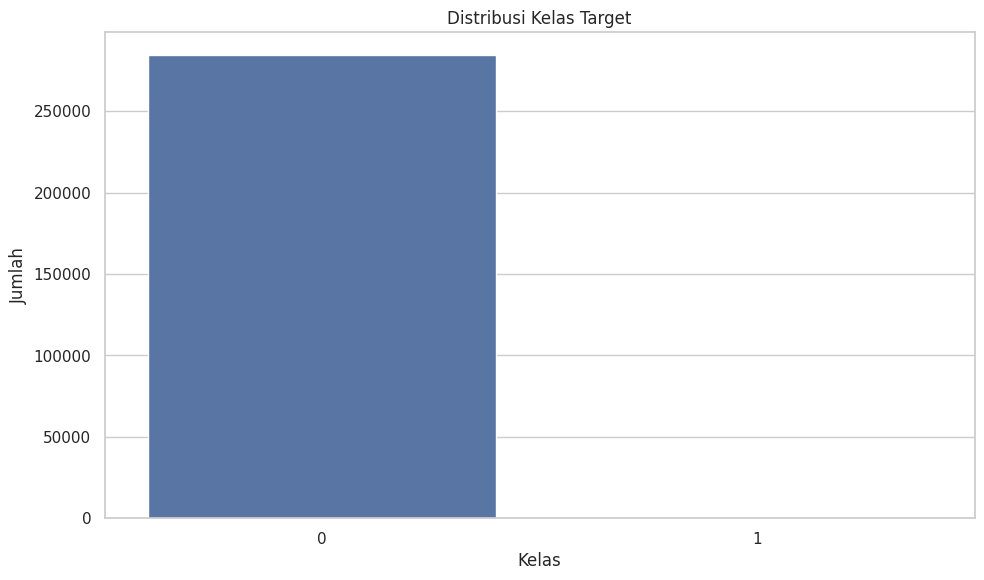

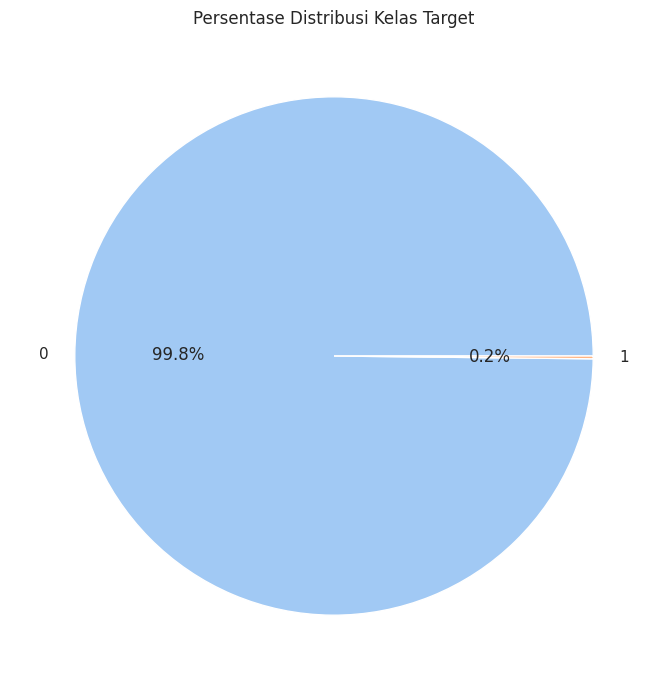


Tidak ada nilai yang hilang dalam dataset.


In [ ]:
# Visualisasi distribusi kelas target
if target_column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=target_column)
    plt.title('Distribusi Kelas Target')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=0)
    plt.show()

    # Pie chart distribusi kelas
    plt.figure(figsize=(8, 8))
    df[target_column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title('Persentase Distribusi Kelas Target')
    plt.ylabel('')
    plt.show()

# Cek nilai yang hilang
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nJumlah nilai yang hilang per kolom:")
    display(missing_values[missing_values > 0])

    # Visualisasi nilai yang hilang
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Pola Nilai yang Hilang')
    plt.show()
else:
    print("\nTidak ada nilai yang hilang dalam dataset.")

### Analisis Korelasi Awal

Sekarang kita akan melihat korelasi antara fitur numerik untuk memahami hubungan antar fitur.

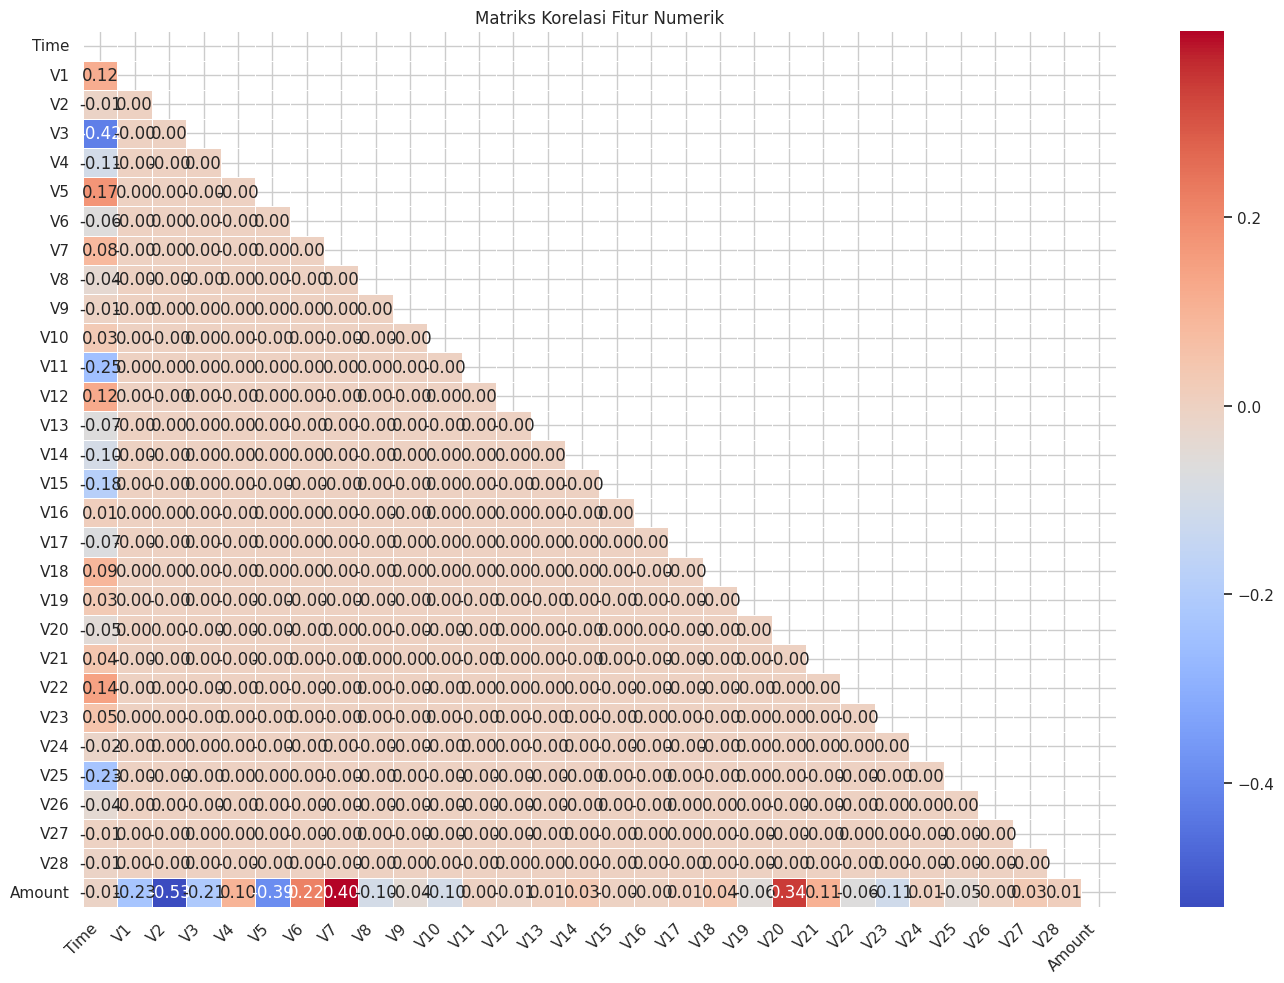


Top 10 korelasi tertinggi:


,,0
Amount,V7,0.397
V7,Amount,0.397
V20,Amount,0.339
Amount,V20,0.339
V6,Amount,0.216
Amount,V6,0.216
Time,V5,0.173
V5,Time,0.173
Time,V22,0.144
V22,Time,0.144


In [ ]:
# Memisahkan fitur numerik
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Jika target column numerik, hapus dari daftar fitur numerik
if target_column in numeric_features:
    numeric_features.remove(target_column)

if len(numeric_features) > 1:  # Minimal perlu 2 fitur numerik untuk matriks korelasi
    # Membuat matriks korelasi
    correlation_matrix = df[numeric_features].corr()

    # Visualisasi matriks korelasi
    plt.figure(figsize=(14, 10))
    mask = np.triu(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
    plt.title('Matriks Korelasi Fitur Numerik')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Menampilkan korelasi tertinggi
    print("\nTop 10 korelasi tertinggi:")
    corr_pairs = correlation_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs < 1.0]  # Hapus korelasi dengan diri sendiri (=1.0)
    high_corr = corr_pairs.sort_values(ascending=False)[:10]
    display(high_corr)
else:
    print("Tidak cukup fitur numerik untuk membuat matriks korelasi.")

### Pemeriksaan Distribusi Fitur

Selanjutnya, kita akan memeriksa distribusi dari setiap fitur numerik.

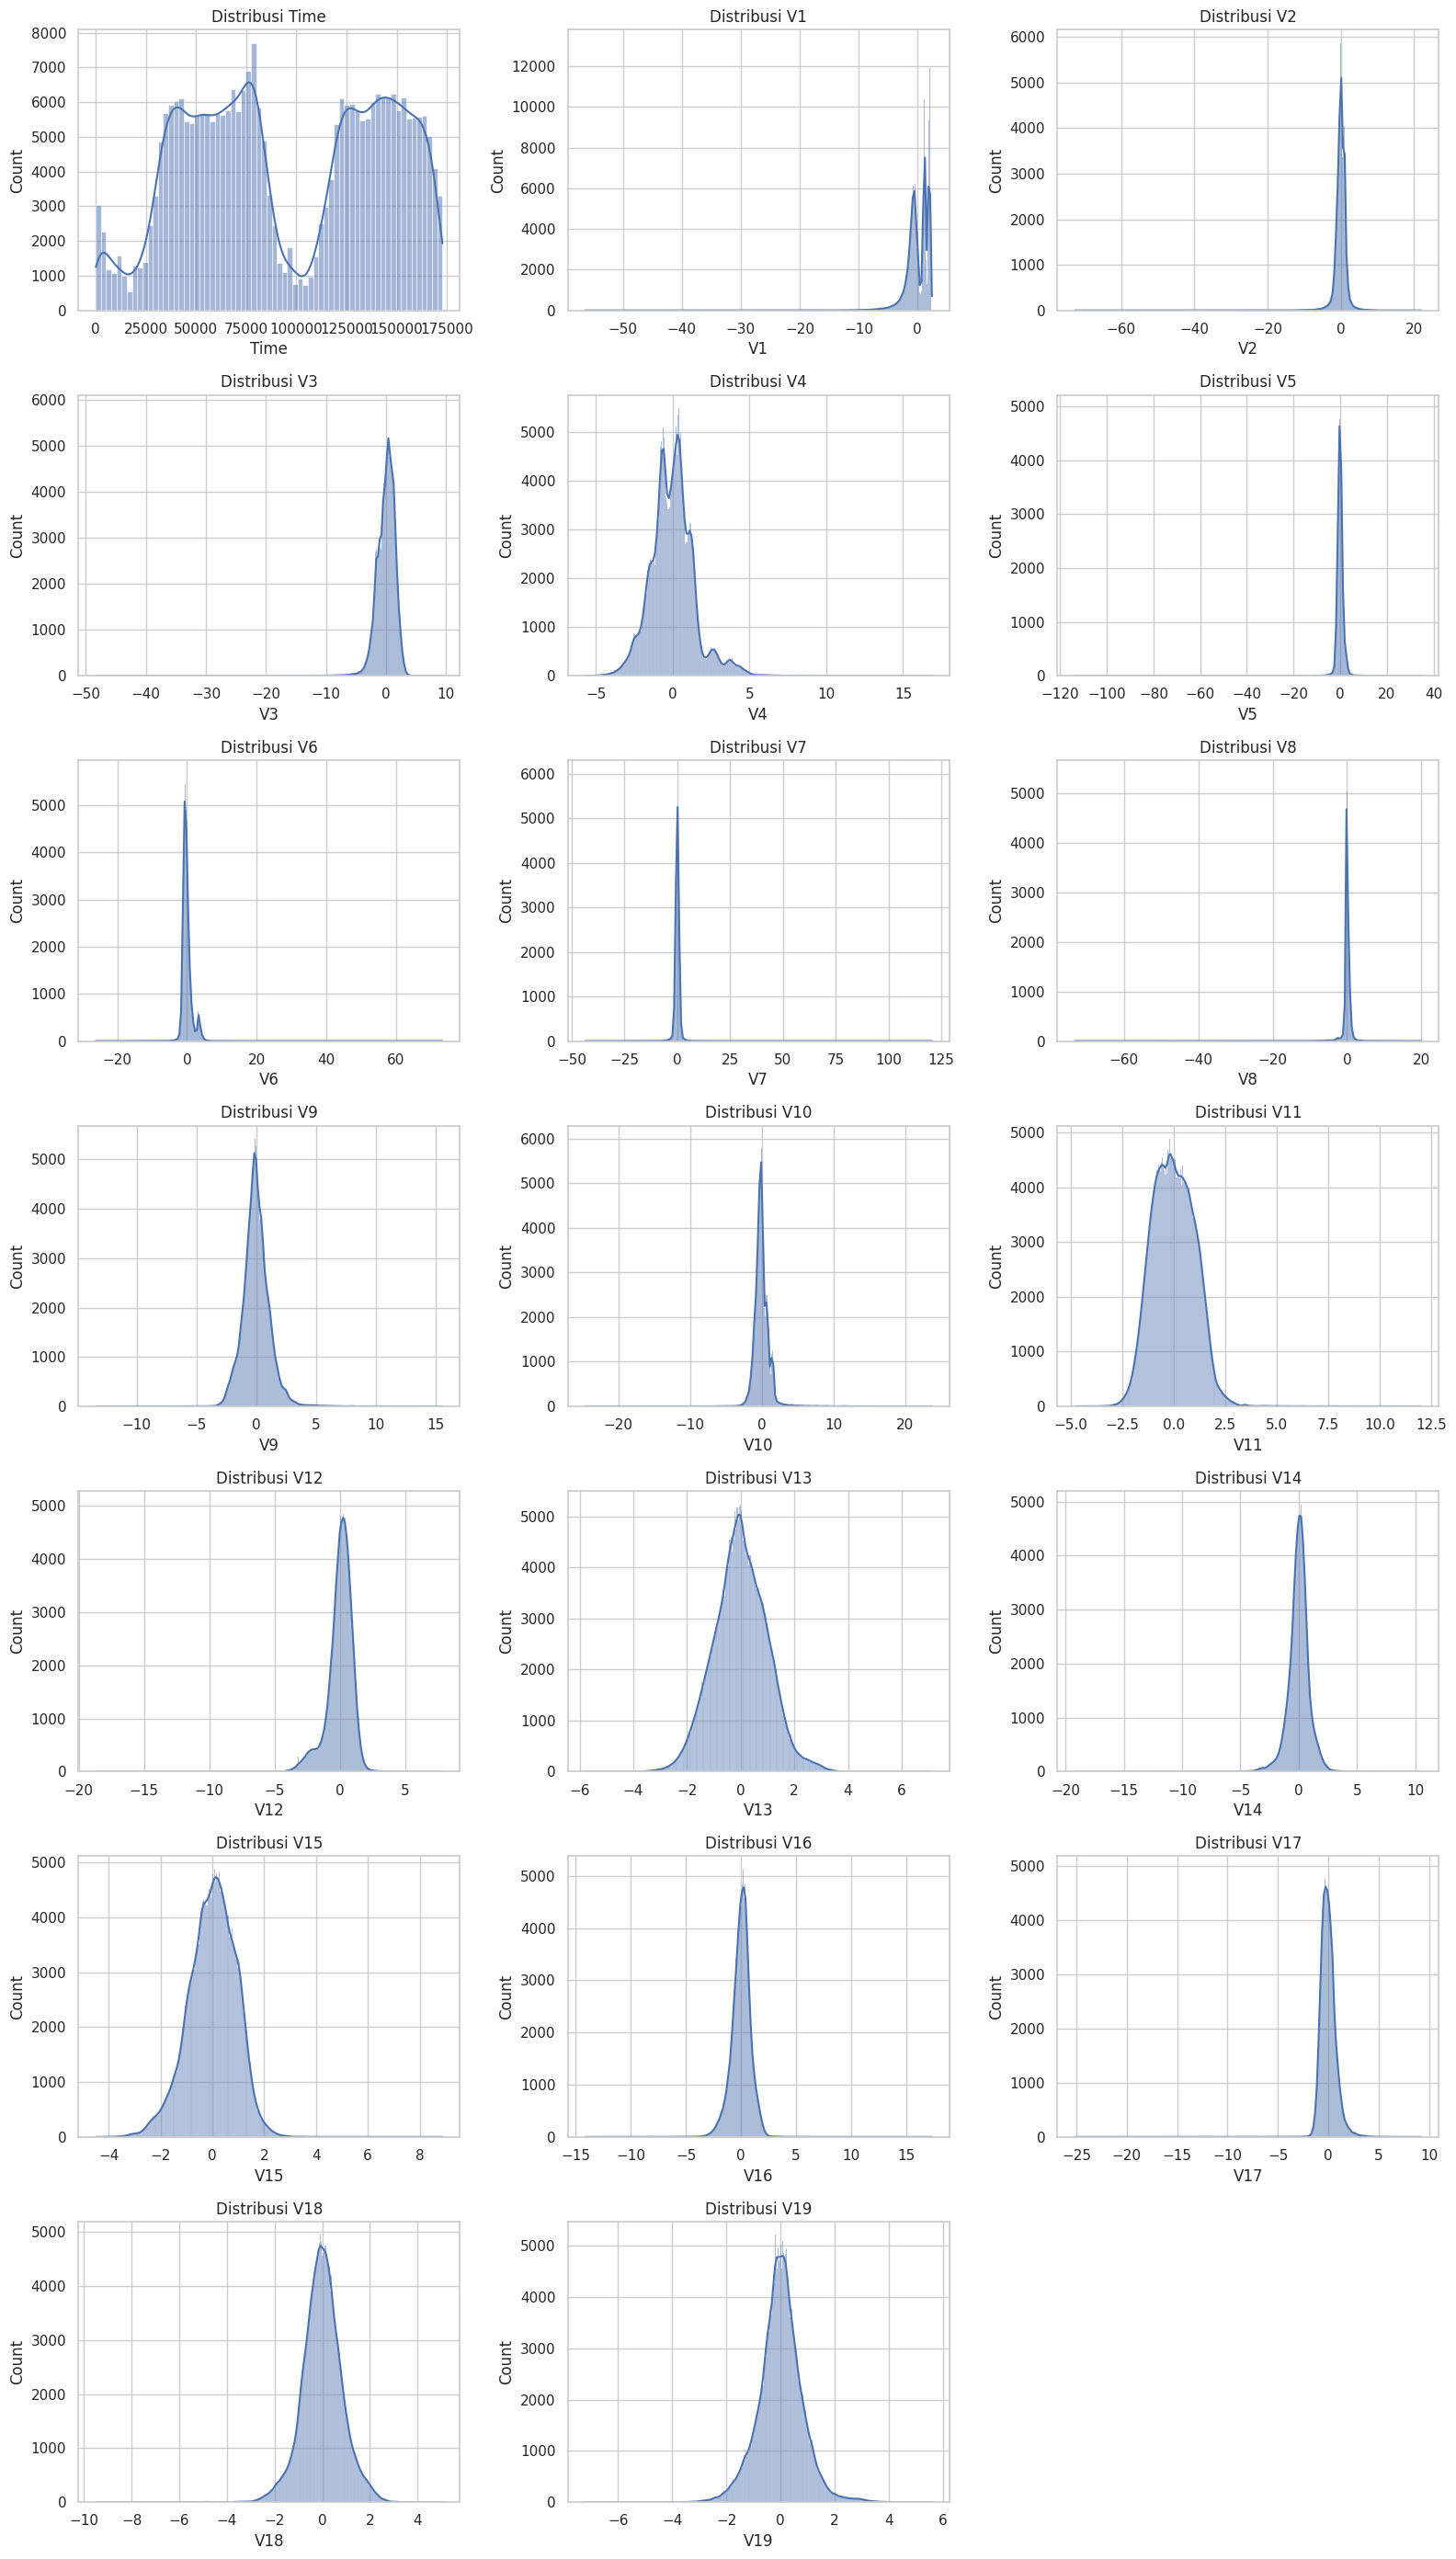

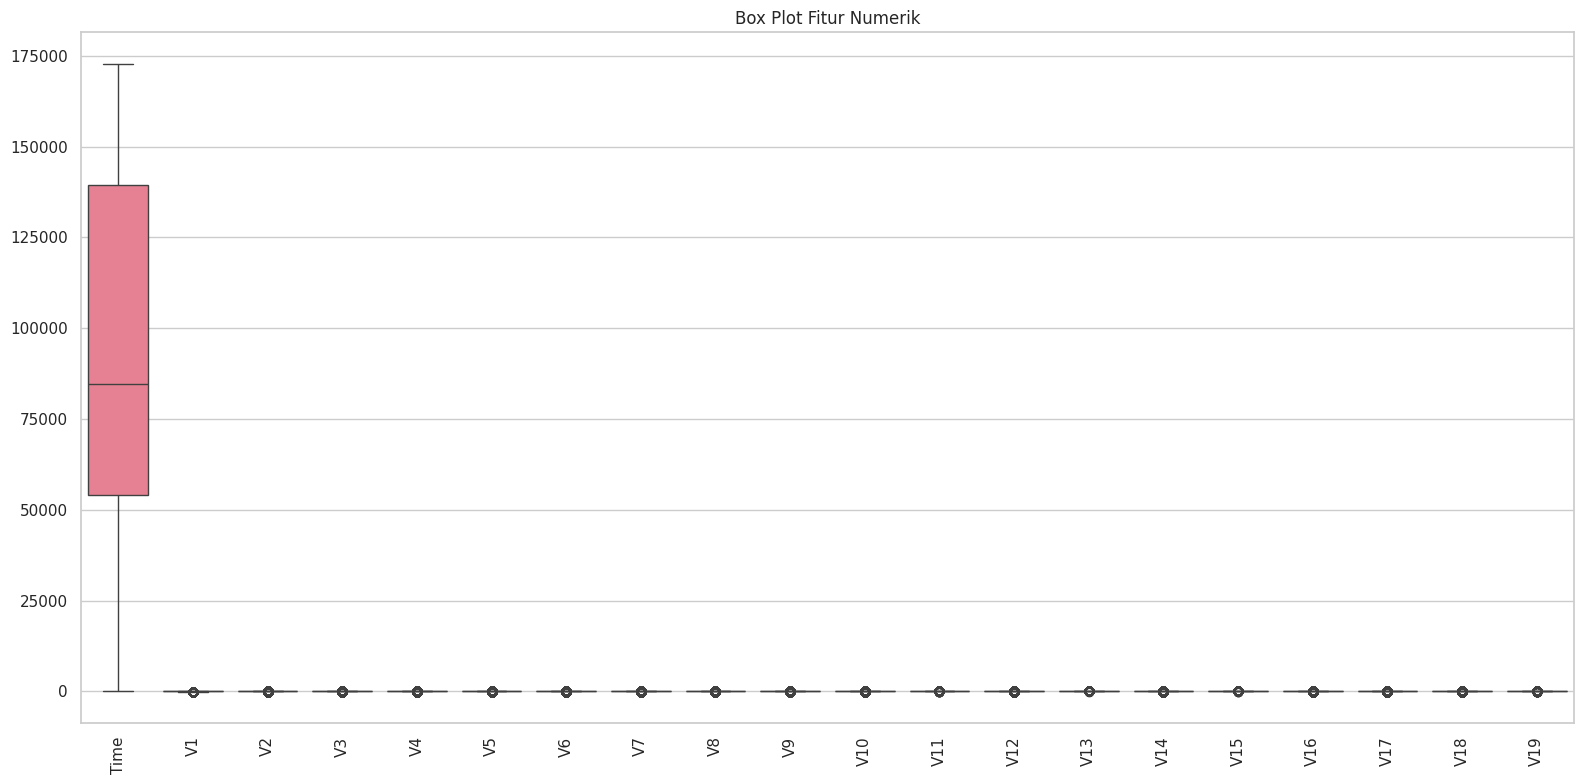

In [ ]:
# Visualisasi distribusi fitur numerik
if len(numeric_features) > 0:
    # Hanya tampilkan maksimal 20 fitur jika terlalu banyak
    num_features_to_plot = min(len(numeric_features), 20)

    # Menghitung jumlah baris dan kolom yang dibutuhkan untuk subplot
    n_rows = (num_features_to_plot - 1) // 3 + 1
    n_cols = min(3, num_features_to_plot)

    plt.figure(figsize=(16, 4 * n_rows))
    for i, feature in enumerate(numeric_features[:num_features_to_plot]):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data=df, x=feature, kde=True)
        plt.title(f'Distribusi {feature}')
        plt.tight_layout()
    plt.show()

    # Box plot untuk melihat outlier
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=df[numeric_features[:num_features_to_plot]])
    plt.title('Box Plot Fitur Numerik')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada fitur numerik untuk visualisasi distribusi.")

## Kesimpulan Eksplorasi Data Awal

Dari eksplorasi data awal, kita dapat menarik beberapa kesimpulan tentang karakteristik dataset:

1. **Ukuran Dataset**: Dataset memiliki sejumlah baris data dengan beberapa fitur yang akan digunakan untuk klasifikasi.

2. **Distribusi Kelas Target**: Visualisasi distribusi kelas membantu memahami keseimbangan/ketidakseimbangan kelas dalam dataset, yang penting untuk strategi pemodelan selanjutnya.

3. **Nilai Hilang**: Kita telah memeriksa ada tidaknya nilai yang hilang dalam dataset, yang akan memengaruhi strategi pembersihan data.

4. **Korelasi Antar Fitur**: Matriks korelasi menunjukkan hubungan antar fitur, yang akan membantu dalam proses feature selection nanti.

5. **Distribusi Fitur**: Histogram dan box plot membantu mengidentifikasi pola distribusi dan kemungkinan outlier dalam fitur numerik.

Langkah selanjutnya adalah melakukan pembersihan data dan menyiapkannya untuk proses feature selection dan engineering.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 2. Pembersihan Data

Setelah melakukan eksplorasi data awal, kita akan melakukan pembersihan data untuk memastikan data siap untuk modeling. Langkah-langkah pembersihan data meliputi:
1. Penanganan nilai yang hilang (missing values)
2. Penanganan outlier
3. Pengecekan dan penanganan duplikasi
4. Transformasi data jika diperlukan

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Memastikan kita punya dataset dari artifact sebelumnya
# Jika belum, load lagi dari path yang disimpan
try:
    print(f"Dataset telah dimuat: {df.shape[0]} baris, {df.shape[1]} kolom")
except NameError:
    # Jika df belum didefinisikan, load dataset
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)
    print(f"Dataset dimuat ulang: {df.shape[0]} baris, {df.shape[1]} kolom")

# Membuat salinan dataset agar original tetap utuh
df_clean = df.copy()

Dataset telah dimuat: 284807 baris, 31 kolom


### 2.1 Penanganan Nilai yang Hilang (Missing Values)

Nilai yang hilang dapat menyebabkan masalah dalam model machine learning. Ada beberapa strategi untuk menangani nilai yang hilang:

1. **Penghapusan (Deletion)**: Menghapus baris atau kolom dengan nilai yang hilang. Ini cocok jika jumlah nilai yang hilang relatif kecil.
2. **Imputasi (Imputation)**: Mengganti nilai yang hilang dengan nilai lain seperti mean, median, mode, atau prediksi dari model.

Pada praktik nyata, strategi penanganan nilai yang hilang harus disesuaikan dengan konteks data dan domain masalah.

In [ ]:
# Memeriksa nilai yang hilang
missing_values = df_clean.isnull().sum()
missing_percentage = (missing_values / len(df_clean)) * 100

# Membuat DataFrame untuk visualisasi
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Menampilkan kolom dengan nilai yang hilang
missing_df_sorted = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

if len(missing_df_sorted) > 0:
    print("Kolom dengan nilai yang hilang:")
    display(missing_df_sorted)

    # Visualisasi persentase nilai yang hilang
    if len(missing_df_sorted) > 0:
        plt.figure(figsize=(12, 6))
        plt.bar(missing_df_sorted.index, missing_df_sorted['Percentage (%)'], color='crimson')
        plt.title('Persentase Nilai yang Hilang per Kolom')
        plt.xlabel('Kolom')
        plt.ylabel('Persentase (%)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    # Strategi imputasi untuk kolom numerik
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            # Imputasi dengan median
            median_value = df_clean[col].median()
            df_clean[col].fillna(median_value, inplace=True)
            print(f"Kolom {col}: {missing_values[col]} nilai yang hilang diisi dengan nilai median {median_value:.2f}")

    # Strategi imputasi untuk kolom kategorikal
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            # Imputasi dengan mode (nilai yang paling sering muncul)
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"Kolom {col}: {missing_values[col]} nilai yang hilang diisi dengan mode '{mode_value}'")
else:
    print("Tidak ada nilai yang hilang dalam dataset.")

# Memastikan tidak ada lagi nilai yang hilang
print("\nSetelah imputasi, jumlah nilai yang hilang:", df_clean.isnull().sum().sum())

Tidak ada nilai yang hilang dalam dataset.

Setelah imputasi, jumlah nilai yang hilang: 0


**Penjelasan Matematis untuk Imputasi Nilai yang Hilang**

Untuk variabel numerik, kami menggunakan median sebagai metode imputasi. Median adalah nilai tengah dari data yang diurutkan, didefinisikan sebagai:

$$\text{Median} = \begin{cases}
x_{\left(\frac{n+1}{2}\right)} & \text{jika } n \text{ ganjil} \\
\frac{1}{2}\left(x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}\right) & \text{jika } n \text{ genap}
\end{cases}$$

dimana $x_{(i)}$ adalah nilai ke-$i$ dari data yang sudah diurutkan dan $n$ adalah jumlah data.

Median lebih robust terhadap outlier dibandingkan mean (rata-rata), sehingga lebih sering digunakan untuk imputasi. Mean dipengaruhi oleh nilai ekstrem, sedangkan median tidak.

Untuk variabel kategorikal, kami menggunakan mode (modus) yaitu nilai yang paling sering muncul dalam data. Secara matematis, mode adalah nilai $x$ yang memaksimalkan fungsi frekuensi $f(x)$:

$$\text{Mode} = \arg\max_x f(x)$$

dimana $f(x)$ adalah jumlah kemunculan nilai $x$ dalam dataset.

### 2.2 Penanganan Outlier

Outlier adalah nilai yang sangat berbeda dari kebanyakan data lainnya. Outlier dapat mempengaruhi model, terutama pada model yang sensitif terhadap distribusi data seperti regresi linier. Beberapa metode untuk mendeteksi outlier:

1. **Metode IQR (Interquartile Range)**: Mengidentifikasi outlier berdasarkan rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
2. **Z-Score**: Mengukur berapa standar deviasi sebuah nilai dari mean.
3. **Modified Z-Score**: Variasi dari Z-score yang menggunakan median dan MAD (Median Absolute Deviation).

Kita akan menerapkan metode IQR untuk mengidentifikasi outlier.

Informasi Outlier:


,Column,Method,Lower Bound,Upper Bound,Total Outliers,Outlier Percentage (%)
58,Amount,IQR,-101.748,184.512,31904,11.202
59,Amount,Z-Score,NaN,NaN,4076,1.431
0,Time,IQR,-73477.000,266999.000,0,0.000
1,Time,Z-Score,NaN,NaN,0,0.000
2,V1,IQR,-4.274,4.670,7062,2.480
3,V1,Z-Score,NaN,NaN,3701,1.299
20,V10,IQR,-2.019,1.938,9496,3.334
21,V10,Z-Score,NaN,NaN,3488,1.225
22,V11,IQR,-3.016,2.993,780,0.274
23,V11,Z-Score,NaN,NaN,684,0.240


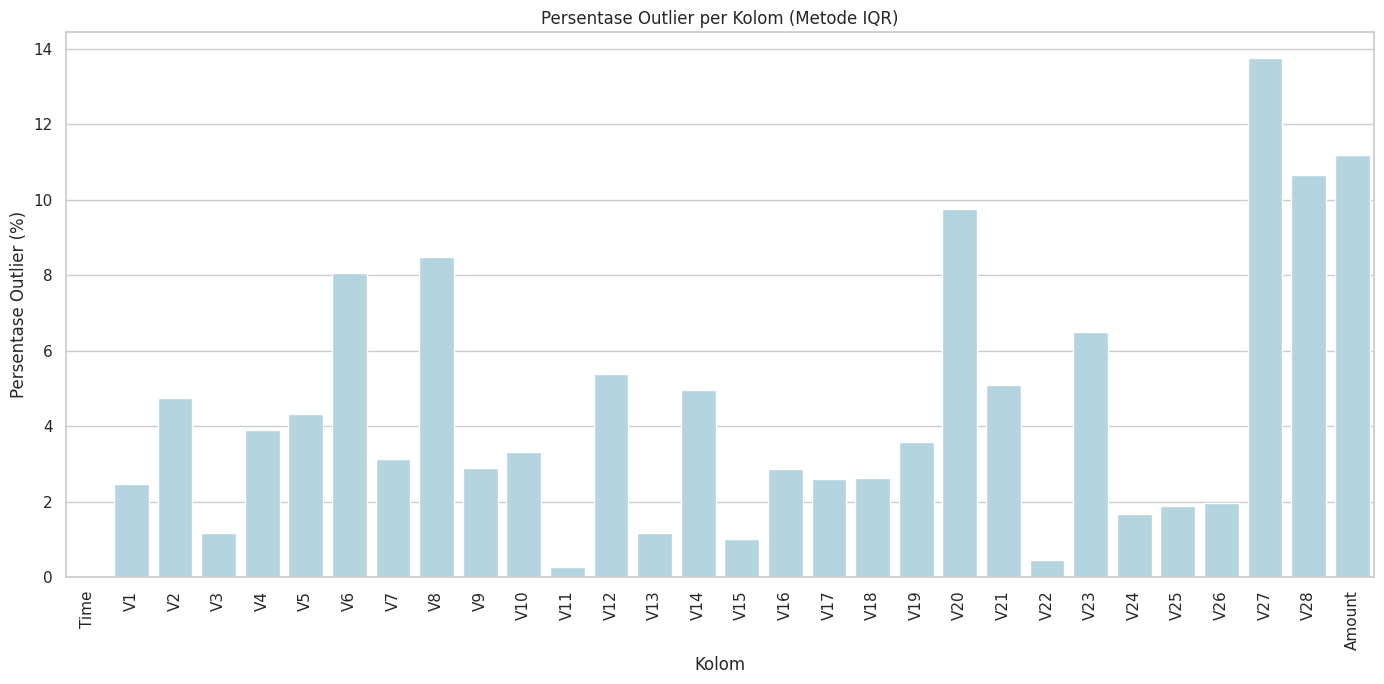


Outlier telah ditangani dengan metode capping.


In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column, lower_factor=1.5, upper_factor=1.5):
    """Mendeteksi outlier menggunakan metode IQR

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    column (str): Nama kolom yang akan dideteksi outlier-nya
    lower_factor (float): Faktor pengali untuk batas bawah
    upper_factor (float): Faktor pengali untuk batas atas

    Returns:
    tuple: (lower_bound, upper_bound, outliers_indices)
    """
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas atas dan batas bawah
    lower_bound = Q1 - (lower_factor * IQR)
    upper_bound = Q3 + (upper_factor * IQR)

    # Mengidentifikasi outlier
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_indices = outliers.index

    return lower_bound, upper_bound, outliers_indices

# Fungsi untuk mendeteksi outlier menggunakan z-score
def detect_outliers_zscore(df, column, threshold=3.0):
    """Mendeteksi outlier menggunakan z-score

    Parameters:
    df (DataFrame): DataFrame yang berisi data
    column (str): Nama kolom yang akan dideteksi outlier-nya
    threshold (float): Batas z-score untuk mengidentifikasi outlier

    Returns:
    array: Indeks dari outlier
    """
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers_indices = df[column].dropna().index[z_scores > threshold]
    return outliers_indices

# Mendeteksi dan menangani outlier pada kolom numerik
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
target_column = 'Class'
if target_column in numeric_cols:
    numeric_cols.remove(target_column)

# Membuat DataFrame untuk menyimpan informasi outlier
outlier_info = pd.DataFrame(
    columns=['Column', 'Method', 'Lower Bound', 'Upper Bound',
             'Total Outliers', 'Outlier Percentage (%)']
)

# Memeriksa outlier untuk setiap kolom numerik
for col in numeric_cols:
    # Menggunakan metode IQR
    lower_bound, upper_bound, outliers_iqr = detect_outliers_iqr(df_clean, col)
    outlier_percentage_iqr = (len(outliers_iqr) / len(df_clean)) * 100

    # Menggunakan metode z-score
    outliers_zscore = detect_outliers_zscore(df_clean, col)
    outlier_percentage_zscore = (len(outliers_zscore) / len(df_clean)) * 100

    # Menyimpan informasi outlier
    outlier_info = pd.concat([outlier_info, pd.DataFrame({
        'Column': [col, col],
        'Method': ['IQR', 'Z-Score'],
        'Lower Bound': [lower_bound, None],
        'Upper Bound': [upper_bound, None],
        'Total Outliers': [len(outliers_iqr), len(outliers_zscore)],
        'Outlier Percentage (%)': [outlier_percentage_iqr, outlier_percentage_zscore]
    })], ignore_index=True)

# Menampilkan informasi outlier
if len(outlier_info) > 0:
    print("Informasi Outlier:")
    display(outlier_info.sort_values(['Column', 'Method']))

    # Visualisasi persentase outlier per kolom (metode IQR)
    plt.figure(figsize=(14, 7))
    iqr_data = outlier_info[outlier_info['Method'] == 'IQR']
    sns.barplot(data=iqr_data, x='Column', y='Outlier Percentage (%)', color='lightblue')
    plt.title('Persentase Outlier per Kolom (Metode IQR)')
    plt.xlabel('Kolom')
    plt.ylabel('Persentase Outlier (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Menangani outlier (capping)
    for col in numeric_cols:
        lower_bound, upper_bound, _ = detect_outliers_iqr(df_clean, col)

        # Mengganti outlier dengan batas atas/bawah (capping)
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)

    print("\nOutlier telah ditangani dengan metode capping.")
else:
    print("Tidak ada kolom numerik untuk deteksi outlier.")

**Penjelasan Matematis untuk Deteksi Outlier**

**1. Metode IQR (Interquartile Range)**

IQR adalah ukuran dispersi statistik, didefinisikan sebagai selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1):

$$\text{IQR} = Q_3 - Q_1$$

Kuartil pertama (Q1) adalah nilai yang membagi 25% data terkecil, sedangkan kuartil ketiga (Q3) membagi 75% data terkecil. Outlier kemudian didefinisikan sebagai nilai yang berada di luar rentang:

$$[Q_1 - k \times \text{IQR}, Q_3 + k \times \text{IQR}]$$

dimana $k$ adalah konstanta, biasanya $k = 1.5$ untuk outlier reguler dan $k = 3$ untuk outlier ekstrem.

**2. Metode Z-Score**

Z-score mengukur berapa standar deviasi sebuah nilai dari mean (rata-rata) populasi. Formula Z-score adalah:

$$Z = \frac{X - \mu}{\sigma}$$

dimana:
- $X$ adalah nilai observasi
- $\mu$ adalah mean (rata-rata) populasi
- $\sigma$ adalah standar deviasi populasi

Nilai Z-score yang tinggi (biasanya > 3 atau < -3) menunjukkan bahwa observasi tersebut jauh dari rata-rata dan bisa dianggap sebagai outlier.

**3. Capping Method**

Untuk menangani outlier, kita menggunakan metode capping yang membatasi nilai pada batas atas dan bawah yang ditentukan. Secara matematis, untuk setiap nilai $x$ dalam dataset:

$$x_{\text{capped}} = \begin{cases}
\text{lower_bound} & \text{jika } x < \text{lower_bound} \\
x & \text{jika } \text{lower_bound} \leq x \leq \text{upper_bound} \\
\text{upper_bound} & \text{jika } x > \text{upper_bound}
\end{cases}$$

Metode ini lebih disukai daripada menghapus outlier karena mempertahankan ukuran dataset dan mengurangi bias.

### 2.3 Penanganan Duplikasi

Data duplikat adalah baris yang identik yang muncul lebih dari sekali dalam dataset. Duplikasi dapat menyebabkan bias dalam model dan memengaruhi validitas evaluasi. Kita akan memeriksa dan menangani duplikasi dalam dataset.

In [ ]:
# Memeriksa duplikasi
duplicate_rows = df_clean.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows} ({(duplicate_rows/len(df_clean))*100:.2f}%)")

if duplicate_rows > 0:
    # Menampilkan contoh baris duplikat
    print("\nContoh baris duplikat:")
    duplicates = df_clean[df_clean.duplicated(keep='first')]
    display(duplicates.head())

    # Menghapus duplikasi
    df_clean = df_clean.drop_duplicates()
    print(f"Setelah menghapus duplikasi, jumlah baris: {len(df_clean)}")
else:
    print("Tidak ada baris duplikat dalam dataset.")

Jumlah baris duplikat: 1081 (0.38%)

Contoh baris duplikat:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.000,-0.530,0.874,1.347,0.145,0.414,0.100,0.711,0.176,-0.287,-0.485,0.872,0.852,-0.572,0.101,-1.520,-0.284,-0.311,-0.404,-0.823,-0.290,0.047,0.208,-0.186,0.001,0.099,-0.553,-0.073,0.023,6.140,0
35,26.000,-0.535,0.865,1.351,0.148,0.434,0.087,0.693,0.180,-0.286,-0.482,0.872,0.853,-0.572,0.102,-1.520,-0.286,-0.310,-0.404,-0.824,-0.283,0.050,0.207,-0.187,0.001,0.098,-0.553,-0.078,0.025,1.770,0
113,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-1.998,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0
114,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-1.998,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0
115,74.000,1.038,0.127,0.184,1.110,0.442,0.945,-0.037,0.351,0.119,-0.243,0.578,0.675,-0.534,0.447,1.123,-1.768,1.241,-1.998,-1.747,-0.336,0.103,0.605,0.023,-0.626,0.479,-0.167,0.081,0.001,1.180,0


Setelah menghapus duplikasi, jumlah baris: 283726


**Penjelasan Matematis untuk Penghapusan Duplikasi**

Duplikasi diidentifikasi dengan membandingkan nilai dari semua kolom antara dua baris. Dua baris dianggap duplikat jika:

$$\forall j \in \{1, 2, ..., p\}: x_{i,j} = x_{k,j}$$

dimana:
- $x_{i,j}$ adalah nilai pada baris ke-$i$ dan kolom ke-$j$
- $x_{k,j}$ adalah nilai pada baris ke-$k$ dan kolom ke-$j$
- $p$ adalah jumlah kolom

Kami menghapus baris duplikat dan menyimpan baris pertama dengan metode `drop_duplicates(keep='first')`. Ini memastikan dataset tidak memiliki redundansi yang dapat memengaruhi performa dan validitas model.

### 2.4 Pengecekan Tipe Data dan Transformasi Awal

Sekarang kita perlu memastikan tipe data setiap kolom sudah sesuai dengan karakteristik data. Transformasi awal diperlukan untuk menjamin konsistensi data.

In [ ]:
# Menampilkan tipe data dari setiap kolom
print("Tipe data untuk setiap kolom:")
display(df_clean.dtypes)

# Pengecekan apakah ada kolom numerik yang bertipe object
object_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
if target_column in object_cols:
    object_cols.remove(target_column)

for col in object_cols:
    # Memeriksa apakah kolom bertipe object dapat dikonversi ke numerik
    try:
        # Mengkonversi ke numerik
        pd.to_numeric(df_clean[col])
        print(f"Kolom {col} dapat dikonversi ke numerik.")
    except ValueError:
        # Jika tidak dapat dikonversi, tampilkan nilai unik
        unique_values = df_clean[col].nunique()
        print(f"Kolom {col} tidak dapat dikonversi ke numerik. Nilai unik: {unique_values}")
        if unique_values < 20:  # Hanya tampilkan jika jumlah nilai unik tidak terlalu banyak
            print(f"Nilai unik di kolom {col}:")
            display(df_clean[col].value_counts())

# Transformasi tipe data jika diperlukan
for col in object_cols:
    try:
        df_clean[col] = pd.to_numeric(df_clean[col])
        print(f"Kolom {col} berhasil dikonversi ke numerik.")
    except ValueError:
        # Jika tidak dapat dikonversi ke numerik, biarkan sebagai kategorikal
        pass

# Menampilkan tipe data setelah transformasi
print("\nTipe data setelah transformasi:")
display(df_clean.dtypes)

Tipe data untuk setiap kolom:


,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64



Tipe data setelah transformasi:


,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


**Penjelasan Matematis untuk Transformasi Tipe Data**

Transformasi tipe data adalah proses mengubah format representasi data. Dalam konteks ini, kita fokus pada konversi data bertipe objek (string) menjadi numerik jika memungkinkan.

Secara matematis, transformasi tipe data dapat dilihat sebagai fungsi $f$ yang memetakan nilai $x$ dari domain asli ke domain target:

$$f: X \to Y$$

dimana $X$ adalah domain asli (misalnya, string) dan $Y$ adalah domain target (misalnya, float atau integer).

Untuk konversi string ke numerik, fungsi ini menafsirkan representasi teks dari angka menjadi nilai numerik aktual. Misalnya, string "3.14" dikonversi menjadi nilai floating point 3.14.

Jika konversi tidak mungkin dilakukan (misalnya, string "abc" tidak dapat dikonversi ke numerik), kolom tersebut dipertahankan sebagai kategorikal untuk pemrosesan lebih lanjut dalam feature engineering.

### 2.5 Pemisahan Fitur dan Target

Sekarang kita akan memisahkan data menjadi fitur (X) dan target (y) untuk mempersiapkan proses feature selection.

In [ ]:
# Memisahkan fitur dan target
target_column = 'Class'
if target_column in df_clean.columns:
    X = df_clean.drop(columns=[target_column])
    y = df_clean[target_column]

    print(f"Dimensi data fitur X: {X.shape}")
    print(f"Dimensi data target y: {y.shape}")
    print(f"Distribusi kelas target:\n{y.value_counts()}")

    # Memeriksa keseimbangan kelas
    class_counts = y.value_counts()
    min_class = class_counts.min()
    max_class = class_counts.max()
    imbalance_ratio = max_class / min_class

    print(f"\nRasio ketidakseimbangan kelas (kelas mayoritas : kelas minoritas): {imbalance_ratio:.2f}:1")

    if imbalance_ratio > 3:
        print("Perhatian: Dataset memiliki ketidakseimbangan kelas yang signifikan.")
        print("Teknik penanganan ketidakseimbangan seperti SMOTE, class weighting, atau undersampling ")
        print("mungkin diperlukan dalam proses modeling nanti.")
else:
    print(f"Perhatian: Kolom target {target_column} tidak ditemukan.")

Dimensi data fitur X: (283726, 30)
Dimensi data target y: (283726,)
Distribusi kelas target:
Class
0    283253
1       473
Name: count, dtype: int64

Rasio ketidakseimbangan kelas (kelas mayoritas : kelas minoritas): 598.84:1
Perhatian: Dataset memiliki ketidakseimbangan kelas yang signifikan.
Teknik penanganan ketidakseimbangan seperti SMOTE, class weighting, atau undersampling 
mungkin diperlukan dalam proses modeling nanti.


**Penjelasan Matematis untuk Ketidakseimbangan Kelas**

Ketidakseimbangan kelas terjadi ketika jumlah sampel dalam setiap kelas tidak merata secara signifikan. Ini adalah masalah umum dalam klasifikasi yang dapat memengaruhi performa model.

Rasio ketidakseimbangan (imbalance ratio) didefinisikan sebagai perbandingan antara jumlah sampel dalam kelas mayoritas dengan jumlah sampel dalam kelas minoritas:

$$\text{Imbalance Ratio} = \frac{|C_{\text{majority}}|}{|C_{\text{minority}}|}$$

dimana $|C_{\text{majority}}|$ adalah jumlah sampel dalam kelas mayoritas dan $|C_{\text{minority}}|$ adalah jumlah sampel dalam kelas minoritas.

Rasio yang lebih tinggi (biasanya > 3) menunjukkan ketidakseimbangan yang signifikan, yang dapat menyebabkan model cenderung bias terhadap kelas mayoritas dan buruk dalam memprediksi kelas minoritas. Dalam kasus seperti itu, teknik resampling seperti SMOTE (Synthetic Minority Over-sampling Technique) dapat digunakan untuk mengatasi ketidakseimbangan.

## Kesimpulan Pembersihan Data

Dalam proses pembersihan data, kita telah melakukan beberapa langkah penting:

1. **Penanganan Nilai yang Hilang**: Kita mengidentifikasi dan mengisi nilai yang hilang menggunakan strategi imputasi yang sesuai (median untuk numerik, mode untuk kategorikal).

2. **Penanganan Outlier**: Kita mendeteksi outlier menggunakan metode IQR dan Z-score, kemudian menerapkan teknik capping untuk menanganinya.

3. **Penanganan Duplikasi**: Kita mengidentifikasi dan menghapus data duplikat dari dataset.

4. **Transformasi Tipe Data**: Kita memastikan setiap kolom memiliki tipe data yang sesuai dengan karakteristik datanya.

5. **Pemisahan Fitur dan Target**: Kita memisahkan dataset menjadi fitur (X) dan target (y) untuk persiapan feature selection.

Data yang sudah dibersihkan ini akan digunakan untuk tahap selanjutnya, yaitu feature selection dan feature engineering.

**Catatan Penting**: Proses pembersihan data tidak boleh dilakukan secara mekanis tanpa memahami konteks dan domain masalah. Setiap keputusan dalam pembersihan data harus didasarkan pada pemahaman mendalam tentang data dan tujuan analisis.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 3. Feature Selection

Feature selection (pemilihan fitur) adalah proses memilih subset fitur yang paling relevan untuk model. Ini penting karena:
1. **Mengurangi overfitting**: Mengurangi dimensionalitas dapat mencegah model mempelajari noise
2. **Meningkatkan akurasi**: Menghilangkan fitur yang tidak relevan/redundan dapat meningkatkan performa
3. **Mengurangi waktu komputasi**: Model dengan lebih sedikit fitur biasanya lebih cepat untuk dilatih
4. **Meningkatkan interpretabilitas**: Model dengan fitur lebih sedikit lebih mudah dipahami

Kita akan mengimplementasikan berbagai metode feature selection sesuai permintaan.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import (
    VarianceThreshold,  # Untuk Constant dan Quasi-Constant
    SelectKBest,
    chi2,
    f_classif,  # ANOVA
    mutual_info_classif,  # Mutual Information
    RFE,  # Recursive Feature Elimination
    RFECV,  # RFE with Cross-Validation
    SelectFromModel  # Model-based selection
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.multivariate.manova import MANOVA  # Import untuk MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Import untuk post-hoc ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Memastikan kita punya dataset yang sudah dibersihkan
try:
    print(f"Data sudah dibersihkan: X shape {X.shape}, y shape {y.shape}")
except NameError:
    # Jika X dan y belum didefinisikan, load dataset
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    y = df[target_column]

    print(f"Dataset dimuat dan dibersihkan: X shape {X.shape}, y shape {y.shape}")

Data sudah dibersihkan: X shape (283726, 30), y shape (283726,)


### 3.1 Menghapus Fitur Konstan dan Quasi-Konstan

Fitur konstan adalah fitur yang memiliki nilai yang sama untuk semua sampel, sedangkan fitur quasi-konstan memiliki variasi yang sangat kecil. Fitur-fitur ini tidak memberikan informasi diskriminatif dan sebaiknya dihapus.

In [ ]:
def identify_constant_features(X, threshold=0.01):
    """Mengidentifikasi fitur konstan dan quasi-konstan

    Parameters:
    X (DataFrame): Data fitur
    threshold (float): Ambang batas variansi, fitur dengan variansi di bawah ini akan dihapus

    Returns:
    list: Daftar fitur yang akan dipertahankan
    list: Daftar fitur yang akan dihapus
    """
    # Hanya gunakan kolom numerik
    X_numeric = X.select_dtypes(include=['int64', 'float64'])

    # Inisialisasi selector dengan threshold
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X_numeric)

    # Mendapatkan variansi setiap fitur
    variances = selector.variances_

    # Mendapatkan nama fitur yang akan dipertahankan dan dihapus
    feature_names = X_numeric.columns
    features_to_keep = feature_names[selector.get_support()]
    features_to_drop = feature_names[~selector.get_support()]

    # Membuat DataFrame untuk visualisasi
    variance_df = pd.DataFrame({
        'Feature': feature_names,
        'Variance': variances
    }).sort_values('Variance')

    return features_to_keep.tolist(), features_to_drop.tolist(), variance_df

# Mengidentifikasi fitur konstan dan quasi-konstan
features_to_keep, features_to_drop, variance_df = identify_constant_features(X, threshold=0.01)

# Menampilkan hasil
print(f"Jumlah fitur numerik: {len(features_to_keep) + len(features_to_drop)}")
print(f"Jumlah fitur dengan variansi > 0.01: {len(features_to_keep)}")
print(f"Jumlah fitur konstan/quasi-konstan: {len(features_to_drop)}")

if len(features_to_drop) > 0:
    print("\nFitur konstan/quasi-konstan:")
    display(variance_df[variance_df['Variance'] < 0.01])

    # Visualisasi variansi fitur
    plt.figure(figsize=(14, 7))
    sns.barplot(data=variance_df.head(20), x='Feature', y='Variance')
    plt.title('Variansi 20 Fitur Terendah')
    plt.xlabel('Fitur')
    plt.ylabel('Variansi')
    plt.axhline(y=0.01, color='r', linestyle='--', label='Threshold = 0.01')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Menghapus fitur konstan dan quasi-konstan
    X_reduced = X.drop(columns=features_to_drop)
    print(f"\nUkuran data setelah menghapus fitur konstan/quasi-konstan: {X_reduced.shape}")
else:
    X_reduced = X.copy()
    print("\nTidak ada fitur konstan atau quasi-konstan yang ditemukan.")

Jumlah fitur numerik: 30
Jumlah fitur dengan variansi > 0.01: 30
Jumlah fitur konstan/quasi-konstan: 0

Tidak ada fitur konstan atau quasi-konstan yang ditemukan.


**Penjelasan Matematis - Variance Threshold**

Variance Threshold adalah metode feature selection yang menghapus semua fitur dengan variansi di bawah ambang batas tertentu. Variansi sebuah fitur dihitung dengan formula:

$$\text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

dimana:
- $n$ adalah jumlah sampel
- $x_i$ adalah nilai fitur untuk sampel ke-$i$
- $\bar{x}$ adalah nilai rata-rata fitur

Jika $\text{Var}(X) \leq \text{threshold}$, maka fitur $X$ dihapus. Fitur dengan variansi rendah atau nol memiliki nilai yang hampir sama di seluruh dataset, sehingga tidak memberikan informasi diskriminatif yang berguna untuk klasifikasi.

Untuk fitur biner (0/1), variansi dapat dihitung dengan formula sederhana: $\text{Var}(X) = p(1-p)$, dimana $p$ adalah proporsi sampel dengan nilai 1. Variansi maksimum $0.25$ dicapai ketika $p = 0.5$, dan variansi minimum $0$ terjadi ketika $p = 0$ atau $p = 1$ (fitur konstan).

### 3.2 Menghapus Fitur Duplikat

Fitur duplikat adalah fitur yang memiliki nilai identik atau sangat mirip dengan fitur lain. Fitur ini redundan dan dapat dihapus tanpa kehilangan informasi.

In [ ]:
def identify_duplicate_features(X, correlation_threshold=0.95):
    """Mengidentifikasi fitur duplikat berdasarkan korelasi

    Parameters:
    X (DataFrame): Data fitur
    correlation_threshold (float): Fitur dengan korelasi di atas threshold dianggap duplikat

    Returns:
    list: Daftar fitur yang akan dihapus karena duplikasi
    """
    # Hanya gunakan kolom numerik
    X_numeric = X.select_dtypes(include=['int64', 'float64'])

    # Hitung matriks korelasi
    correlation_matrix = X_numeric.corr().abs()

    # Membuat matriks segitiga atas
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Mengidentifikasi kolom untuk dihapus
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= correlation_threshold)]

    # Mendapatkan pasangan fitur yang berkorelasi tinggi
    duplicate_pairs = []
    for i, col_i in enumerate(X_numeric.columns[:-1]):
        for col_j in X_numeric.columns[i+1:]:
            if correlation_matrix.loc[col_i, col_j] >= correlation_threshold:
                duplicate_pairs.append((col_i, col_j, correlation_matrix.loc[col_i, col_j]))

    return to_drop, duplicate_pairs

# Mengidentifikasi fitur duplikat
features_to_drop_dup, duplicate_pairs = identify_duplicate_features(X_reduced, correlation_threshold=0.95)

# Menampilkan hasil
print(f"Jumlah fitur yang akan dihapus karena duplikasi: {len(features_to_drop_dup)}")

if len(duplicate_pairs) > 0:
    print("\nPasangan fitur dengan korelasi tinggi (>= 0.95):")
    duplicate_df = pd.DataFrame(duplicate_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    duplicate_df = duplicate_df.sort_values('Correlation', ascending=False)
    display(duplicate_df)

    # Visualisasi korelasi tinggi
    if len(duplicate_pairs) > 0 and len(duplicate_pairs) <= 20:  # Batasi jumlah pasangan yang divisualisasikan
        plt.figure(figsize=(14, 7))
        sns.barplot(data=duplicate_df, x='Feature 1', y='Correlation', hue='Feature 2')
        plt.title('Korelasi Tinggi antar Fitur')
        plt.xlabel('Fitur 1')
        plt.ylabel('Korelasi')
        plt.axhline(y=0.95, color='r', linestyle='--', label='Threshold = 0.95')
        plt.xticks(rotation=90)
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    # Menghapus fitur duplikat
    X_reduced = X_reduced.drop(columns=features_to_drop_dup)
    print(f"\nUkuran data setelah menghapus fitur duplikat: {X_reduced.shape}")
else:
    print("\nTidak ada fitur duplikat yang terdeteksi.")

Jumlah fitur yang akan dihapus karena duplikasi: 0

Tidak ada fitur duplikat yang terdeteksi.


**Penjelasan Matematis - Identifikasi Fitur Duplikat**

Untuk mengidentifikasi fitur duplikat, kita menggunakan koefisien korelasi Pearson (Pearson correlation coefficient), yang mengukur kekuatan hubungan linier antara dua fitur. Koefisien korelasi antara dua fitur $X$ dan $Y$ didefinisikan sebagai:

$$\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

dimana:
- $\text{Cov}(X,Y)$ adalah kovarians antara $X$ dan $Y$
- $\sigma_X$ dan $\sigma_Y$ adalah standar deviasi $X$ dan $Y$
- $\mu_X$ dan $\mu_Y$ adalah nilai rata-rata $X$ dan $Y$
- $E[\cdot]$ adalah operator ekspektasi

Nilai $\rho_{X,Y}$ berada dalam rentang $[-1, 1]$, dimana:
- $\rho_{X,Y} = 1$ menandakan korelasi positif sempurna
- $\rho_{X,Y} = -1$ menandakan korelasi negatif sempurna
- $\rho_{X,Y} = 0$ menandakan tidak ada korelasi

Dalam analisis ini, kita menggunakan nilai absolut dari korelasi, dan fitur dengan $|\rho_{X,Y}| \geq \text{threshold}$ dianggap sebagai potensial duplikat. Kita menggunakan pendekatan segitiga atas matriks korelasi untuk menghindari redundansi dalam pemeriksaan pasangan fitur.

Ketika dua fitur memiliki korelasi yang sangat tinggi (mendekati 1 atau -1), mereka memberikan informasi yang hampir identik, dan salah satunya dapat dihapus tanpa kehilangan banyak informasi. Ini mengurangi dimensionalitas dan dapat meningkatkan generalisasi model.

### 3.3 Feature Selection dengan Mutual Information

Mutual Information (MI) mengukur ketergantungan antara variabel. MI antara dua variabel acak X dan Y mengukur seberapa banyak informasi tentang satu variabel yang dapat diperoleh dengan mengamati variabel lainnya.

Feature selection dengan Mutual Information: 30 fitur terpilih

Top 20 fitur berdasarkan Mutual Information:


,Feature,Mutual Information Score
17,V17,0.007
11,V11,0.006
10,V10,0.005
14,V14,0.005
3,V3,0.004
12,V12,0.004
4,V4,0.004
16,V16,0.004
29,Amount,0.003
7,V7,0.003


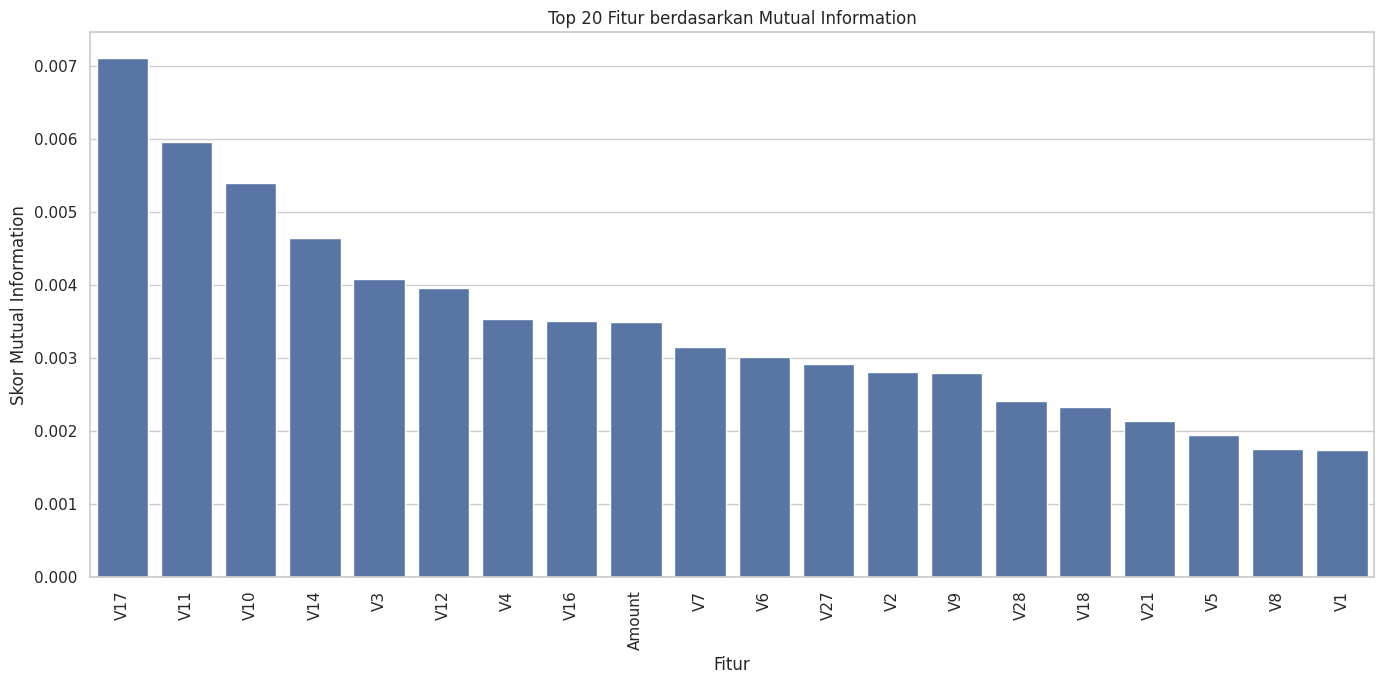

In [ ]:
def mutual_information_selection(X, y, k='all'):
    """Melakukan feature selection berdasarkan mutual information

    Parameters:
    X (DataFrame): Data fitur
    y (Series): Target
    k (int or 'all'): Jumlah fitur yang akan dipilih

    Returns:
    list: Daftar fitur terpilih
    DataFrame: DataFrame berisi skor MI setiap fitur
    """
    # Hanya gunakan kolom numerik
    X_numeric = X.select_dtypes(include=['int64', 'float64'])

    # Inisialisasi selector
    if k == 'all':
        k = X_numeric.shape[1]

    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_numeric, y)

    # Mendapatkan skor dan fitur terpilih
    scores = selector.scores_
    selected_features = X_numeric.columns[selector.get_support()]

    # Membuat DataFrame untuk visualisasi
    feature_scores = pd.DataFrame({
        'Feature': X_numeric.columns,
        'Mutual Information Score': scores
    }).sort_values('Mutual Information Score', ascending=False)

    return selected_features.tolist(), feature_scores

# Melakukan feature selection dengan mutual information
selected_mi, mi_scores = mutual_information_selection(X_reduced, y)

# Menampilkan hasil
print(f"Feature selection dengan Mutual Information: {len(selected_mi)} fitur terpilih")
print("\nTop 20 fitur berdasarkan Mutual Information:")
display(mi_scores.head(20))

# Visualisasi skor mutual information
plt.figure(figsize=(14, 7))
sns.barplot(data=mi_scores.head(20), x='Feature', y='Mutual Information Score')
plt.title('Top 20 Fitur berdasarkan Mutual Information')
plt.xlabel('Fitur')
plt.ylabel('Skor Mutual Information')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Penjelasan Matematis - Mutual Information**

Mutual Information (MI) adalah ukuran ketergantungan antara dua variabel acak. Untuk variabel diskrit $X$ dan $Y$, MI didefinisikan sebagai:

$$I(X;Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right)$$

dimana:
- $p(x,y)$ adalah probabilitas bersama variabel $X$ dan $Y$
- $p(x)$ dan $p(y)$ adalah probabilitas marginal variabel $X$ dan $Y$

Untuk variabel kontinu, integral menggantikan penjumlahan:

$$I(X;Y) = \int_{Y} \int_{X} p(x,y) \log\left(\frac{p(x,y)}{p(x)p(y)}\right) \, dx \, dy$$

MI dapat diinterpretasikan dalam beberapa cara:

1. **Pengurangan ketidakpastian**: MI mengukur berapa banyak ketidakpastian tentang $Y$ yang berkurang dengan mengetahui $X$.
2. **Kullback-Leibler (KL) divergence**: MI adalah KL divergence antara distribusi bersama $p(x,y)$ dan distribusi independen $p(x)p(y)$.
3. **Hubungan dengan entropi**: $I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) = H(X) + H(Y) - H(X,Y)$

dimana $H(X)$ adalah entropi $X$, $H(X|Y)$ adalah entropi kondisional $X$ diberikan $Y$, dan $H(X,Y)$ adalah entropi bersama.

Dalam konteks feature selection, MI mengukur seberapa informatif sebuah fitur terhadap variabel target. Nilai MI yang lebih tinggi menunjukkan fitur yang lebih relevan untuk klasifikasi. Berbeda dengan korelasi, MI dapat menangkap hubungan non-linier antara fitur dan target.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 4. Feature Selection (Lanjutan)

Melanjutkan proses feature selection, kita akan mengimplementasikan metode statistik lainnya seperti Chi-Square Test, ANOVA, dan MANOVA.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Memastikan kita punya dataset dari artifact sebelumnya
try:
    print(f"Data fitur setelah proses awal feature selection: {X_reduced.shape}")
except NameError:
    # Jika X_reduced belum didefinisikan, load dataset
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    X_reduced = X.copy()  # Untuk kasus ini, gunakan X asli jika X_reduced belum ada
    y = df[target_column]

    print(f"Dataset dimuat ulang: X shape {X_reduced.shape}, y shape {y.shape}")

Data fitur setelah proses awal feature selection: (283726, 30)


### 4.1 Feature Selection dengan Chi-Square Test

Chi-Square test mengukur dependensi antara fitur dan target. Ini cocok untuk klasifikasi dengan fitur non-negatif. Metode ini membandingkan frekuensi yang diamati dengan frekuensi yang diharapkan jika fitur dan target independen.

Data diubah menjadi non-negatif untuk chi-square test.
Feature selection dengan Chi-Square: 30 fitur terpilih

Top 20 fitur berdasarkan Chi-Square test:


,Feature,Chi-Square Score,P-Value
14,V14,186.020,0.000
12,V12,165.946,0.000
10,V10,159.134,0.000
4,V4,157.908,0.000
11,V11,138.624,0.000
3,V3,136.240,0.000
16,V16,110.053,0.000
7,V7,99.577,0.000
2,V2,98.962,0.000
9,V9,92.628,0.000



Jumlah fitur signifikan (p-value < 0.05): 22


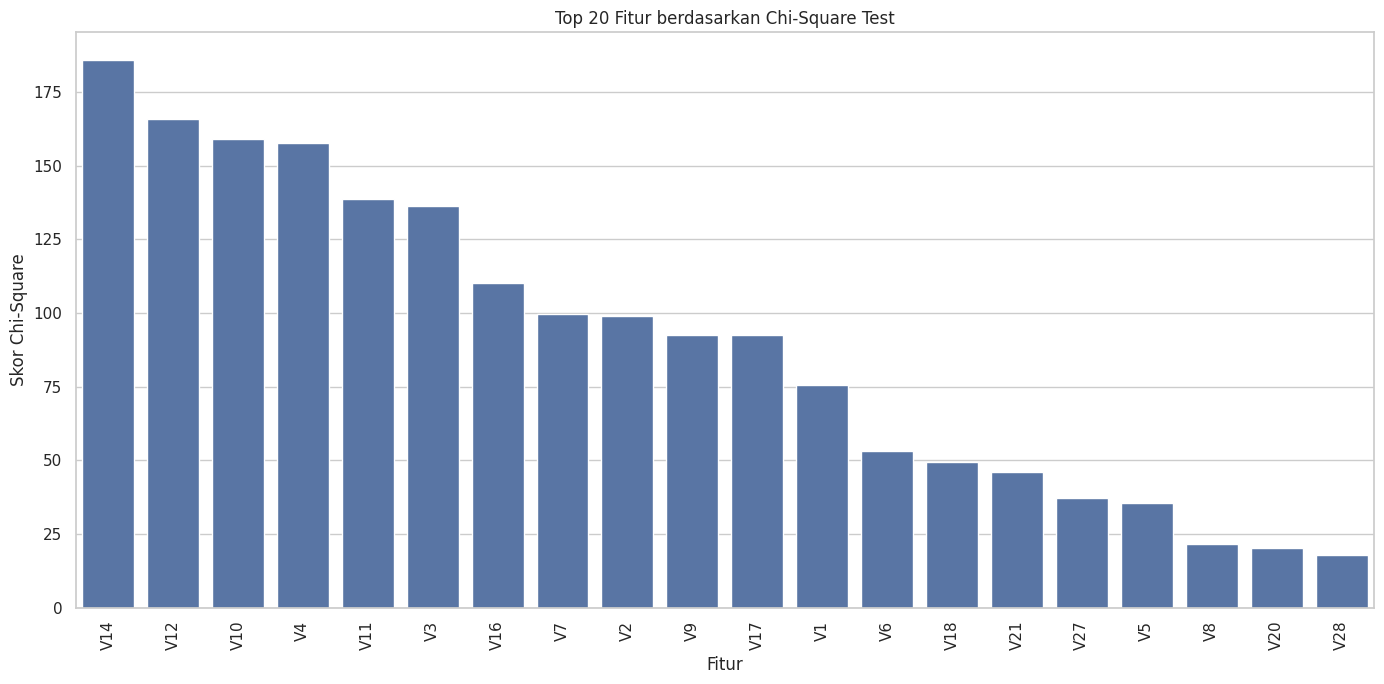

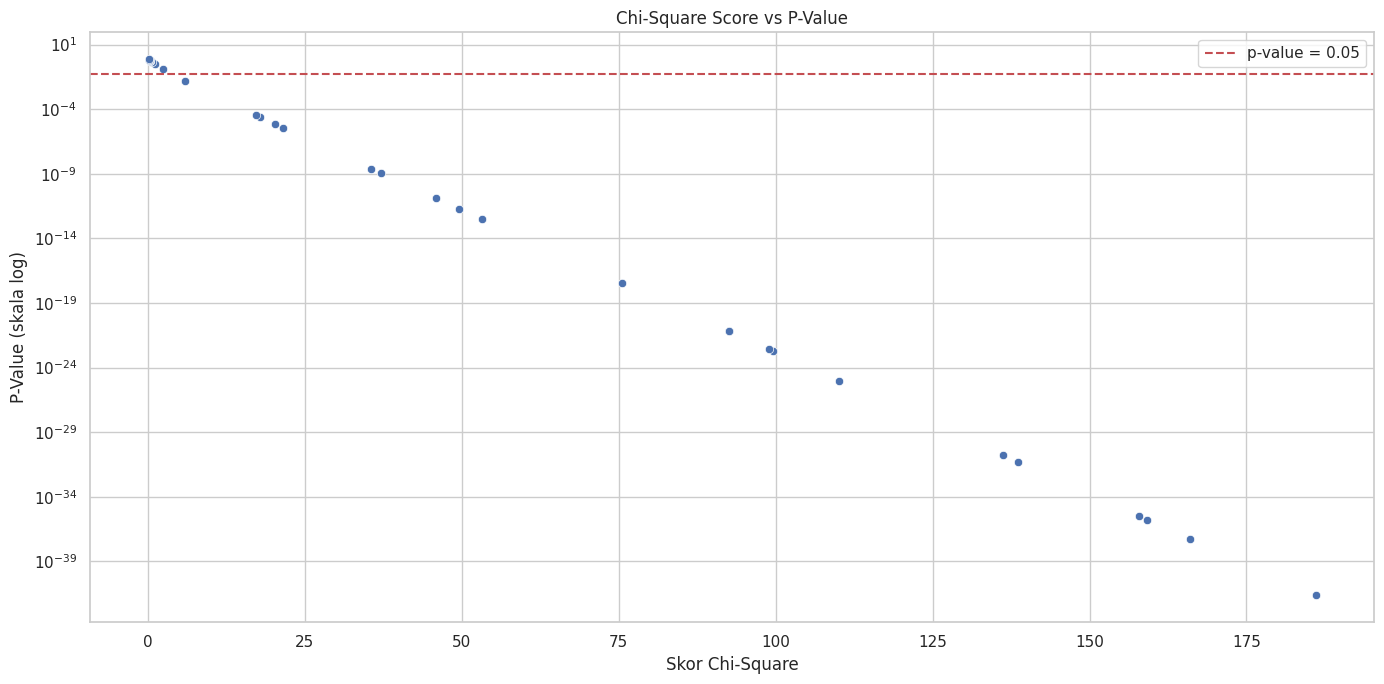

In [ ]:
def chi_square_selection(X, y, k='all'):
    """Melakukan feature selection dengan Chi-Square test

    Parameters:
    X (DataFrame): Data fitur (nilai non-negatif)
    y (Series): Target
    k (int or 'all'): Jumlah fitur yang akan dipilih

    Returns:
    list: Daftar fitur terpilih
    DataFrame: DataFrame berisi skor chi-square dan p-value setiap fitur
    """
    # Chi-Square test memerlukan data non-negatif
    X_nonneg = X.copy()

    # Memeriksa dan transformasi untuk nilai negatif
    has_negative = (X_nonneg < 0).any().any()
    if has_negative:
        # Menggunakan MinMaxScaler untuk mengubah semua nilai menjadi non-negatif
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X_nonneg = pd.DataFrame(
            scaler.fit_transform(X_nonneg),
            columns=X_nonneg.columns
        )
        print("Data diubah menjadi non-negatif untuk chi-square test.")

    # Inisialisasi selector
    if k == 'all':
        k = X_nonneg.shape[1]

    selector = SelectKBest(chi2, k=k)
    selector.fit(X_nonneg, y)

    # Mendapatkan skor dan p-value
    scores = selector.scores_
    pvalues = selector.pvalues_
    selected_features = X_nonneg.columns[selector.get_support()]

    # Membuat DataFrame untuk visualisasi
    feature_scores = pd.DataFrame({
        'Feature': X_nonneg.columns,
        'Chi-Square Score': scores,
        'P-Value': pvalues
    }).sort_values('Chi-Square Score', ascending=False)

    return selected_features.tolist(), feature_scores

# Melakukan feature selection dengan chi-square test
selected_chi2, chi2_scores = chi_square_selection(X_reduced, y)

# Menampilkan hasil
print(f"Feature selection dengan Chi-Square: {len(selected_chi2)} fitur terpilih")
print("\nTop 20 fitur berdasarkan Chi-Square test:")
display(chi2_scores.head(20))

# Menampilkan fitur signifikan (p-value < 0.05)
significant_features = chi2_scores[chi2_scores['P-Value'] < 0.05]
print(f"\nJumlah fitur signifikan (p-value < 0.05): {len(significant_features)}")

# Visualisasi skor chi-square
plt.figure(figsize=(14, 7))
sns.barplot(data=chi2_scores.head(20), x='Feature', y='Chi-Square Score')
plt.title('Top 20 Fitur berdasarkan Chi-Square Test')
plt.xlabel('Fitur')
plt.ylabel('Skor Chi-Square')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualisasi significance (p-value)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=chi2_scores, x='Chi-Square Score', y='P-Value')
plt.axhline(y=0.05, color='r', linestyle='--', label='p-value = 0.05')
plt.title('Chi-Square Score vs P-Value')
plt.xlabel('Skor Chi-Square')
plt.ylabel('P-Value (skala log)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

**Penjelasan Matematis - Chi-Square Test**

Chi-Square test ($\chi^2$) digunakan untuk menguji independensi antara dua variabel kategorikal. Dalam konteks feature selection, kita menguji hubungan antara setiap fitur dan target.

Statistik Chi-Square didefinisikan sebagai:

$$\chi^2 = \sum_{i,j} \frac{(O_{i,j} - E_{i,j})^2}{E_{i,j}}$$

dimana:
- $O_{i,j}$ adalah frekuensi yang diamati untuk kombinasi kategori $i$ dari fitur dan kategori $j$ dari target
- $E_{i,j}$ adalah frekuensi yang diharapkan jika fitur dan target independen, yang dihitung sebagai $E_{i,j} = \frac{r_i \times c_j}{n}$
- $r_i$ adalah jumlah baris ke-$i$ (total untuk kategori fitur $i$)
- $c_j$ adalah jumlah kolom ke-$j$ (total untuk kategori target $j$)
- $n$ adalah jumlah total observasi

Untuk fitur kontinu, nilai-nilai ini dibinning terlebih dahulu menjadi kategori.

Statistik $\chi^2$ mengikuti distribusi chi-square dengan derajat kebebasan $(r-1)(c-1)$, dimana $r$ adalah jumlah kategori fitur dan $c$ adalah jumlah kategori target.

Semakin besar nilai $\chi^2$, semakin kuat bukti bahwa fitur dan target tidak independen. P-value yang rendah (biasanya < 0.05) mengindikasikan bahwa ada hubungan signifikan antara fitur dan target.

Dalam implementasi scikit-learn, nilai chi-square dihitung untuk setiap fitur terhadap target, dan fitur dengan skor tertinggi dianggap paling relevan. Perlu diingat bahwa chi-square test mengharuskan semua nilai fitur non-negatif, itulah mengapa kita melakukan transformasi data jika ditemukan nilai negatif.

### 4.2 Feature Selection dengan ANOVA (Analysis of Variance)

ANOVA menguji apakah rata-rata dari beberapa kelompok sama atau tidak. Dalam konteks feature selection, kelompok adalah kategori target dan kita ingin mengetahui apakah distribusi fitur berbeda secara signifikan antar kategori.

Feature selection dengan ANOVA: 30 fitur terpilih

Top 20 fitur berdasarkan ANOVA F-test:


,Feature,F-Score,P-Value
11,V11,2521.751,0.000
3,V3,2131.523,0.000
14,V14,2046.063,0.000
12,V12,1904.961,0.000
4,V4,1891.880,0.000
10,V10,1856.586,0.000
7,V7,1356.172,0.000
16,V16,1329.068,0.000
17,V17,1309.730,0.000
2,V2,1222.035,0.000



Jumlah fitur signifikan (p-value < 0.05): 28
Fitur signifikan:


,Feature,F-Score,P-Value
11,V11,2521.751,0.000
3,V3,2131.523,0.000
14,V14,2046.063,0.000
12,V12,1904.961,0.000
4,V4,1891.880,0.000
10,V10,1856.586,0.000
7,V7,1356.172,0.000
16,V16,1329.068,0.000
17,V17,1309.730,0.000
2,V2,1222.035,0.000


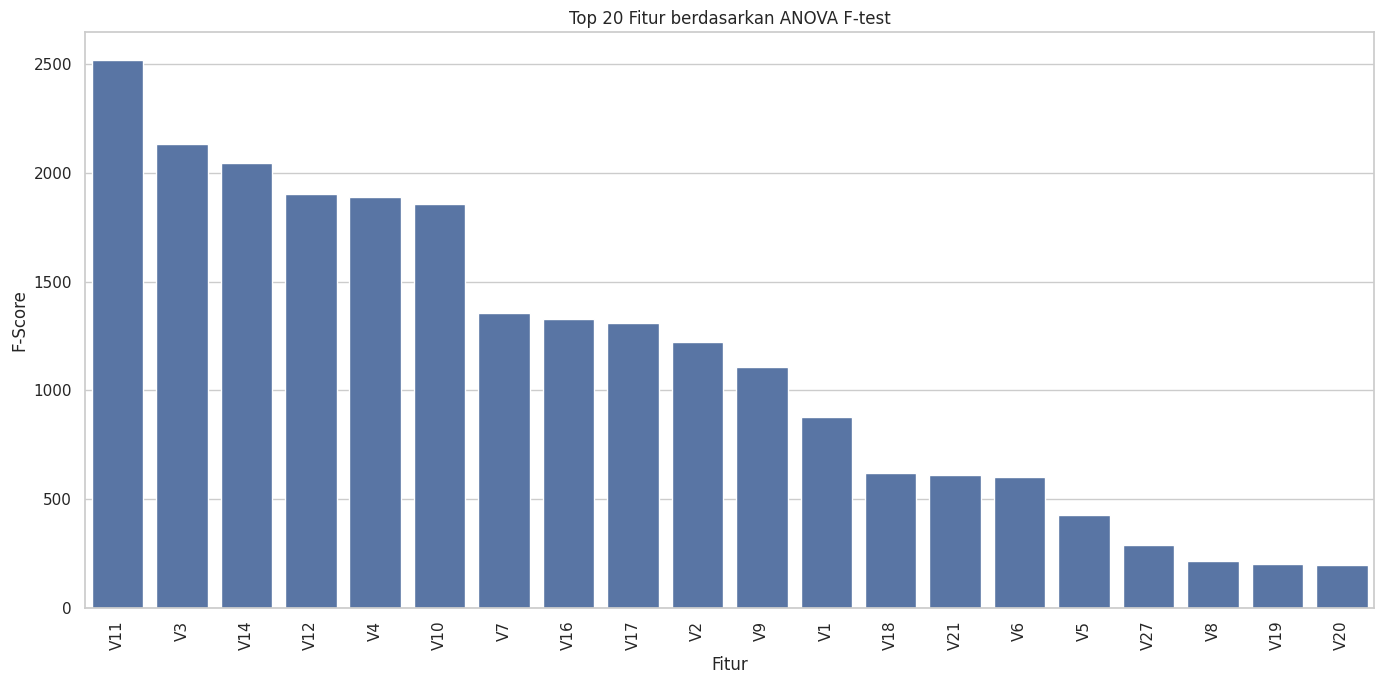

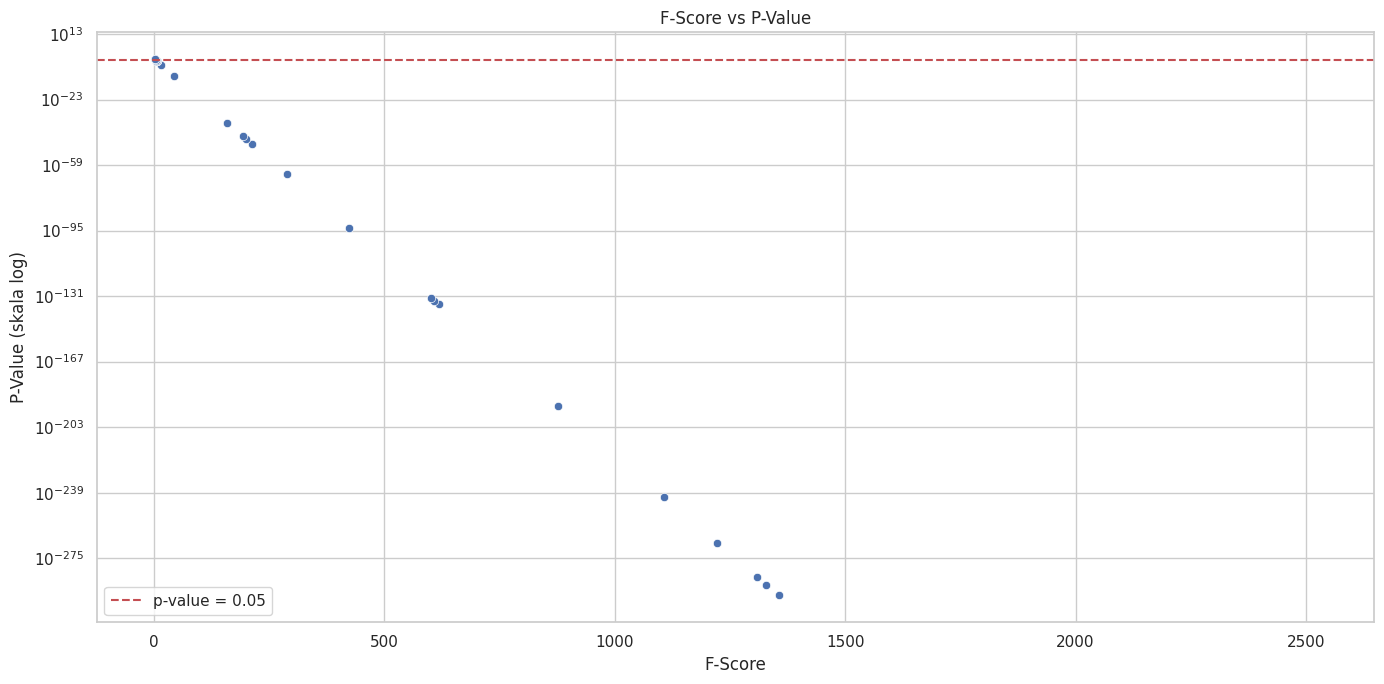

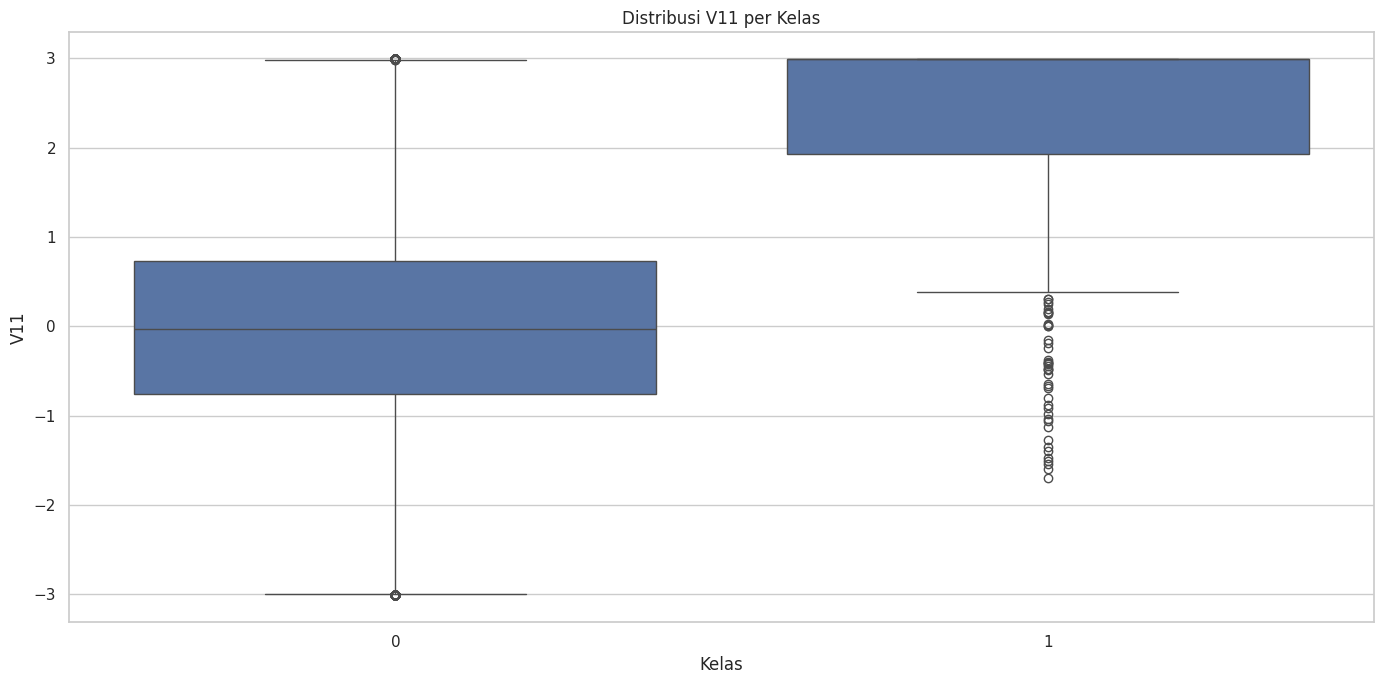


ANOVA untuk fitur V11:


,sum_sq,df,F,PR(>F)
C(group),2509.245,1.000,2521.751,0.000
Residual,282316.951,283724.000,NaN,NaN


In [ ]:
def anova_selection(X, y, k='all'):
    """Melakukan feature selection dengan ANOVA F-test

    Parameters:
    X (DataFrame): Data fitur
    y (Series): Target
    k (int or 'all'): Jumlah fitur yang akan dipilih

    Returns:
    list: Daftar fitur terpilih
    DataFrame: DataFrame berisi skor F dan p-value setiap fitur
    """
    # Inisialisasi selector
    if k == 'all':
        k = X.shape[1]

    selector = SelectKBest(f_classif, k=k)
    selector.fit(X, y)

    # Mendapatkan skor F dan p-value
    scores = selector.scores_
    pvalues = selector.pvalues_
    selected_features = X.columns[selector.get_support()]

    # Membuat DataFrame untuk visualisasi
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'F-Score': scores,
        'P-Value': pvalues
    }).sort_values('F-Score', ascending=False)

    return selected_features.tolist(), feature_scores

# Melakukan feature selection dengan ANOVA F-test
selected_anova, anova_scores = anova_selection(X_reduced, y)

# Menampilkan hasil
print(f"Feature selection dengan ANOVA: {len(selected_anova)} fitur terpilih")
print("\nTop 20 fitur berdasarkan ANOVA F-test:")
display(anova_scores.head(20))

# Menampilkan fitur signifikan (p-value < 0.05)
significant_features = anova_scores[anova_scores['P-Value'] < 0.05]
print(f"\nJumlah fitur signifikan (p-value < 0.05): {len(significant_features)}")
print("Fitur signifikan:")
display(significant_features)

# Visualisasi skor F
plt.figure(figsize=(14, 7))
sns.barplot(data=anova_scores.head(20), x='Feature', y='F-Score')
plt.title('Top 20 Fitur berdasarkan ANOVA F-test')
plt.xlabel('Fitur')
plt.ylabel('F-Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualisasi significance (p-value)
plt.figure(figsize=(14, 7))
sns.scatterplot(data=anova_scores, x='F-Score', y='P-Value')
plt.axhline(y=0.05, color='r', linestyle='--', label='p-value = 0.05')
plt.title('F-Score vs P-Value')
plt.xlabel('F-Score')
plt.ylabel('P-Value (skala log)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

# Post-hoc analysis untuk salah satu fitur paling signifikan (jika ada)
if len(significant_features) > 0:
    # Pilih fitur paling signifikan
    top_feature = significant_features.iloc[0]['Feature']

    # Visualisasi distribusi per kelas
    plt.figure(figsize=(14, 7))
    sns.boxplot(x=y, y=X_reduced[top_feature])
    plt.title(f'Distribusi {top_feature} per Kelas')
    plt.xlabel('Kelas')
    plt.ylabel(top_feature)
    plt.tight_layout()
    plt.show()

    # One-way ANOVA dan post-hoc test dengan statsmodels
    data_anova = pd.DataFrame({
        'value': X_reduced[top_feature],
        'group': y
    })

    # Menjalankan ANOVA
    model = ols(f'value ~ C(group)', data=data_anova).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"\nANOVA untuk fitur {top_feature}:")
    display(anova_table)

    # Post-hoc test (Tukey's HSD) jika lebih dari 2 kelas
    if len(y.unique()) > 2:
        try:
            from statsmodels.stats.multicomp import pairwise_tukeyhsd
            tukey = pairwise_tukeyhsd(data_anova['value'], data_anova['group'], alpha=0.05)
            print("\nTukey's HSD Post-hoc Test:")
            display(pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0]))
        except:
            print("\nTidak dapat melakukan Tukey's HSD Post-hoc test.")

**Penjelasan Matematis - ANOVA**

ANOVA (Analysis of Variance) adalah metode statistik untuk membandingkan rata-rata antar kelompok. Dalam konteks feature selection, kita ingin mengidentifikasi fitur yang memiliki distribusi berbeda secara signifikan antar kategori target.

One-way ANOVA membandingkan rata-rata dari $k$ kelompok independen. Hipotesis nol adalah bahwa semua kelompok memiliki rata-rata yang sama:

$$H_0: \mu_1 = \mu_2 = \ldots = \mu_k$$

Hipotesis alternatif adalah bahwa setidaknya satu rata-rata berbeda dengan yang lain.

Statistik F dalam ANOVA adalah rasio antara variabilitas antar kelompok dan variabilitas dalam kelompok:

$$F = \frac{MS_{between}}{MS_{within}} = \frac{SS_{between}/(k-1)}{SS_{within}/(n-k)}$$

dimana:
- $MS_{between}$ adalah mean square antar kelompok
- $MS_{within}$ adalah mean square dalam kelompok
- $SS_{between}$ adalah sum of squares antar kelompok: $\sum_{i=1}^{k} n_i(\bar{x}_i - \bar{x})^2$
- $SS_{within}$ adalah sum of squares dalam kelompok: $\sum_{i=1}^{k} \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2$
- $n_i$ adalah jumlah observasi dalam kelompok $i$
- $n$ adalah total jumlah observasi
- $\bar{x}_i$ adalah rata-rata kelompok $i$
- $\bar{x}$ adalah rata-rata keseluruhan
- $k$ adalah jumlah kelompok

Statistik F mengikuti distribusi F dengan derajat kebebasan $df_1 = k-1$ dan $df_2 = n-k$. Nilai F yang besar menunjukkan bahwa variabilitas antar kelompok lebih besar daripada variabilitas dalam kelompok, yang berarti ada perbedaan signifikan antar kelompok.

P-value yang kecil (biasanya < 0.05) menandakan bahwa kita menolak hipotesis nol, artinya setidaknya satu kelompok memiliki distribusi yang berbeda. Dalam konteks feature selection, fitur dengan p-value kecil dianggap diskriminatif dan penting untuk klasifikasi.

Salah satu keterbatasan ANOVA adalah bahwa ia hanya memberi tahu kita apakah ada perbedaan antar kelompok, tetapi tidak menunjukkan kelompok mana yang berbeda. Untuk itu, kita perlu melakukan post-hoc test, seperti Tukey's HSD (Honestly Significant Difference), yang membandingkan semua pasangan kelompok untuk mengidentifikasi pasangan mana yang secara signifikan berbeda.

### 4.3 Feature Selection dengan MANOVA (Multivariate Analysis of Variance)

MANOVA memperluas ANOVA ke pengujian multivariat. Ini menguji apakah rata-rata multivariat dari beberapa kelompok berbeda. MANOVA mempertimbangkan korelasi antar fitur, yang dapat memberikan analisis lebih menyeluruh.

In [ ]:
def perform_manova(X, y, max_features=10):
    """Melakukan MANOVA untuk menganalisis perbedaan kelas target terhadap subset fitur

    Parameters:
    X (DataFrame): Data fitur
    y (Series): Target
    max_features (int): Jumlah fitur yang akan digunakan dalam MANOVA

    Returns:
    dict: Dictionary berisi hasil MANOVA
    """
    # MANOVA bisa menjadi komputasi berat dengan banyak fitur
    # Gunakan K fitur teratas dari ANOVA untuk MANOVA
    if X.shape[1] > max_features:
        _, anova_scores_subset = anova_selection(X, y, k=max_features)
        top_features = anova_scores_subset['Feature'].tolist()
        X_subset = X[top_features]
        print(f"Menggunakan {max_features} fitur teratas dari ANOVA untuk MANOVA.")
    else:
        X_subset = X
        print(f"Menggunakan semua {X.shape[1]} fitur untuk MANOVA.")

    try:
        # Mempersiapkan data untuk MANOVA
        # Mencoba menggunakan library manova jika tersedia
        from manova import manova

        # Menggabungkan fitur dan target untuk MANOVA
        data_manova = pd.concat([X_subset, pd.DataFrame({'group': y})], axis=1)

        # Membuat formula untuk MANOVA
        dvs = X_subset.columns.tolist()  # dependent variables (fitur)
        formula = ' + '.join(dvs) + ' ~ group'

        # Melakukan MANOVA
        manova_results = manova(formula=formula, data=data_manova)

        return manova_results
    except (ImportError, Exception) as e:
        print(f"Error melakukan MANOVA: {e}")
        print("Sebagai alternatif, melakukan ANOVA satu per satu...")

        # Jika MANOVA tidak tersedia, lakukan ANOVA untuk setiap fitur
        anova_results = {}
        for feature in X_subset.columns:
            # Membuat model dengan statsmodels
            formula = f"{feature} ~ C(group)"
            data_anova = pd.concat([X_subset[[feature]], pd.DataFrame({'group': y})], axis=1)
            try:
                model = ols(formula, data=data_anova).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                anova_results[feature] = anova_table
            except Exception as e:
                print(f"Error pada ANOVA untuk {feature}: {e}")

        return anova_results

# Melakukan MANOVA
manova_results = perform_manova(X_reduced, y, max_features=10)

# Menampilkan hasil
print("\nHasil MANOVA atau ANOVA terpisah:")
if isinstance(manova_results, dict):
    # Jika MANOVA tidak tersedia, hasil adalah dictionary dari tabel ANOVA
    for feature, anova_table in manova_results.items():
        print(f"\nANOVA untuk {feature}:")
        display(anova_table)
else:
    # Jika MANOVA berhasil, hasil adalah tabel MANOVA
    display(manova_results)

Menggunakan 10 fitur teratas dari ANOVA untuk MANOVA.
Error melakukan MANOVA: No module named 'manova'
Sebagai alternatif, melakukan ANOVA satu per satu...

Hasil MANOVA atau ANOVA terpisah:

ANOVA untuk V11:


,sum_sq,df,F,PR(>F)
C(group),2509.245,1.000,2521.751,0.000
Residual,282316.951,283724.000,NaN,NaN



ANOVA untuk V3:


,sum_sq,df,F,PR(>F)
C(group),3965.263,1.000,2131.523,0.000
Residual,527810.484,283724.000,NaN,NaN



ANOVA untuk V14:


,sum_sq,df,F,PR(>F)
C(group),1248.765,1.000,2046.063,0.000
Residual,173164.033,283724.000,NaN,NaN



ANOVA untuk V12:


,sum_sq,df,F,PR(>F)
C(group),1345.817,1.000,1904.961,0.000
Residual,200445.259,283724.000,NaN,NaN



ANOVA untuk V4:


,sum_sq,df,F,PR(>F)
C(group),3223.891,1.000,1891.880,0.000
Residual,483484.851,283724.000,NaN,NaN



ANOVA untuk V10:


,sum_sq,df,F,PR(>F)
C(group),1252.299,1.000,1856.586,0.000
Residual,191376.648,283724.000,NaN,NaN



ANOVA untuk V7:


,sum_sq,df,F,PR(>F)
C(group),1007.941,1.000,1356.172,0.000
Residual,210870.897,283724.000,NaN,NaN



ANOVA untuk V16:


,sum_sq,df,F,PR(>F)
C(group),859.136,1.000,1329.068,0.000
Residual,183404.827,283724.000,NaN,NaN



ANOVA untuk V17:


,sum_sq,df,F,PR(>F)
C(group),590.392,1.000,1309.730,0.000
Residual,127895.290,283724.000,NaN,NaN



ANOVA untuk V2:


,sum_sq,df,F,PR(>F)
C(group),1525.840,1.000,1222.035,0.000
Residual,354259.281,283724.000,NaN,NaN



ANOVA untuk V9:


,sum_sq,df,F,PR(>F)
C(group),1142.749,1.000,1106.785,0.000
Residual,292943.463,283724.000,NaN,NaN



ANOVA untuk V1:


,sum_sq,df,F,PR(>F)
C(group),2212.120,1.000,876.676,0.000
Residual,715922.116,283724.000,NaN,NaN



ANOVA untuk V18:


,sum_sq,df,F,PR(>F)
C(group),396.645,1.000,618.262,0.000
Residual,182022.843,283724.000,NaN,NaN



ANOVA untuk V21:


,sum_sq,df,F,PR(>F)
C(group),63.611,1.000,608.294,0.000
Residual,29669.876,283724.000,NaN,NaN



ANOVA untuk V6:


,sum_sq,df,F,PR(>F)
C(group),602.756,1.000,601.239,0.000
Residual,284440.266,283724.000,NaN,NaN



ANOVA untuk V5:


,sum_sq,df,F,PR(>F)
C(group),490.654,1.000,424.265,0.000
Residual,328121.336,283724.000,NaN,NaN



ANOVA untuk V27:


,sum_sq,df,F,PR(>F)
C(group),7.848,1.000,288.707,0.000
Residual,7712.403,283724.000,NaN,NaN



ANOVA untuk V8:


,sum_sq,df,F,PR(>F)
C(group),50.014,1.000,213.188,0.000
Residual,66562.221,283724.000,NaN,NaN



ANOVA untuk V19:


,sum_sq,df,F,PR(>F)
C(group),115.344,1.000,200.689,0.000
Residual,163066.464,283724.000,NaN,NaN



ANOVA untuk V20:


,sum_sq,df,F,PR(>F)
C(group),19.526,1.000,193.764,0.000
Residual,28591.237,283724.000,NaN,NaN



ANOVA untuk V28:


,sum_sq,df,F,PR(>F)
C(group),2.450,1.000,159.069,0.000
Residual,4369.149,283724.000,NaN,NaN



ANOVA untuk Time:


,sum_sq,df,F,PR(>F)
C(group),97707689327.251,1.000,43.346,0.000
Residual,639546092682485.375,283724.000,NaN,NaN



ANOVA untuk V24:


,sum_sq,df,F,PR(>F)
C(group),5.420,1.000,15.349,0.000
Residual,100187.950,283724.000,NaN,NaN



ANOVA untuk V23:


,sum_sq,df,F,PR(>F)
C(group),0.463,1.000,6.503,0.011
Residual,20207.076,283724.000,NaN,NaN



ANOVA untuk Amount:


,sum_sq,df,F,PR(>F)
C(group),23248.135,1.000,6.106,0.013
Residual,1080295641.755,283724.000,NaN,NaN



ANOVA untuk V25:


,sum_sq,df,F,PR(>F)
C(group),1.459,1.000,6.004,0.014
Residual,68940.286,283724.000,NaN,NaN



ANOVA untuk V26:


,sum_sq,df,F,PR(>F)
C(group),1.103,1.000,5.047,0.025
Residual,62015.278,283724.000,NaN,NaN



ANOVA untuk V13:


,sum_sq,df,F,PR(>F)
C(group),3.982,1.000,4.111,0.043
Residual,274824.620,283724.000,NaN,NaN



ANOVA untuk V15:


,sum_sq,df,F,PR(>F)
C(group),1.918,1.000,2.349,0.125
Residual,231627.863,283724.000,NaN,NaN



ANOVA untuk V22:


,sum_sq,df,F,PR(>F)
C(group),1.047,1.000,2.093,0.148
Residual,141906.099,283724.000,NaN,NaN


**Penjelasan Matematis - MANOVA**

MANOVA (Multivariate Analysis of Variance) memperluas analisis ANOVA dari pengujian univariat ke pengujian multivariat. Sementara ANOVA menguji perbedaan mean untuk satu variabel dependen antar kelompok, MANOVA menguji perbedaan vector mean untuk beberapa variabel dependen secara simultan.

Hipotesis nol dalam MANOVA adalah bahwa vector mean dari semua kelompok sama:

$$H_0: \vec{\mu}_1 = \vec{\mu}_2 = \ldots = \vec{\mu}_k$$

dimana $\vec{\mu}_i$ adalah vector mean multivariat untuk kelompok $i$.

MANOVA menggunakan beberapa statistik uji, dengan yang paling umum adalah:

1. **Wilks' Lambda ($\Lambda$)**:
   $$\Lambda = \frac{|W|}{|B+W|}$$
   
   dimana $W$ adalah matriks sum of squares and cross-product (SSCP) dalam kelompok, dan $B$ adalah matriks SSCP antar kelompok. Nilai $\Lambda$ yang kecil mengindikasikan perbedaan signifikan antar kelompok.

2. **Pillai's Trace ($V$)**:
   $$V = \text{trace}\left(B(B+W)^{-1}\right)$$
   
   Nilai $V$ yang besar mengindikasikan efek yang signifikan. Pillai's trace dianggap paling robust terhadap pelanggaran asumsi.

3. **Hotelling-Lawley Trace ($T^2$)**:
   $$T^2 = \text{trace}\left(BW^{-1}\right)$$
   
   Nilai $T^2$ yang besar mengindikasikan perbedaan signifikan antar kelompok.

4. **Roy's Largest Root ($\theta$)**:
   $$\theta = \text{largest eigenvalue of } BW^{-1}$$
   
   Nilai $\theta$ yang besar mengindikasikan perbedaan signifikan antar kelompok. Roy's largest root hanya mempertimbangkan eigenvalue terbesar, yang membuatnya kurang robust tetapi potensial lebih powerful dalam kondisi tertentu.

Setiap statistik ini dikonversi ke statistik F atau statistik lain untuk menghitung p-value. P-value kecil (< 0.05) mengindikasikan bahwa setidaknya satu kelompok memiliki vector mean yang berbeda secara signifikan.

Keuntungan MANOVA dibandingkan dengan ANOVA terpisah untuk setiap variabel adalah bahwa MANOVA mempertimbangkan korelasi antar variabel dependen dan mengontrol error Type I (menolak hipotesis nul ketika sebenarnya benar) untuk pengujian multiple. Namun, MANOVA memerlukan ukuran sampel yang lebih besar dan asumsi tambahan seperti homogenitas matriks kovarians.

Dalam konteks feature selection, MANOVA dapat mengidentifikasi set fitur yang secara kolektif berbeda antar kategori target, bahkan jika fitur individu tidak menunjukkan perbedaan yang signifikan dalam ANOVA.

### 4.4 Feature Selection dengan Model-Based (Recursive Feature Elimination)

Model-based feature selection menggunakan model machine learning untuk mengevaluasi fitur. Recursive Feature Elimination (RFE) bekerja dengan melatih model, memeringkat fitur berdasarkan kepentingan, dan secara berulang menghapus fitur terlemah.

Feature selection dengan RFE: 10 fitur terpilih

Fitur terpilih:
['V4', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17']

Ranking semua fitur:


,Feature,Ranking
7,V7,1
4,V4,1
13,V13,1
14,V14,1
12,V12,1
11,V11,1
10,V10,1
8,V8,1
17,V17,1
16,V16,1


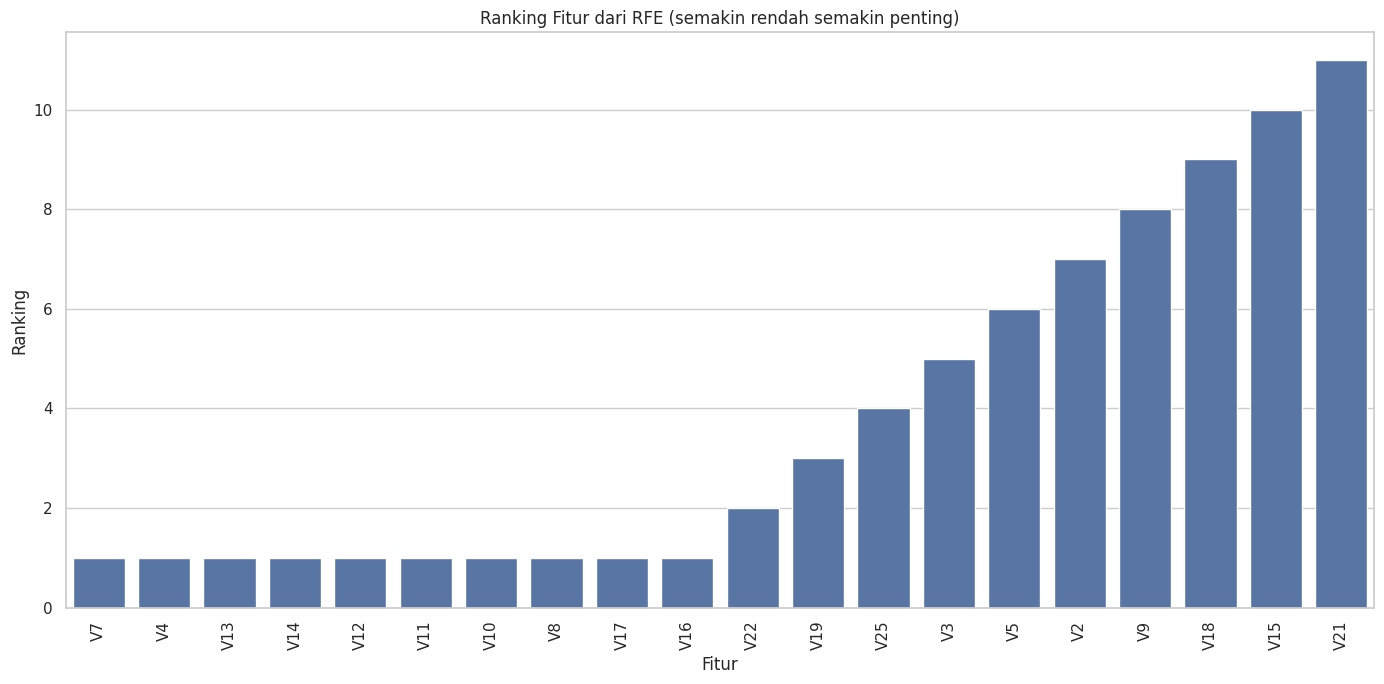

In [ ]:
def rfe_selection(X, y, n_features_to_select=10):
    """Melakukan feature selection dengan Recursive Feature Elimination

    Parameters:
    X (DataFrame): Data fitur
    y (Series): Target
    n_features_to_select (int): Jumlah fitur yang akan dipilih

    Returns:
    list: Daftar fitur terpilih
    DataFrame: DataFrame berisi ranking fitur
    """
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression

    # Memastikan jumlah fitur yang dipilih tidak melebihi jumlah fitur yang tersedia
    n_features = min(n_features_to_select, X.shape[1])

    # Inisialisasi estimator (model)
    estimator = LogisticRegression(max_iter=1000, random_state=42)

    # Inisialisasi RFE
    selector = RFE(estimator, n_features_to_select=n_features, step=1)
    selector = selector.fit(X, y)

    # Mendapatkan fitur terpilih dan ranking
    selected_features = X.columns[selector.support_]
    ranking = selector.ranking_

    # Membuat DataFrame untuk visualisasi
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': ranking
    }).sort_values('Ranking')

    return selected_features.tolist(), feature_ranking

# Melakukan feature selection dengan RFE
n_features_to_select = min(10, X_reduced.shape[1])  # Pilih 10 fitur atau semua jika kurang dari 10
selected_rfe, rfe_ranking = rfe_selection(X_reduced, y, n_features_to_select=n_features_to_select)

# Menampilkan hasil
print(f"Feature selection dengan RFE: {len(selected_rfe)} fitur terpilih")
print("\nFitur terpilih:")
print(selected_rfe)
print("\nRanking semua fitur:")
display(rfe_ranking)

# Visualisasi ranking fitur
plt.figure(figsize=(14, 7))
sns.barplot(data=rfe_ranking.head(20), x='Feature', y='Ranking')
plt.title('Ranking Fitur dari RFE (semakin rendah semakin penting)')
plt.xlabel('Fitur')
plt.ylabel('Ranking')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Penjelasan Matematis - Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) adalah teknik feature selection yang bekerja dengan secara berulang melatih model, memeringkat fitur berdasarkan kepentingan, dan mengeliminasi fitur terlemah. Algoritma RFE adalah sebagai berikut:

1. Latih model pada seluruh set fitur dan hitung kepentingan fitur (feature importance)
2. Eliminasi fitur terlemah (dengan skor kepentingan terendah)
3. Ulangi langkah 1 dan 2 sampai jumlah fitur yang diinginkan tercapai

Cara menghitung kepentingan fitur bergantung pada model yang digunakan:

- **Linear Models (misalnya Logistic Regression)**: Kepentingan fitur dihitung dari nilai absolut koefisien. Untuk model linier, koefisien fitur $j$ adalah $\beta_j$ dalam formula:
  $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p$$
  
  Kepentingan fitur $j$ dihitung sebagai $|\beta_j|$.

- **Tree-based Models (misalnya Random Forest)**: Kepentingan fitur dihitung dari penurunan impurity rata-rata yang disebabkan oleh fitur tersebut.

- **Support Vector Machines dengan kernel linier**: Kepentingan fitur dihitung dari kuadrat weight vector.

RFE lebih powerful dibandingkan metode filter sederhana (seperti chi-square atau ANOVA) karena:
- Mempertimbangkan interaksi antar fitur dalam konteks model
- Mengevaluasi ulang kepentingan fitur setelah setiap eliminasi
- Dapat menangkap hubungan non-linier (jika menggunakan model yang sesuai)

Namun, RFE juga lebih komputasional intensif karena model harus dilatih berkali-kali. Untuk dataset dengan banyak fitur, RFE dapat menggunakan pendekatan "step" dimana beberapa fitur dieliminasi pada setiap iterasi untuk mengurangi waktu komputasi.

Dalam implementasi kita, RFE menggunakan Logistic Regression sebagai estimator, yang berarti kepentingan fitur dihitung berdasarkan koefisien regresi logistik. Hasilnya adalah subset fitur yang paling diskriminatif menurut model.

## Kesimpulan Feature Selection

Kita telah menggunakan berbagai metode feature selection untuk mengidentifikasi fitur yang paling relevan untuk klasifikasi:

1. **Constant dan Quasi-Constant**: Menghapus fitur dengan variansi rendah yang tidak memberikan informasi diskriminatif.

2. **Fitur Duplikat**: Mengidentifikasi dan menghapus fitur yang sangat berkorelasi untuk mengurangi redundansi.

3. **Mutual Information**: Mengukur ketergantungan antara fitur dan target, menangkap hubungan non-linier.

4. **Chi-Square Test**: Menguji independensi antara fitur dan target, cocok untuk fitur non-negatif.

5. **ANOVA**: Menguji perbedaan rata-rata antar kelompok, cocok untuk fitur numerik dan target kategorikal.

6. **MANOVA**: Memperluas ANOVA ke pengujian multivariat, mempertimbangkan korelasi antar fitur.

7. **Recursive Feature Elimination**: Mengevaluasi fitur dalam konteks model, secara berulang mengeliminasi fitur terlemah.

Setiap metode memiliki kelebihan dan kekurangan, dan hasil mungkin bervariasi antar metode. Untuk pemilihan fitur final, kita perlu mempertimbangkan hasil dari beberapa metode dan konteks domain masalah.

Langkah selanjutnya adalah feature engineering, dimana kita akan mentransformasi fitur yang tersisa untuk membuat model lebih efektif.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 5. Feature Engineering

Feature engineering adalah proses transformasi data mentah menjadi fitur yang lebih baik untuk model machine learning. Ini adalah langkah krusial yang dapat secara signifikan meningkatkan performa model. Beberapa teknik feature engineering meliputi:

1. **Transformasi Data**: Mengubah distribusi data (scaling, normalization, log transform, dll)
2. **Encoding**: Mengkonversi variabel kategorikal ke numerik (Label Encoding, One-Hot Encoding)
3. **Feature Creation**: Membuat fitur baru dari fitur yang ada
4. **Dimensionality Reduction**: Mengurangi dimensi data (PCA, t-SNE, dll)

Mari kita implementasikan berbagai teknik feature engineering untuk dataset kita.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    PowerTransformer,
    QuantileTransformer,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Memastikan kita punya dataset dari artifact sebelumnya
try:
    print(f"Data setelah feature selection: {X_reduced.shape}")
except NameError:
    # Jika X_reduced belum didefinisikan, load dataset
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    X_reduced = X.copy()  # Untuk kasus ini, gunakan X asli jika X_reduced belum ada
    y = df[target_column]

    print(f"Dataset dimuat ulang: X shape {X_reduced.shape}, y shape {y.shape}")

# Membuat salinan data untuk feature engineering
X_fe = X_reduced.copy()

Data setelah feature selection: (283726, 30)


### 5.1 Identifikasi Tipe Data Fitur

Langkah pertama dalam feature engineering adalah mengidentifikasi tipe data dari setiap fitur, karena teknik yang digunakan akan berbeda untuk fitur numerik dan kategorikal.

In [ ]:
# Fungsi untuk mengidentifikasi tipe data fitur
def identify_feature_types(X):
    """Mengidentifikasi tipe data fitur

    Parameters:
    X (DataFrame): Data fitur

    Returns:
    dict: Dictionary berisi daftar fitur berdasarkan tipe data
    """
    # Identifikasi berdasarkan tipe data
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Periksa juga fitur numerik dengan jumlah nilai unik yang sedikit (potensial kategorikal)
    potential_categorical = []
    for col in numeric_cols:
        n_unique = X[col].nunique()
        if n_unique < 10:  # Ambang batas untuk 'sedikit' nilai unik
            potential_categorical.append(col)

    # Menampilkan jumlah masing-masing tipe fitur
    print(f"Jumlah Fitur Numerik: {len(numeric_cols)}")
    print(f"Jumlah Fitur Kategorikal: {len(categorical_cols)}")
    print(f"Jumlah Fitur Numerik yang Potensial Kategorikal: {len(potential_categorical)}")

    if len(potential_categorical) > 0:
        print("\nFitur Numerik yang Potensial Kategorikal:")
        for col in potential_categorical:
            unique_values = X[col].unique()
            print(f"{col}: {len(unique_values)} nilai unik {unique_values}")

    return {
        'numeric': numeric_cols,
        'categorical': categorical_cols,
        'potential_categorical': potential_categorical
    }

# Mengidentifikasi tipe data fitur
feature_types = identify_feature_types(X_fe)

# Menampilkan contoh nilai untuk setiap tipe fitur
if feature_types['numeric']:
    print("\nContoh Fitur Numerik:")
    display(X_fe[feature_types['numeric'][:3]].head())

if feature_types['categorical']:
    print("\nContoh Fitur Kategorikal:")
    display(X_fe[feature_types['categorical'][:3]].head())

Jumlah Fitur Numerik: 30
Jumlah Fitur Kategorikal: 0
Jumlah Fitur Numerik yang Potensial Kategorikal: 0

Contoh Fitur Numerik:


,Time,V1,V2
0,0.000,-1.360,-0.073
1,0.000,1.192,0.266
2,1.000,-1.358,-1.340
3,1.000,-0.966,-0.185
4,2.000,-1.158,0.878


### 5.2 Transformasi Data Numerik

Transformasi data numerik penting untuk memastikan fitur berada dalam skala yang sesuai, yang dapat meningkatkan konvergensi dan performa model. Beberapa teknik scaling dan normalisasi yang umum digunakan:

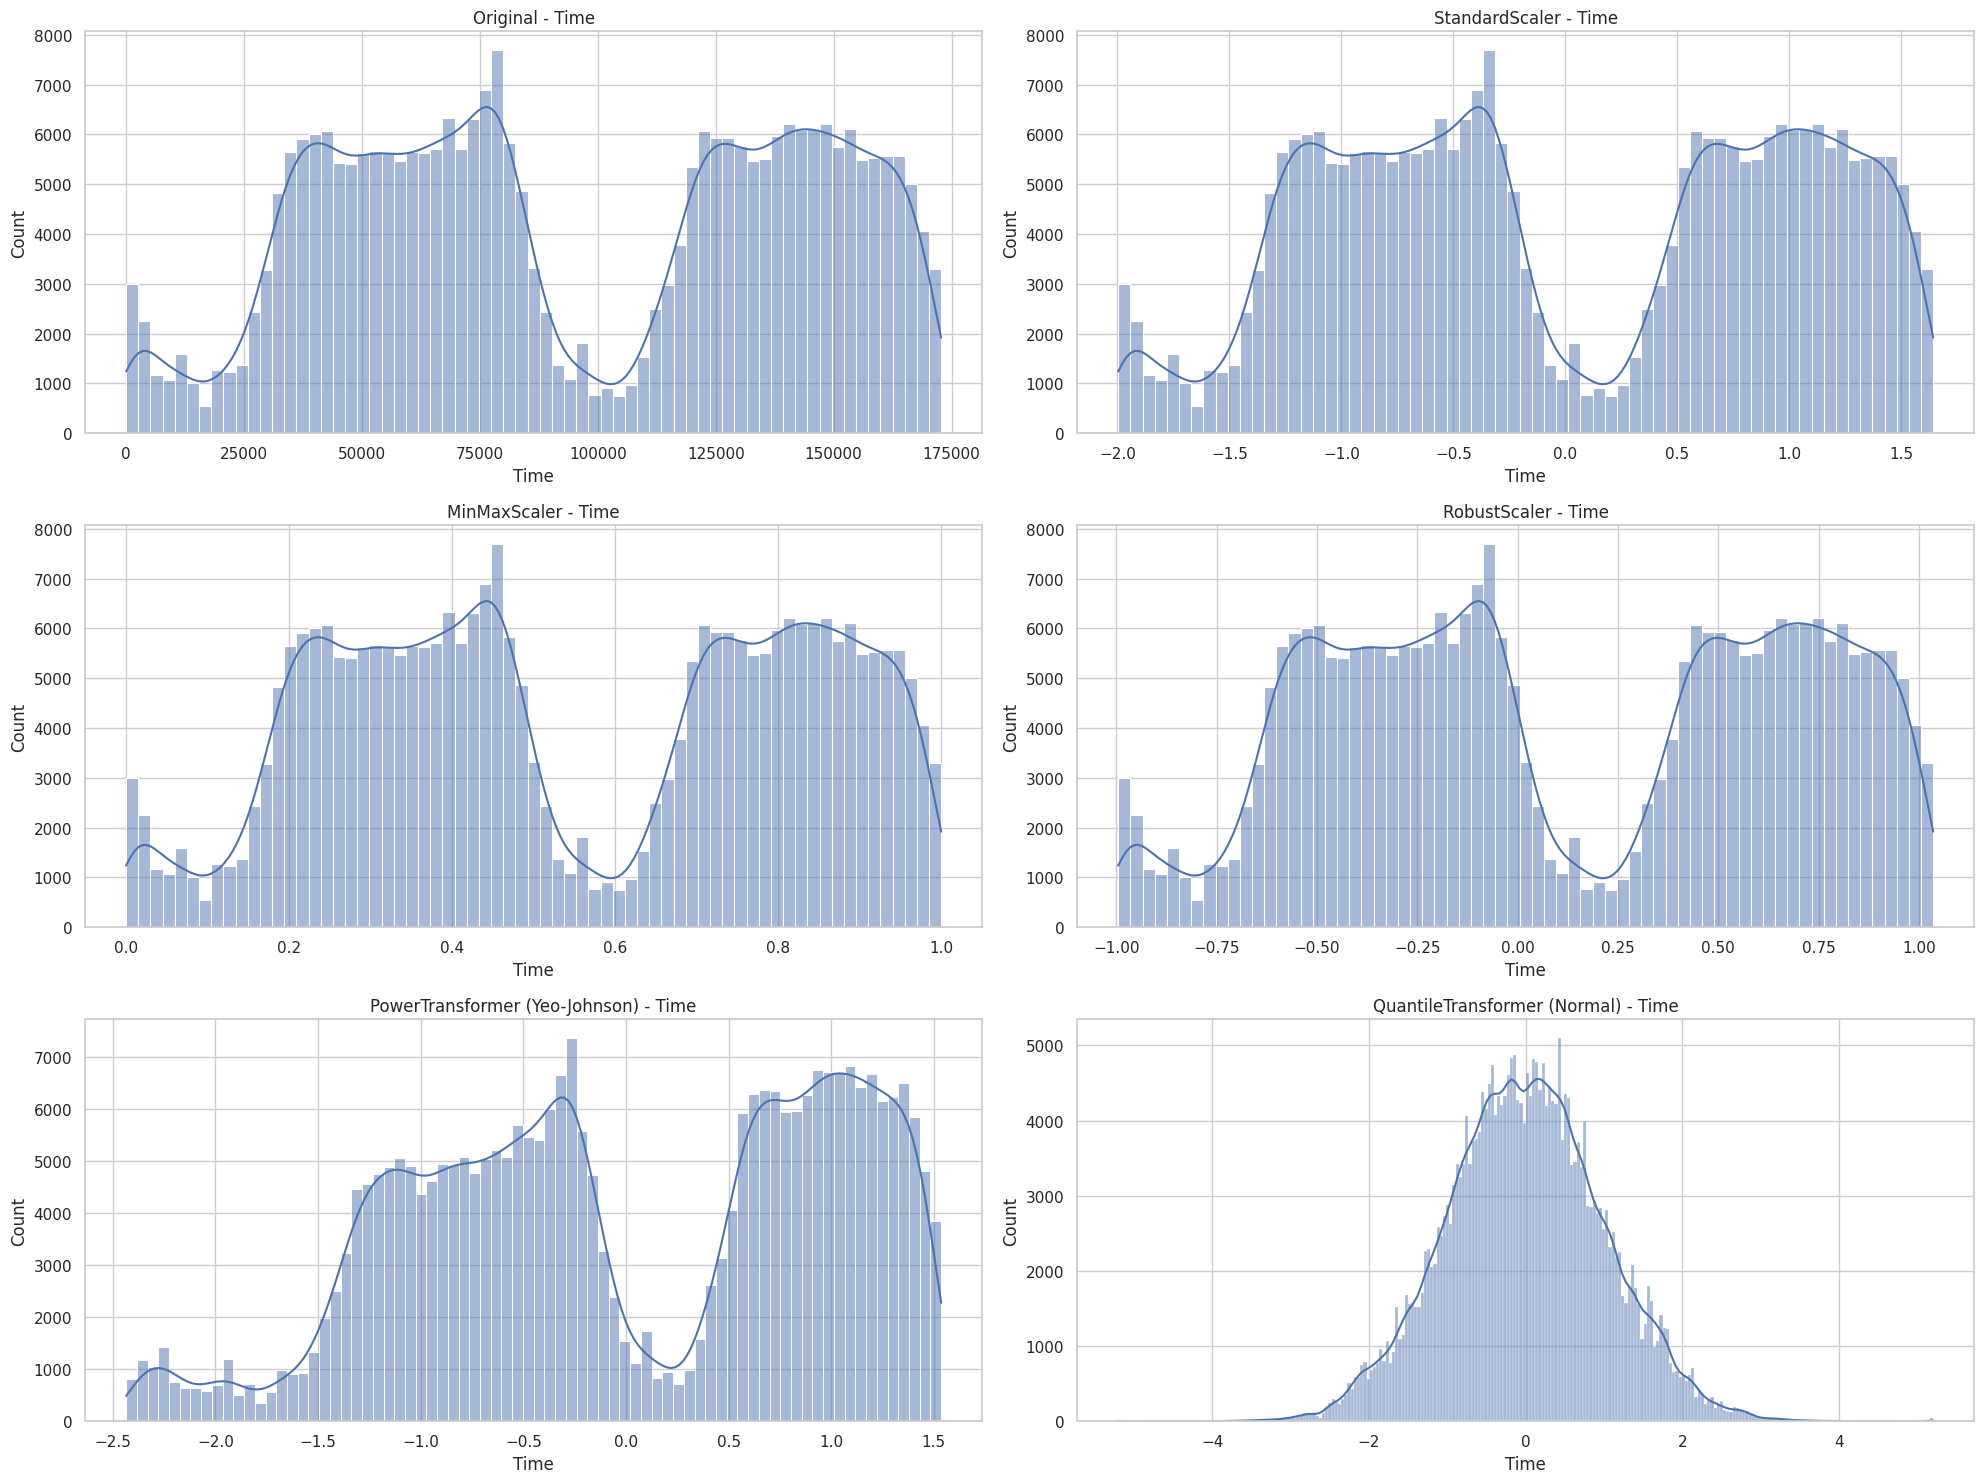


Statistik deskriptif setelah StandardScaler:


,Time
count,283726.000
mean,0.000
std,1.000
min,-1.997
25%,-0.855
50%,-0.213
75%,0.937
max,1.642



Statistik deskriptif setelah MinMaxScaler:


,Time
count,283726.000
mean,0.549
std,0.275
min,0.000
25%,0.314
50%,0.490
75%,0.806
max,1.000



Statistik deskriptif setelah RobustScaler:


,Time
count,283726.000
mean,0.119
std,0.558
min,-0.995
25%,-0.358
50%,0.000
75%,0.642
max,1.035



Statistik deskriptif setelah PowerTransformer (Yeo-Johnson):


,Time
count,283726.000
mean,0.000
std,1.000
min,-2.435
25%,-0.810
50%,-0.143
75%,0.928
max,1.536



Statistik deskriptif setelah QuantileTransformer (Normal):


,Time
count,283726.000
mean,-0.006
std,1.008
min,-5.199
25%,-0.681
50%,-0.008
75%,0.658
max,5.199


In [ ]:
def apply_numeric_transformations(X, numeric_cols):
    """Menerapkan berbagai transformasi pada fitur numerik

    Parameters:
    X (DataFrame): Data fitur
    numeric_cols (list): Daftar kolom numerik

    Returns:
    dict: Dictionary berisi DataFrame setelah transformasi
    """
    if not numeric_cols:
        print("Tidak ada fitur numerik untuk ditransformasi.")
        return {}

    # Membuat subset data numerik
    X_numeric = X[numeric_cols].copy()

    # Inisialisasi transformers
    transformers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler(),
        'PowerTransformer (Yeo-Johnson)': PowerTransformer(method='yeo-johnson'),
        'QuantileTransformer (Normal)': QuantileTransformer(output_distribution='normal', random_state=42)
    }

    # Menerapkan setiap transformer
    transformed_data = {}
    for name, transformer in transformers.items():
        try:
            X_transformed = pd.DataFrame(
                transformer.fit_transform(X_numeric),
                columns=X_numeric.columns
            )
            transformed_data[name] = X_transformed
        except Exception as e:
            print(f"Error pada transformasi {name}: {e}")

    # Menambahkan log transformation untuk fitur numerik positif
    X_positive = X_numeric.copy()
    positive_cols = []
    for col in X_numeric.columns:
        if (X_numeric[col] > 0).all():
            X_positive[col] = np.log1p(X_numeric[col])  # log(1+x) untuk menangani nilai nol
            positive_cols.append(col)

    if positive_cols:
        transformed_data['Log Transform'] = X_positive

    return transformed_data

# Menerapkan transformasi pada fitur numerik
numeric_transformations = apply_numeric_transformations(X_fe, feature_types['numeric'])

# Menampilkan hasil transformasi untuk salah satu fitur
if feature_types['numeric'] and numeric_transformations:
    # Pilih fitur pertama untuk visualisasi
    feature_to_viz = feature_types['numeric'][0]

    plt.figure(figsize=(20, 15))
    n_transforms = len(numeric_transformations) + 1  # +1 untuk data asli
    n_rows = (n_transforms // 2) + (n_transforms % 2)  # Menghitung jumlah baris yang dibutuhkan

    # Visualisasi data asli
    plt.subplot(n_rows, 2, 1)
    sns.histplot(X_fe[feature_to_viz], kde=True)
    plt.title(f'Original - {feature_to_viz}')

    # Visualisasi hasil transformasi
    for i, (name, X_transformed) in enumerate(numeric_transformations.items(), start=2):
        plt.subplot(n_rows, 2, i)
        sns.histplot(X_transformed[feature_to_viz], kde=True)
        plt.title(f'{name} - {feature_to_viz}')

    plt.tight_layout()
    plt.show()

    # Menampilkan statistik deskriptif setelah transformasi
    for name, X_transformed in numeric_transformations.items():
        print(f"\nStatistik deskriptif setelah {name}:")
        display(X_transformed[feature_to_viz].describe())

**Penjelasan Matematis - Transformasi Data Numerik**

1. **StandardScaler (Z-score normalization)**
   
   Mentransformasi fitur dengan mengurangkan mean dan membagi dengan standar deviasi:
   $$z = \frac{x - \mu}{\sigma}$$
   
   dimana $\mu$ adalah mean dan $\sigma$ adalah standar deviasi. Hasil transformasi memiliki mean 0 dan standar deviasi 1.

2. **MinMaxScaler**
   
   Menskalakan fitur ke rentang spesifik (default [0, 1]):
   $$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$
   
   dimana $x_{\min}$ dan $x_{\max}$ adalah nilai minimum dan maksimum fitur. Hasil transformasi memiliki rentang [0, 1].

3. **RobustScaler**
   
   Menggunakan median dan interquartile range (IQR) sebagai pengganti mean dan standar deviasi:
   $$x' = \frac{x - \text{median}(x)}{\text{IQR}(x)}$$
   
   dimana $\text{IQR}(x) = Q_3(x) - Q_1(x)$ adalah selisih antara kuartil ketiga dan kuartil pertama. RobustScaler lebih robust terhadap outlier dibandingkan StandardScaler.

4. **PowerTransformer (Yeo-Johnson)**
   
   Transformasi Yeo-Johnson adalah generalisasi dari transformasi Box-Cox yang dapat menangani nilai negatif:
   
   $$\psi(x, \lambda) = \begin{cases}
   ((x + 1)^{\lambda} - 1) / \lambda, & \text{if } \lambda \neq 0, x \geq 0 \\
   \log(x + 1), & \text{if } \lambda = 0, x \geq 0 \\
   -[(-x + 1)^{2 - \lambda} - 1] / (2 - \lambda), & \text{if } \lambda \neq 2, x < 0 \\
   -\log(-x + 1), & \text{if } \lambda = 2, x < 0
   \end{cases}$$
   
   PowerTransformer menerapkan transformasi ini kemudian melakukan standardisasi (Z-score) untuk menghasilkan distribusi yang mendekati normal.

5. **QuantileTransformer**
   
   Mentransformasi fitur menggunakan fungsi distribusi kumulatif (CDF) dan kemudian menerapkan inverse CDF dari distribusi target (normal):
   $$x' = F^{-1}_{\text{target}}(F_X(x))$$
   
   dimana $F_X$ adalah CDF dari data asli dan $F^{-1}_{\text{target}}$ adalah inverse CDF dari distribusi target. Ini efektif untuk membuat distribusi mendekati normal dan robust terhadap outlier.

6. **Log Transform**
   
   Transformasi logaritmik biasanya diterapkan pada data yang memiliki distribusi skewed (condong) ke kanan:
   $$x' = \log(x + c)$$
   
   dimana $c$ adalah konstanta (biasanya 1) yang ditambahkan untuk menangani nilai nol. Transformasi ini menekan nilai-nilai ekstrem dan menghasilkan distribusi yang lebih simetris.

Pemilihan teknik transformasi yang tepat bergantung pada karakteristik data dan kebutuhan model. Beberapa model seperti SVM dan Neural Network sangat sensitif terhadap skala fitur, sementara model tree-based seperti Random Forest kurang sensitif.

### 5.3 Encoding Data Kategorikal

Fitur kategorikal perlu dikonversi ke representasi numerik agar dapat digunakan dalam model machine learning. Dua teknik encoding yang umum adalah Label Encoding dan One-Hot Encoding.

In [ ]:
def encode_categorical_features(X, categorical_cols, potential_categorical_cols=[]):
    """Mengaplikasikan encoding pada fitur kategorikal

    Parameters:
    X (DataFrame): Data fitur
    categorical_cols (list): Daftar kolom kategorikal
    potential_categorical_cols (list): Daftar kolom numerik yang potensial kategorikal

    Returns:
    dict: Dictionary berisi DataFrame hasil encoding
    """
    # Gabungkan kolom kategorikal dan kolom numerik yang potensial kategorikal
    all_categorical = categorical_cols + potential_categorical_cols

    if not all_categorical:
        print("Tidak ada fitur kategorikal untuk di-encode.")
        return {}

    # Membuat salinan data
    X_cat = X[all_categorical].copy() if all_categorical else pd.DataFrame()
    X_num = X.drop(columns=all_categorical) if all_categorical else X.copy()

    encoded_data = {}

    # 1. Label Encoding
    if not X_cat.empty:
        le = LabelEncoder()
        X_label_encoded = X_cat.copy()

        for col in X_cat.columns:
            # Handle NaN by filling with a placeholder
            if X_cat[col].isna().any():
                X_label_encoded[col] = X_cat[col].fillna('Unknown')

            # Convert to string to ensure LabelEncoder works with numeric categories too
            X_label_encoded[col] = X_label_encoded[col].astype(str)
            X_label_encoded[col] = le.fit_transform(X_label_encoded[col])

        # Combine with numeric features
        encoded_data['Label Encoding'] = pd.concat([X_num, X_label_encoded], axis=1)

    # 2. One-Hot Encoding
    if not X_cat.empty:
        ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

        # Convert all columns to string
        X_cat_str = X_cat.copy()
        for col in X_cat.columns:
            if X_cat[col].isna().any():
                X_cat_str[col] = X_cat[col].fillna('Unknown')
            X_cat_str[col] = X_cat_str[col].astype(str)

        # Apply one-hot encoding
        encoded_array = ohe.fit_transform(X_cat_str)

        # Create DataFrame with encoded columns
        encoded_cols = []
        for i, col in enumerate(X_cat.columns):
            categories = ohe.categories_[i]
            for category in categories:
                encoded_cols.append(f"{col}_{category}")

        X_one_hot = pd.DataFrame(encoded_array, columns=encoded_cols, index=X.index)

        # Combine with numeric features
        encoded_data['One-Hot Encoding'] = pd.concat([X_num, X_one_hot], axis=1)

    return encoded_data

# Menerapkan encoding pada fitur kategorikal
categorical_encodings = encode_categorical_features(
    X_fe,
    feature_types['categorical'],
    feature_types['potential_categorical']
)

# Menampilkan hasil encoding
for name, X_encoded in categorical_encodings.items():
    print(f"\nHasil {name}:")
    print(f"Dimensi data: {X_encoded.shape}")
    display(X_encoded.head())

Tidak ada fitur kategorikal untuk di-encode.


**Penjelasan Matematis - Encoding Data Kategorikal**

1. **Label Encoding**
   
   Label encoding mengkonversi setiap kategori menjadi angka integer. Jika fitur $X$ memiliki $k$ kategori unik, encoding akan menghasilkan nilai dalam rentang $[0, k-1]$.
   
   Secara matematis, jika $X$ adalah variabel kategorikal dengan himpunan kategori $C = \{c_1, c_2, \ldots, c_k\}$, maka label encoding mendefinisikan fungsi injektif $f: C \to \{0, 1, \ldots, k-1\}$ yang memetakan setiap kategori ke integer unik.
   
   Label encoding sangat efisien dalam hal memori, namun memiliki kelemahan karena model dapat salah menginterpretasikan urutan numerik sebagai hubungan ordinal. Misalnya, jika kategori "merah", "hijau", "biru" di-encode menjadi 0, 1, 2, model mungkin menganggap "biru" lebih dekat ke "hijau" daripada ke "merah".

2. **One-Hot Encoding**
   
   One-hot encoding mengkonversi setiap kategori menjadi vektor biner. Jika fitur $X$ memiliki $k$ kategori unik, encoding akan menghasilkan $k$ kolom baru dengan nilai 0 atau 1.
   
   Secara matematis, untuk variabel kategorikal $X$ dengan himpunan kategori $C = \{c_1, c_2, \ldots, c_k\}$, one-hot encoding mendefinisikan fungsi $g: C \to \{0,1\}^k$ dimana:
   
   $$g(c_i) = (e_1, e_2, \ldots, e_k)$$
   dimana $e_j = 1$ jika $j = i$ dan $e_j = 0$ untuk semua $j \neq i$.
   
   Misalnya, untuk 3 kategori "merah", "hijau", "biru", encoding menghasilkan:
   - "merah" -> [1, 0, 0]
   - "hijau" -> [0, 1, 0]
   - "biru" -> [0, 0, 1]
   
   One-hot encoding menghilangkan masalah ordinalitas dalam label encoding, namun dapat menyebabkan dimensionalitas tinggi (curse of dimensionality) jika jumlah kategori besar.

Pemilihan teknik encoding yang tepat bergantung pada karakteristik data dan model yang digunakan:
- Label encoding cocok untuk model tree-based yang tidak sensitif terhadap ordinalitas
- One-hot encoding umumnya lebih baik untuk model linier dan neural network yang sensitif terhadap skala dan ordinalitas
- Untuk fitur kategorikal dengan kardinalitas tinggi (banyak kategori unik), teknik lain seperti Target Encoding atau Binary Encoding mungkin lebih sesuai

### 5.4 Feature Creation dan Interaction Features

Feature creation melibatkan pembuatan fitur baru dari fitur yang ada. Interaction features, yang merupakan hasil dari operasi matematika antara dua atau lebih fitur, dapat menangkap hubungan non-linier yang mungkin bermanfaat untuk model.

In [ ]:
def create_interaction_features(X, numeric_cols, top_n=5):
    """Membuat interaction features dari fitur numerik

    Parameters:
    X (DataFrame): Data fitur
    numeric_cols (list): Daftar kolom numerik
    top_n (int): Jumlah fitur numerik teratas untuk interaksi

    Returns:
    DataFrame: Data dengan interaction features
    """
    if len(numeric_cols) < 2:
        print("Butuh minimal 2 fitur numerik untuk membuat interaction features.")
        return X.copy()

    # Membuat salinan data
    X_interact = X.copy()

    # Pilih top N fitur numerik berdasarkan variansi
    if len(numeric_cols) > top_n:
        variances = X[numeric_cols].var().sort_values(ascending=False)
        top_features = variances.index[:top_n].tolist()
        print(f"Menggunakan {top_n} fitur numerik teratas berdasarkan variansi:")
        print(top_features)
    else:
        top_features = numeric_cols
        print(f"Menggunakan semua {len(numeric_cols)} fitur numerik untuk interaksi.")

    # Buat interaction features
    for i, feat1 in enumerate(top_features):
        for feat2 in top_features[i+1:]:
            # Multiplication interaction
            X_interact[f"{feat1}*{feat2}"] = X[feat1] * X[feat2]

            # Division interaction (handle division by zero)
            if (X[feat2] != 0).all():
                X_interact[f"{feat1}/{feat2}"] = X[feat1] / X[feat2]

            if (X[feat1] != 0).all():
                X_interact[f"{feat2}/{feat1}"] = X[feat2] / X[feat1]

            # Addition interaction
            X_interact[f"{feat1}+{feat2}"] = X[feat1] + X[feat2]

            # Subtraction interaction
            X_interact[f"{feat1}-{feat2}"] = X[feat1] - X[feat2]
            X_interact[f"{feat2}-{feat1}"] = X[feat2] - X[feat1]

    # Tambahkan fitur polinomial untuk fitur dengan variansi tinggi
    for feat in top_features[:3]:  # Hanya 3 fitur teratas untuk mencegah terlalu banyak fitur
        X_interact[f"{feat}^2"] = X[feat] ** 2
        X_interact[f"{feat}^3"] = X[feat] ** 3
        X_interact[f"sqrt({feat})"] = np.sqrt(np.abs(X[feat]))  # abs untuk menangani nilai negatif
        X_interact[f"log(1+abs({feat}))"] = np.log1p(np.abs(X[feat]))  # log(1+x) untuk menangani nilai nol dan negatif

    print(f"\nJumlah fitur sebelum interaksi: {X.shape[1]}")
    print(f"Jumlah fitur setelah interaksi: {X_interact.shape[1]}")

    return X_interact

# Menerapkan feature creation pada data dengan standar scaling
if 'StandardScaler' in numeric_transformations:
    X_scaled = numeric_transformations['StandardScaler']
else:
    X_scaled = X_fe.copy()

X_with_interactions = create_interaction_features(X_scaled, feature_types['numeric'])

# Menampilkan contoh fitur interaksi
print("\nContoh fitur interaksi:")
interaction_cols = [col for col in X_with_interactions.columns if col not in X_scaled.columns]
display(X_with_interactions[interaction_cols[:5]].head())

Menggunakan 5 fitur numerik teratas berdasarkan variansi:
['V27', 'V8', 'V28', 'V6', 'V21']

Jumlah fitur sebelum interaksi: 30
Jumlah fitur setelah interaksi: 102

Contoh fitur interaksi:


,V27*V8,V27/V8,V8/V27,V27+V8,V27-V8
0,0.047,11.414,0.088,0.795,0.667
1,-0.005,-3.696,-0.271,-0.097,-0.169
2,-0.154,-1.115,-0.897,-0.043,-0.786
3,0.193,0.472,2.119,0.941,-0.338
4,-0.874,-1.793,-0.558,0.554,1.950


**Penjelasan Matematis - Interaction Features**

Interaction features dibuat dengan menerapkan operasi matematika pada dua atau lebih fitur. Operasi umum meliputi:

1. **Perkalian**: $z = x \times y$
   Interaksi perkalian dapat menangkap efek joint dari dua fitur. Misalnya, dalam prediksi harga rumah, interaksi antara luas tanah dan lokasi mungkin lebih informatif daripada fitur individu.

2. **Pembagian**: $z = \frac{x}{y}$ atau $z = \frac{y}{x}$
   Rasio antara dua fitur dapat menangkap hubungan proporsional. Misalnya, rasio antara pendapatan dan hutang dalam credit scoring.

3. **Penjumlahan**: $z = x + y$
   Penjumlahan fitur dapat menangkap efek aditif. Misalnya, total pengeluaran dari beberapa kategori pengeluaran.

4. **Pengurangan**: $z = x - y$ atau $z = y - x$
   Selisih fitur dapat menangkap perbedaan atau gap. Misalnya, selisih antara harga penawaran dan permintaan dalam prediksi pasar saham.

5. **Transformasi polinomial**: $z = x^2$, $z = x^3$, $z = \sqrt{|x|}$, $z = \log(1 + |x|)$
   Transformasi non-linier pada fitur individual dapat menangkap hubungan non-linier antara fitur dan target. Misalnya, efek kuadratik dari umur pada pendapatan.

Interaction features sangat berguna karena:

1. **Menangkap hubungan non-linier**: Model linier dengan interaction features dapat menangkap hubungan non-linier antara fitur dan target.

2. **Meningkatkan ekspresivitas model**: Dengan menambahkan interaction features, kita memperluas ruang hipotesis model, memungkinkan model untuk menangkap pola yang lebih kompleks.

3. **Mengekspresikan pengetahuan domain**: Interaksi fitur dapat mengekspresikan pengetahuan domain. Misalnya, dalam fisika, kita tahu bahwa energi kinetik proporsional dengan massa dikalikan kuadrat kecepatan ($E = \frac{1}{2}mv^2$).

Namun, interaction features juga meningkatkan dimensionalitas data, yang dapat menyebabkan overfitting jika tidak dikelola dengan baik. Feature selection atau regularisasi biasanya diperlukan ketika menggunakan interaction features yang banyak.

### 5.5 Dimensionality Reduction dengan PCA dan t-SNE

Dimensionality reduction mengurangi jumlah fitur dengan tetap mempertahankan sebagian besar informasi. Teknik ini berguna untuk visualisasi dan menangani curse of dimensionality.

Data terlalu besar untuk t-SNE (283726 sampel). Melewati t-SNE.


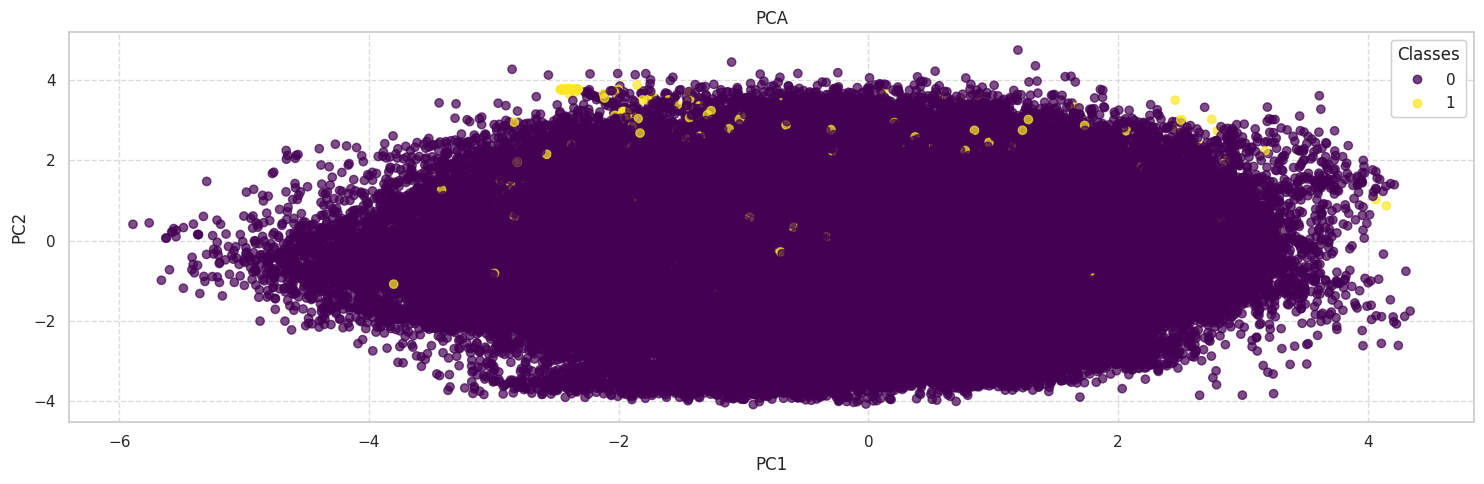

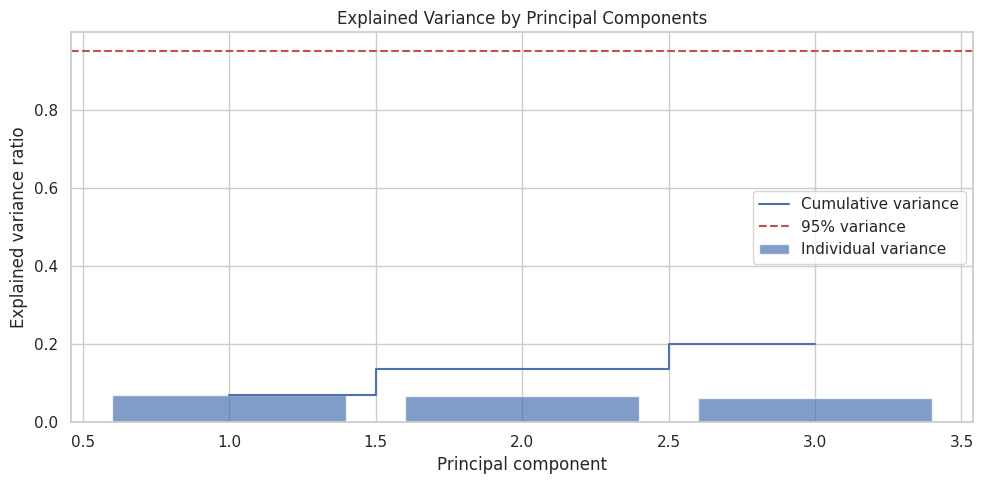

In [ ]:
def apply_dimensionality_reduction(X, y=None, n_components=2):
    """Menerapkan teknik dimensionality reduction

    Parameters:
    X (DataFrame): Data fitur
    y (Series, optional): Label target untuk visualisasi
    n_components (int): Jumlah komponen untuk reduksi dimensi

    Returns:
    dict: Dictionary berisi hasil reduksi dimensi
    """
    # Memastikan semua fitur numerik
    X_numeric = X.select_dtypes(include=['int64', 'float64'])

    if X_numeric.shape[1] < n_components:
        print(f"Jumlah fitur numerik ({X_numeric.shape[1]}) kurang dari n_components ({n_components}).")
        return {}

    results = {}

    # 1. PCA
    pca = PCA(n_components=n_components, random_state=42)
    pca_result = pca.fit_transform(X_numeric)

    pca_df = pd.DataFrame(
        data=pca_result,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=X.index
    )

    # Menambahkan variance explained
    variance_explained = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_explained)

    results['PCA'] = {
        'data': pca_df,
        'variance_explained': variance_explained,
        'cumulative_variance': cumulative_variance,
        'components': pca.components_
    }

    # 2. t-SNE (jika data tidak terlalu besar)
    if X_numeric.shape[0] <= 5000:  # t-SNE lambat untuk dataset besar
        try:
            tsne = TSNE(n_components=n_components, random_state=42, perplexity=min(30, X_numeric.shape[0]-1))
            tsne_result = tsne.fit_transform(X_numeric)

            tsne_df = pd.DataFrame(
                data=tsne_result,
                columns=[f'tSNE{i+1}' for i in range(n_components)],
                index=X.index
            )

            results['t-SNE'] = {
                'data': tsne_df
            }
        except Exception as e:
            print(f"Error pada t-SNE: {e}")
    else:
        print(f"Data terlalu besar untuk t-SNE ({X_numeric.shape[0]} sampel). Melewati t-SNE.")

    # Visualisasi hasil reduksi dimensi
    if y is not None:
        fig, axes = plt.subplots(1, len(results), figsize=(15, 5))

        for i, (name, result) in enumerate(results.items()):
            ax = axes[i] if len(results) > 1 else axes

            data = result['data']
            scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y, cmap='viridis', alpha=0.7)
            ax.set_title(f'{name}')
            ax.set_xlabel(data.columns[0])
            ax.set_ylabel(data.columns[1])
            ax.grid(True, linestyle='--', alpha=0.7)

            # Tambahkan legend untuk kelas
            legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
            ax.add_artist(legend1)

        plt.tight_layout()
        plt.show()

        # Visualisasi variance explained oleh PCA
        if 'PCA' in results:
            plt.figure(figsize=(10, 5))
            plt.bar(
                range(1, n_components + 1),
                results['PCA']['variance_explained'],
                alpha=0.7,
                align='center',
                label='Individual variance'
            )
            plt.step(
                range(1, n_components + 1),
                results['PCA']['cumulative_variance'],
                where='mid',
                label='Cumulative variance'
            )
            plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component')
            plt.title('Explained Variance by Principal Components')
            plt.legend(loc='best')
            plt.tight_layout()
            plt.show()

            # Visualisasi loading factors (komponen PCA)
            if X_numeric.shape[1] <= 20:  # Batasi visualisasi jika terlalu banyak fitur
                plt.figure(figsize=(12, 8))
                components = results['PCA']['components']
                feature_names = X_numeric.columns

                for i in range(min(n_components, 3)):  # Visualisasikan maksimal 3 komponen
                    plt.subplot(1, min(n_components, 3), i + 1)
                    plt.barh(range(len(feature_names)), components[i])
                    plt.yticks(range(len(feature_names)), feature_names)
                    plt.title(f'PC{i+1} Loading Factors')
                    plt.tight_layout()

                plt.tight_layout()
                plt.show()

    return results

# Menerapkan dimensionality reduction
# Gunakan data dengan encoding dan scaling standar
if 'Label Encoding' in categorical_encodings and 'StandardScaler' in numeric_transformations:
    # Jika ada fitur kategorikal, gunakan encoded data
    X_prepared = categorical_encodings['Label Encoding'].copy()

    # Terapkan scaling pada kolom numerik
    numeric_cols = X_prepared.select_dtypes(include=['int64', 'float64']).columns
    X_prepared[numeric_cols] = numeric_transformations['StandardScaler']
elif 'StandardScaler' in numeric_transformations:
    # Jika hanya ada fitur numerik
    X_prepared = numeric_transformations['StandardScaler'].copy()
else:
    # Gunakan data asli jika tidak ada transformasi
    X_prepared = X_fe.copy()

# Pilih n_components berdasarkan jumlah fitur
n_components = min(3, X_prepared.shape[1])

# Terapkan dimensionality reduction
dim_reduction_results = apply_dimensionality_reduction(X_prepared, y, n_components=n_components)

**Penjelasan Matematis - Dimensionality Reduction**

1. **Principal Component Analysis (PCA)**

   PCA adalah teknik reduksi dimensi linier yang mengidentifikasi komponen ortogonal yang menangkap varians maksimum dalam data. Ide utama PCA adalah mentransformasi fitur asli ke set fitur baru (principal components) yang tidak berkorelasi dan diurutkan berdasarkan varians yang dijelaskan.

   Secara matematis, PCA mencari transformasi linier yang memaksimalkan varians proyeksi data. Jika $X$ adalah matriks data dengan $n$ sampel dan $p$ fitur, langkah-langkah PCA adalah:

   a. **Standardisasi data**: Mengurangkan mean dan membagi dengan standar deviasi untuk setiap fitur.
      $$X' = \frac{X - \mu}{\sigma}$$

   b. **Hitung matriks kovarians**:
      $$C = \frac{1}{n-1} X'^T X'$$

   c. **Dekomposisi eigen**: Dekomposisi matriks kovarians menjadi eigenvectors ($V$) dan eigenvalues ($\lambda$).
      $$CV = V\Lambda$$
      dimana $\Lambda$ adalah matriks diagonal dengan eigenvalues $\lambda_i$ pada diagonalnya.

   d. **Pilih top-$k$ eigenvectors**: Pilih $k$ eigenvectors yang berkorespondensi dengan $k$ eigenvalues terbesar untuk membentuk matriks proyeksi $W$.

   e. **Proyeksikan data**: Proyeksikan data ke ruang berdimensi lebih rendah.
      $$Y = X'W$$
      dimana $Y$ adalah data yang telah direduksi dimensinya.

   Proporsi varians yang dijelaskan oleh komponen ke-$i$ adalah:
   $$\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$$

   PCA optimal untuk preservasi varians global dan efisien secara komputasional, tetapi tidak mempertimbangkan struktur lokal data dan efektivitasnya terbatas pada hubungan linier.

2. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

   t-SNE adalah teknik reduksi dimensi non-linier yang fokus pada preservasi struktur lokal. Tidak seperti PCA yang memaksimalkan varians global, t-SNE mencoba mempertahankan hubungan "ketetanggaan" antara titik data.

   Secara matematis, t-SNE bekerja sebagai berikut:

   a. **Hitung probabilitas ketetanggaan dalam ruang dimensi tinggi**: Untuk setiap pasang titik data $(x_i, x_j)$, hitung probabilitas bahwa $x_j$ adalah tetangga $x_i$ menggunakan distribusi Gaussian dengan bandwidth adaptif.
      $$p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}$$
      dimana $\sigma_i$ dipilih sehingga "perplexity" (ukuran jumlah tetangga efektif) adalah konstan.

   b. **Simetrisasi probabilitas**:
      $$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$$

   c. **Hitung probabilitas ketetanggaan dalam ruang dimensi rendah**: Untuk titik dalam ruang dimensi rendah $(y_i, y_j)$, hitung probabilitas ketetanggaan menggunakan distribusi t-Student.
      $$q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}$$

   d. **Minimisasi KL divergence**: Cari koordinat $y_i$ yang meminimalkan KL divergence antara distribusi $P$ dan $Q$.
      $$KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

   t-SNE sangat efektif untuk visualisasi data berdimensi tinggi dan dapat menangkap struktur lokal dan global, tetapi komputasional intensif, non-deterministik, dan tidak cocok untuk reduksi dimensi ke dimensi > 3.

Kedua teknik ini memiliki use cases yang berbeda:
- PCA lebih cocok untuk reduksi dimensi umum, preprocessing, dan kompresi data
- t-SNE lebih cocok untuk visualisasi dan eksplorasi data berdimensi tinggi

### 5.6 Pemilihan dan Persiapan Fitur Akhir

Setelah melakukan berbagai transformasi dan feature engineering, kita perlu memilih set fitur final yang akan digunakan untuk training model. Kita akan menggabungkan hasil dari berbagai teknik feature engineering.

In [ ]:
def prepare_final_features(X, y, numeric_transformations, categorical_encodings, interaction_features=None, dim_reduction_results=None):
    """Menyiapkan set fitur final untuk training model

    Parameters:
    X (DataFrame): Data fitur asli
    y (Series): Label target
    numeric_transformations (dict): Hasil transformasi numerik
    categorical_encodings (dict): Hasil encoding kategorikal
    interaction_features (DataFrame, optional): Data dengan interaction features
    dim_reduction_results (dict, optional): Hasil reduksi dimensi

    Returns:
    dict: Dictionary berisi set fitur final untuk berbagai konfigurasi
    """
    final_features = {}

    # 1. Data dengan MinMaxScaler dan Label Encoding - pendekatan standar dan konservatif
    if 'MinMaxScaler' in numeric_transformations and 'Label Encoding' in categorical_encodings:
        X_standard = categorical_encodings['Label Encoding'].copy()
        numeric_cols = X_standard.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if col in numeric_transformations['MinMaxScaler'].columns:
                X_standard[col] = numeric_transformations['MinMaxScaler'][col]
        final_features['Standard (MinMax + Label)'] = X_standard

    # 2. Data dengan StandardScaler dan One-Hot Encoding - pendekatan standar untuk model linier
    if 'StandardScaler' in numeric_transformations and 'One-Hot Encoding' in categorical_encodings:
        X_linear = categorical_encodings['One-Hot Encoding'].copy()
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if col in numeric_transformations['StandardScaler'].columns:
                mask = X_linear.columns.str.startswith(col + '_')
                if not any(mask) and col in X_linear.columns:
                    X_linear[col] = numeric_transformations['StandardScaler'][col]
        final_features['Linear (Standard + OneHot)'] = X_linear

    # 3. Data dengan RobustScaler dan Label Encoding - pendekatan robust terhadap outlier
    if 'RobustScaler' in numeric_transformations and 'Label Encoding' in categorical_encodings:
        X_robust = categorical_encodings['Label Encoding'].copy()
        numeric_cols = X_robust.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if col in numeric_transformations['RobustScaler'].columns:
                X_robust[col] = numeric_transformations['RobustScaler'][col]
        final_features['Robust (Robust + Label)'] = X_robust

    # 4. Data dengan PowerTransformer dan One-Hot Encoding - pendekatan untuk data tidak normal
    if 'PowerTransformer (Yeo-Johnson)' in numeric_transformations and 'One-Hot Encoding' in categorical_encodings:
        X_power = categorical_encodings['One-Hot Encoding'].copy()
        numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if col in numeric_transformations['PowerTransformer (Yeo-Johnson)'].columns:
                mask = X_power.columns.str.startswith(col + '_')
                if not any(mask) and col in X_power.columns:
                    X_power[col] = numeric_transformations['PowerTransformer (Yeo-Johnson)'][col]
        final_features['Power (Power + OneHot)'] = X_power

    # 5. Data dengan interaction features - untuk model yang dapat menangkap hubungan kompleks
    if interaction_features is not None:
        if 'StandardScaler' in numeric_transformations:
            # Gunakan interaction features dengan StandardScaler
            final_features['Interactions'] = interaction_features

    # 6. Data dengan PCA - untuk reduksi dimensi dan menangani multikolinearitas
    if dim_reduction_results is not None and 'PCA' in dim_reduction_results:
        # Ambil komponen yang menjelaskan 95% varians
        cumulative_variance = dim_reduction_results['PCA']['cumulative_variance']
        n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1 if any(cumulative_variance >= 0.95) else len(cumulative_variance)

        # Lakukan PCA ulang dengan jumlah komponen yang sesuai
        if 'StandardScaler' in numeric_transformations:
            X_numeric = numeric_transformations['StandardScaler']
            if n_components_95 < X_numeric.shape[1]:
                pca = PCA(n_components=n_components_95, random_state=42)
                pca_result = pca.fit_transform(X_numeric)

                pca_df = pd.DataFrame(
                    data=pca_result,
                    columns=[f'PC{i+1}' for i in range(n_components_95)],
                    index=X.index
                )

                # Tambahkan fitur kategorikal jika ada
                if 'Label Encoding' in categorical_encodings:
                    categorical_cols = categorical_encodings['Label Encoding'].select_dtypes(include=['object']).columns
                    if len(categorical_cols) > 0:
                        pca_df = pd.concat([pca_df, categorical_encodings['Label Encoding'][categorical_cols]], axis=1)

                final_features['PCA'] = pca_df
                print(f"Data PCA: {n_components_95} komponen, menjelaskan {cumulative_variance[n_components_95-1]*100:.2f}% varians")

    # 7. Seleksi fitur akhir berdasarkan SelectKBest dengan mutual information
    try:
        # Pilih label encoding jika ada, jika tidak gunakan data original
        X_for_selection = categorical_encodings.get('Label Encoding', X)

        # Pilih top 10 atau 50% fitur, mana yang lebih besar
        k = max(10, int(X_for_selection.shape[1] * 0.5))
        k = min(k, X_for_selection.shape[1])  # Pastikan k tidak lebih besar dari jumlah fitur

        selector = SelectKBest(f_classif, k=k)
        X_selected = selector.fit_transform(X_for_selection, y)
        selected_features = X_for_selection.columns[selector.get_support()]

        X_kbest = X_for_selection[selected_features]
        final_features['SelectKBest'] = X_kbest
        print(f"SelectKBest: {k} fitur terpilih dari {X_for_selection.shape[1]} fitur")
    except Exception as e:
        print(f"Error pada SelectKBest: {e}")

    # Menampilkan ukuran setiap set fitur final
    print("\nUkuran setiap set fitur final:")
    for name, features in final_features.items():
        print(f"{name}: {features.shape}")

    return final_features

# Menyiapkan set fitur final
final_feature_sets = prepare_final_features(
    X_fe,
    y,
    numeric_transformations,
    categorical_encodings,
    X_with_interactions,
    dim_reduction_results
)

Data PCA: 3 komponen, menjelaskan 19.91% varians
SelectKBest: 15 fitur terpilih dari 30 fitur

Ukuran setiap set fitur final:
Interactions: (283726, 102)
PCA: (283726, 3)
SelectKBest: (283726, 15)


## Kesimpulan Feature Engineering

Dalam proses feature engineering, kita telah menerapkan berbagai teknik untuk meningkatkan kualitas fitur dan memaksimalkan informasi yang tersedia untuk model machine learning:

1. **Transformasi Data Numerik**: Kita menerapkan berbagai teknik scaling dan normalisasi untuk mengatasi perbedaan skala dan distribusi data, termasuk StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, dan QuantileTransformer.

2. **Encoding Data Kategorikal**: Kita mengkonversi fitur kategorikal menjadi representasi numerik menggunakan Label Encoding dan One-Hot Encoding, yang memungkinkan model untuk memproses fitur tersebut.

3. **Feature Creation dan Interaction Features**: Kita membuat fitur baru melalui operasi matematika antar fitur yang ada untuk menangkap hubungan non-linier yang mungkin tidak terlihat oleh model.

4. **Dimensionality Reduction**: Kita menerapkan PCA dan t-SNE untuk mengurangi dimensionalitas data, mengidentifikasi komponen utama, dan memvisualisasikan data dalam ruang dimensi yang lebih rendah.

5. **Pemilihan Set Fitur Final**: Kita menyiapkan beberapa set fitur dengan kombinasi teknik yang berbeda, yang dapat digunakan untuk training dan evaluasi model.

Pemilihan teknik feature engineering yang tepat bergantung pada karakteristik data dan model yang digunakan. Set fitur final yang kita siapkan mencakup berbagai pendekatan, dari yang sederhana dan konservatif hingga yang lebih kompleks dan powerful.

Langkah selanjutnya adalah menggunakan set fitur ini untuk melatih dan mengevaluasi berbagai model klasifikasi.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 6. Implementasi Model Klasifikasi

Setelah menyelesaikan eksplorasi data, pembersihan data, feature selection, dan feature engineering, kita siap untuk melatih dan mengevaluasi berbagai model klasifikasi. Kita akan mengimplementasikan model-model berikut sesuai permintaan:

1. **Logistic Regression**: Model klasifikasi linier yang memprediksi probabilitas kelas
2. **Decision Tree**: Model non-parametrik berbasis rule dengan struktur tree
3. **K-Nearest Neighbors (KNN)**: Klasifikator berbasis jarak yang memprediksi berdasarkan tetangga terdekat
4. **Bagging/Boosting**: Ensemble method seperti Random Forest dan Gradient Boosting
5. **Support Vector Machine (SVM)**: Model yang mencari hyperplane optimal yang memisahkan kelas

Kita juga akan menerapkan cross-validation untuk mengevaluasi performa model dengan lebih handal.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Memastikan kita memiliki data yang sudah dipersiapkan
try:
    print(f"Set fitur yang tersedia: {list(final_feature_sets.keys())}")
except NameError:
    # Jika final_feature_sets tidak tersedia, load dataset dan lakukan preprocessing minimal
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Label encoding untuk target jika diperlukan
    if y.dtype == 'O':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Minimal scaling untuk dataset
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Membuat dictionary sederhana untuk final_feature_sets
    final_feature_sets = {'Standard': X_scaled}

    print(f"Dataset dimuat ulang dan preprocessing minimal dilakukan: X shape {X.shape}, y shape {y.shape}")

Set fitur yang tersedia: ['Interactions', 'PCA', 'SelectKBest']


### 6.1 Pemisahan Data Training dan Testing

Langkah pertama dalam proses modeling adalah memisahkan data menjadi set training dan testing. Set training digunakan untuk melatih model, sedangkan set testing digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat.

In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    """Memisahkan data menjadi set training dan testing

    Parameters:
    X (DataFrame): Data fitur
    y (Series): Label target
    test_size (float): Proporsi data yang digunakan untuk testing
    random_state (int): Seed untuk reproducibility

    Returns:
    tuple: (X_train, X_test, y_train, y_test)
    """
    # Memastikan y memiliki tipe data yang sesuai
    if y.dtype == 'O':
        le = LabelEncoder()
        y = le.fit_transform(y)
        print(f"Target classes: {le.classes_}")
        print(f"Label encoding: {dict(zip(le.classes_, range(len(le.classes_))))}")

    # Split data dengan stratified sampling untuk memastikan distribusi kelas seimbang
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Data dibagi menjadi:")
    print(f"  Training set: {X_train.shape[0]} sampel ({100*(1-test_size):.0f}%)")
    print(f"  Testing set: {X_test.shape[0]} sampel ({100*test_size:.0f}%)")

    # Memeriksa distribusi kelas di training dan testing set
    train_class_dist = pd.Series(y_train).value_counts(normalize=True)
    test_class_dist = pd.Series(y_test).value_counts(normalize=True)

    print("\nDistribusi kelas:")
    class_dist = pd.DataFrame({
        'Training set (%)': train_class_dist * 100,
        'Testing set (%)': test_class_dist * 100
    })
    display(class_dist)

    return X_train, X_test, y_train, y_test

# Pilih salah satu set fitur untuk pemodelan awal
# Kita akan menggunakan set fitur yang paling sederhana dan standar untuk contoh ini
feature_set_name = list(final_feature_sets.keys())[0]
X_selected = final_feature_sets[feature_set_name]

print(f"Menggunakan set fitur '{feature_set_name}' dengan dimensi {X_selected.shape} untuk pemodelan awal")

# Memisahkan data
X_train, X_test, y_train, y_test = split_data(X_selected, y)

Menggunakan set fitur 'Interactions' dengan dimensi (283726, 102) untuk pemodelan awal
Data dibagi menjadi:
  Training set: 226980 sampel (80%)
  Testing set: 56746 sampel (20%)

Distribusi kelas:


,Training set (%),Testing set (%)
Class,,
0,99.833,99.833
1,0.167,0.167


**Penjelasan Matematis - Train-Test Split dan Stratified Sampling**

Pemisahan data menjadi set training dan testing adalah praktik standar dalam machine learning untuk mengevaluasi generalisasi model pada data yang belum pernah dilihat sebelumnya.

**Train-Test Split** secara matematis dapat dilihat sebagai partisi dari himpunan data $D$ dengan $n$ sampel menjadi dua himpunan disjoint: $D_{train}$ dengan $n_{train} = n \times (1 - test\_size)$ sampel dan $D_{test}$ dengan $n_{test} = n \times test\_size$ sampel, dimana:

$$D = D_{train} \cup D_{test}$$
$$D_{train} \cap D_{test} = \emptyset$$

**Stratified Sampling** memastikan bahwa proporsi kelas dalam subset training dan testing sama dengan proporsi dalam dataset asli. Jika dataset asli memiliki proporsi kelas $p_1, p_2, ..., p_k$ untuk $k$ kelas, maka stratified sampling akan memastikan bahwa:

$$P(y = c | x \in D_{train}) = P(y = c | x \in D_{test}) = P(y = c | x \in D) = p_c$$

untuk setiap kelas $c \in \{1, 2, ..., k\}$.

Stratified sampling penting terutama untuk dataset dengan distribusi kelas tidak seimbang, karena menjamin bahwa kelas minoritas tetap terwakili baik di set training maupun testing. Ini mencegah skenario di mana kelas minoritas mungkin tidak ada atau sangat sedikit di salah satu subset, yang dapat menyebabkan bias dalam pelatihan atau evaluasi model.

### 6.2 Implementasi Fungsi Training dan Evaluasi Model

Untuk mempermudah proses training dan evaluasi berbagai model, kita akan membuat fungsi umum yang dapat digunakan untuk semua model.

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=5, model_name=None):
    """Melatih dan mengevaluasi model klasifikasi

    Parameters:
    model: Model scikit-learn yang akan dilatih
    X_train (DataFrame): Fitur training set
    X_test (DataFrame): Fitur testing set
    y_train (Series): Label training set
    y_test (Series): Label testing set
    cv (int): Jumlah fold untuk cross-validation
    model_name (str): Nama model untuk output

    Returns:
    dict: Dictionary berisi berbagai metrik evaluasi
    """
    if model_name is None:
        model_name = model.__class__.__name__

    # Latih model
    model.fit(X_train, y_train)

    # Prediksi pada data testing
    y_pred = model.predict(X_test)

    # Hitung probabilitas untuk ROC curve (jika model mendukung)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        # Jika multi-class, kita perlu memilih kelas atau menggunakan OvR/OvO
        if y_prob.shape[1] > 2:
            # Menggunakan probabilitas untuk kelas positif tertentu (misalnya kelas 1)
            y_prob_positive = y_prob[:, 1]
        else:
            y_prob_positive = y_prob[:, 1]
    else:
        # Untuk model seperti SVC tanpa probability=True
        y_prob_positive = None

    # Evaluasi performa
    accuracy = accuracy_score(y_test, y_pred)

    # Untuk multi-class, gunakan average='weighted' atau 'macro'
    if len(np.unique(y)) > 2:
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
    else:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC AUC (jika memungkinkan)
    if y_prob_positive is not None and len(np.unique(y)) == 2:
        try:
            roc_auc = roc_auc_score(y_test, y_prob_positive)
            fpr, tpr, _ = roc_curve(y_test, y_prob_positive)
        except Exception as e:
            print(f"Error saat menghitung ROC AUC: {e}")
            roc_auc = None
            fpr, tpr = None, None
    else:
        roc_auc = None
        fpr, tpr = None, None

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Kumpulkan hasil
    results = {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'cv_scores': cv_scores,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores),
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'classification_report': report
    }

    # Menampilkan hasil
    print(f"Hasil evaluasi untuk {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    if roc_auc is not None:
        print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Cross-validation (accuracy): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

    # Visualisasi confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Visualisasi ROC curve (jika binary classification)
    if fpr is not None and tpr is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return results

**Penjelasan Matematis - Metrik Evaluasi Model Klasifikasi**

Dalam klasifikasi, beberapa metrik umum digunakan untuk mengevaluasi performa model:

1. **Accuracy** adalah proporsi prediksi yang benar dari total prediksi:
   $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
   dimana TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative.
   
   Accuracy mudah diinterpretasikan, namun bisa menyesatkan untuk dataset tidak seimbang.

2. **Precision** adalah proporsi prediksi positif yang benar:
   $$\text{Precision} = \frac{TP}{TP + FP}$$
   
   Precision tinggi berarti rendahnya false positive, penting ketika cost dari false positive tinggi.

3. **Recall** (Sensitivity) adalah proporsi kasus positif aktual yang diprediksi dengan benar:
   $$\text{Recall} = \frac{TP}{TP + FN}$$
   
   Recall tinggi berarti rendahnya false negative, penting ketika cost dari false negative tinggi.

4. **F1-score** adalah rata-rata harmonis dari precision dan recall:
   $$\text{F1} = \frac{2 \times Precision \times Recall}{Precision + Recall} = \frac{2TP}{2TP + FP + FN}$$
   
   F1-score menyeimbangkan precision dan recall, berguna untuk dataset tidak seimbang.

5. **Confusion Matrix** adalah tabel kontingensi yang menunjukkan jumlah TP, TN, FP, dan FN:
   
   |                    | Predicted Positive | Predicted Negative |
   |--------------------|-------------------|--------------------|
   | **Actual Positive** | TP                | FN                 |
   | **Actual Negative** | FP                | TN                 |
   
   Confusion matrix memberikan gambaran lengkap performa model.

6. **ROC Curve** (Receiver Operating Characteristic) menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai threshold:
   $$TPR = \frac{TP}{TP + FN}$$
   $$FPR = \frac{FP}{FP + TN}$$
   
   ROC curve menunjukkan kemampuan model dalam membedakan kelas pada berbagai threshold.

7. **AUC** (Area Under the ROC Curve) adalah probabilitas bahwa model akan me-ranking sampel positif acak lebih tinggi daripada sampel negatif acak:
   $$AUC = P(score(x_{+}) > score(x_{-}))$$
   dimana $x_{+}$ adalah sampel positif acak dan $x_{-}$ adalah sampel negatif acak.
   
   AUC = 0.5 berarti model tidak lebih baik dari random guessing, AUC = 1.0 berarti model sempurna.

8. **Cross-validation** adalah teknik untuk mengevaluasi generalisasi model dengan membagi data menjadi k subset (folds):
   - Model dilatih pada k-1 folds dan dievaluasi pada fold sisanya
   - Proses diulang k kali dengan fold yang berbeda sebagai validation set
   - Performa akhir adalah rata-rata dari k evaluasi
   
   Cross-validation memberikan estimasi performa yang lebih handal, mengurangi risiko overfitting pada data test.

Kombinasi dari metrik-metrik ini memberikan pemahaman komprehensif tentang performa model klasifikasi.

### 6.3 Implementasi Logistic Regression

Logistic Regression adalah model klasifikasi linier yang memprediksi probabilitas suatu sampel termasuk dalam kelas tertentu. Meskipun namanya mengandung kata "regression", Logistic Regression sebenarnya adalah model klasifikasi.


=== Logistic Regression ===
Hasil evaluasi untuk Logistic Regression:
  Accuracy: 0.9987
  Precision: 0.7000
  Recall: 0.3684
  F1-score: 0.4828
  ROC AUC: 0.7949
  Cross-validation (accuracy): 0.9986 ± 0.0003


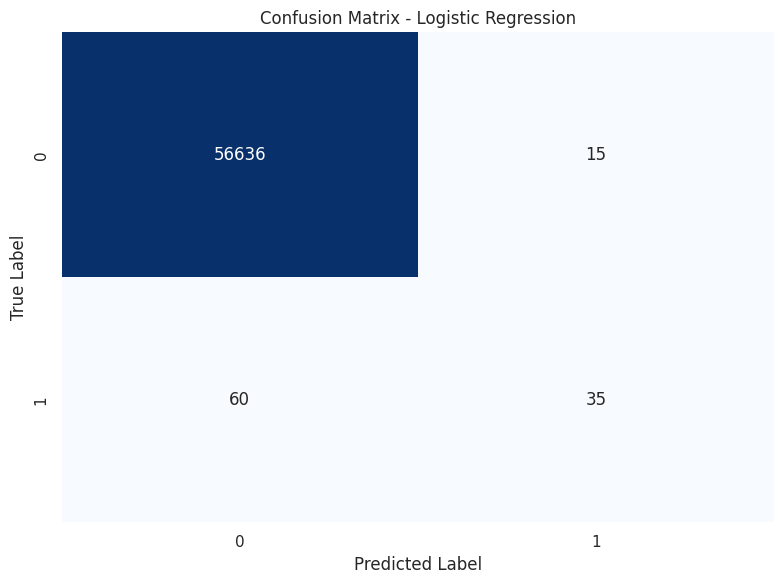

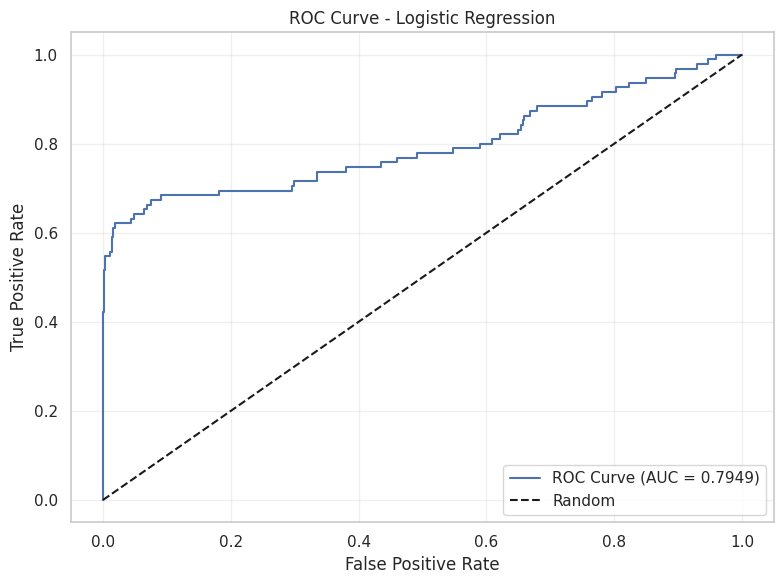

In [ ]:
def train_logistic_regression(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model Logistic Regression

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    dict: Hasil evaluasi model
    """
    print("\n=== Logistic Regression ===")

    if perform_grid_search:
        # Grid search untuk hyperparameter tuning
        print("Melakukan Grid Search untuk hyperparameter tuning...")
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
            'penalty': ['l1', 'l2', 'elasticnet', None],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
            'max_iter': [100, 500, 1000]
        }

        # Filter kombinasi parameter yang valid
        valid_params = []
        for p in param_grid['penalty']:
            for s in param_grid['solver']:
                if p == 'l1' and s in ['newton-cg', 'sag']:
                    continue
                if p == 'elasticnet' and s != 'saga':
                    continue
                if p is None and s in ['liblinear']:
                    continue
                valid_params.append({'penalty': p, 'solver': s})

        best_score = -np.inf
        best_params = {}

        # Iterate through valid parameter combinations
        for params in valid_params:
            penalty = params['penalty']
            solver = params['solver']

            for C in param_grid['C']:
                for max_iter in param_grid['max_iter']:
                    try:
                        # Create and evaluate model
                        model = LogisticRegression(
                            C=C, penalty=penalty, solver=solver, max_iter=max_iter, random_state=42
                        )
                        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted')
                        mean_score = np.mean(cv_scores)

                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {
                                'C': C,
                                'penalty': penalty,
                                'solver': solver,
                                'max_iter': max_iter
                            }
                    except Exception as e:
                        # Skip invalid parameter combinations
                        continue

        print(f"Best parameters: {best_params}")
        print(f"Best CV score: {best_score:.4f}")

        # Create model with best parameters
        model = LogisticRegression(**best_params, random_state=42)
    else:
        # Default model
        model = LogisticRegression(random_state=42, max_iter=1000)

    # Train and evaluate
    results = train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=cv, model_name="Logistic Regression")

    # Interpretasi koefisien (untuk model biner)
    if len(np.unique(y)) == 2 and X_train.shape[1] <= 20:  # Batasi visualisasi jika terlalu banyak fitur
        coef = pd.DataFrame(
            model.coef_[0],
            index=X_train.columns,
            columns=['Coefficient']
        )
        coef = coef.sort_values('Coefficient', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Coefficient', y=coef.index, data=coef)
        plt.title('Feature Importance - Logistic Regression')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.tight_layout()
        plt.show()

        # Interpretasi odds ratio
        odds_ratio = pd.DataFrame(
            np.exp(model.coef_[0]),
            index=X_train.columns,
            columns=['Odds Ratio']
        )
        odds_ratio = odds_ratio.sort_values('Odds Ratio', ascending=False)

        print("\nTop 10 fitur berdasarkan odds ratio:")
        display(odds_ratio.head(10))

        print("\nBottom 10 fitur berdasarkan odds ratio:")
        display(odds_ratio.tail(10))

    return results

# Melatih dan mengevaluasi model Logistic Regression
lr_results = train_logistic_regression(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - Logistic Regression**

Logistic Regression adalah model klasifikasi yang memodelkan probabilitas kelas target menggunakan fungsi logistik (sigmoid). Untuk kasus biner (2 kelas), Logistic Regression memprediksi probabilitas sampel $x$ termasuk dalam kelas positif sebagai:

$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p)}} = \frac{1}{1 + e^{-\boldsymbol{\beta}^T \mathbf{x}}}$$

dimana $\boldsymbol{\beta} = (\beta_0, \beta_1, ..., \beta_p)$ adalah vektor koefisien yang diestimasi selama training, dan $\mathbf{x} = (1, x_1, x_2, ..., x_p)$ adalah vektor fitur dengan konstanta 1 untuk intercept.

Hubungan ini dapat diekspresikan dalam bentuk log-odds (logit):

$$\log\left(\frac{P(y=1|x)}{1 - P(y=1|x)}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p = \boldsymbol{\beta}^T \mathbf{x}$$

Model dilatih dengan memaksimalkan likelihood (atau meminimalkan negative log-likelihood) dari data training. Fungsi cost yang diminimalkan adalah:

$$J(\boldsymbol{\beta}) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(p_i) + (1-y_i) \log(1-p_i)] + \lambda R(\boldsymbol{\beta})$$

dimana $p_i = P(y_i=1|x_i)$, $\lambda$ adalah parameter regularisasi, dan $R(\boldsymbol{\beta})$ adalah term regularisasi yang bergantung pada jenis penalty.

Regularisasi dalam Logistic Regression dapat berupa:
- **L1 regularization (Lasso)**: $R(\boldsymbol{\beta}) = \sum_{j=1}^{p} |\beta_j|$, cenderung membuat model sparse dengan mengurangi beberapa koefisien menjadi nol
- **L2 regularization (Ridge)**: $R(\boldsymbol{\beta}) = \sum_{j=1}^{p} \beta_j^2$, cenderung menyusutkan koefisien mendekati nol tetapi tidak tepat nol
- **Elastic Net**: $R(\boldsymbol{\beta}) = \alpha \sum_{j=1}^{p} |\beta_j| + (1-\alpha) \sum_{j=1}^{p} \beta_j^2$, kombinasi dari L1 dan L2

Parameter $C$ adalah inverse dari $\lambda$, sehingga nilai $C$ yang lebih kecil berarti regularisasi yang lebih kuat.

Untuk kasus multi-class (>2 kelas), Logistic Regression diperluas menggunakan pendekatan One-vs-Rest (OvR) atau Multinomial. Dalam pendekatan multinomial, probabilitas kelas dihitung menggunakan softmax function:

$$P(y=k|x) = \frac{e^{\boldsymbol{\beta}_k^T \mathbf{x}}}{\sum_{j=1}^{K} e^{\boldsymbol{\beta}_j^T \mathbf{x}}}$$

dimana $K$ adalah jumlah kelas, dan $\boldsymbol{\beta}_k$ adalah vektor koefisien untuk kelas $k$.

Interpretasi koefisien Logistic Regression:
- Nilai absolut koefisien menunjukkan pentingnya fitur
- Tanda koefisien menunjukkan arah pengaruh (positif atau negatif)
- Odds ratio ($e^{\beta_j}$) menunjukkan perubahan relatif dalam odds ketika fitur $x_j$ meningkat satu unit, dengan asumsi fitur lain tetap konstan

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 7. Implementasi Model Klasifikasi (Lanjutan)

Melanjutkan implementasi model klasifikasi, kita akan mengimplementasikan model-model berikut:
1. Decision Tree
2. K-Nearest Neighbors (KNN)
3. Bagging dan Boosting
4. Support Vector Machine (SVM)

Kita akan melatih, mengevaluasi, dan menginterpretasikan masing-masing model.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Memastikan kita punya fungsi train_and_evaluate dari artifact sebelumnya
try:
    # Test apakah train_and_evaluate sudah didefinisikan
    train_and_evaluate
    print("Fungsi train_and_evaluate sudah tersedia.")
except NameError:
    # Jika belum, definisikan ulang fungsi tersebut
    def train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=5, model_name=None):
        """Melatih dan mengevaluasi model klasifikasi

        Parameters:
        model: Model scikit-learn yang akan dilatih
        X_train (DataFrame): Fitur training set
        X_test (DataFrame): Fitur testing set
        y_train (Series): Label training set
        y_test (Series): Label testing set
        cv (int): Jumlah fold untuk cross-validation
        model_name (str): Nama model untuk output

        Returns:
        dict: Dictionary berisi berbagai metrik evaluasi
        """
        if model_name is None:
            model_name = model.__class__.__name__

        # Latih model
        model.fit(X_train, y_train)

        # Prediksi pada data testing
        y_pred = model.predict(X_test)

        # Hitung probabilitas untuk ROC curve (jika model mendukung)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            # Jika multi-class, kita perlu memilih kelas atau menggunakan OvR/OvO
            if y_prob.shape[1] > 2:
                # Menggunakan probabilitas untuk kelas positif tertentu (misalnya kelas 1)
                y_prob_positive = y_prob[:, 1]
            else:
                y_prob_positive = y_prob[:, 1]
        else:
            # Untuk model seperti SVC tanpa probability=True
            y_prob_positive = None

        # Evaluasi performa
        accuracy = accuracy_score(y_test, y_pred)

        # Untuk multi-class, gunakan average='weighted' atau 'macro'
        if len(np.unique(y)) > 2:
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
        else:
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # ROC AUC (jika memungkinkan)
        if y_prob_positive is not None and len(np.unique(y)) == 2:
            try:
                roc_auc = roc_auc_score(y_test, y_prob_positive)
                fpr, tpr, _ = roc_curve(y_test, y_prob_positive)
            except Exception as e:
                print(f"Error saat menghitung ROC AUC: {e}")
                roc_auc = None
                fpr, tpr = None, None
        else:
            roc_auc = None
            fpr, tpr = None, None

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        # Classification report
        report = classification_report(y_test, y_pred, output_dict=True)

        # Kumpulkan hasil
        results = {
            'model_name': model_name,
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
            'cv_scores': cv_scores,
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores),
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr,
            'classification_report': report
        }

        # Menampilkan hasil
        print(f"Hasil evaluasi untuk {model_name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        if roc_auc is not None:
            print(f"  ROC AUC: {roc_auc:.4f}")
        print(f"  Cross-validation (accuracy): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

        # Visualisasi confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # Visualisasi ROC curve (jika binary classification)
        if fpr is not None and tpr is not None:
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Random')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name}')
            plt.legend(loc='lower right')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        return results

    print("Fungsi train_and_evaluate didefinisikan ulang.")

# Memastikan kita punya data
try:
    print(f"Data training yang tersedia: X_train shape {X_train.shape}, y_train shape {y_train.shape}")
except NameError:
    # Jika data belum tersedia, load dataset dan lakukan preprocessing minimal
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Label encoding untuk target jika diperlukan
    if y.dtype == 'O':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Menggunakan data yang sudah di-scale
    X_train = X_train_scaled
    X_test = X_test_scaled

    print(f"Dataset dimuat ulang: X_train shape {X_train.shape}, y_train shape {y_train.shape}")

Fungsi train_and_evaluate sudah tersedia.
Data training yang tersedia: X_train shape (226980, 102), y_train shape (226980,)


### 7.1 Implementasi Decision Tree

Decision Tree adalah model non-parametrik yang membuat keputusan berdasarkan sekumpulan aturan yang direpresentasikan dalam struktur tree. Setiap node internal mewakili keputusan berdasarkan fitur tertentu, sementara setiap leaf node mewakili label kelas.


=== Decision Tree ===
Hasil evaluasi untuk Decision Tree:
  Accuracy: 0.9992
  Precision: 0.7640
  Recall: 0.7158
  F1-score: 0.7391
  ROC AUC: 0.8577
  Cross-validation (accuracy): 0.9990 ± 0.0001


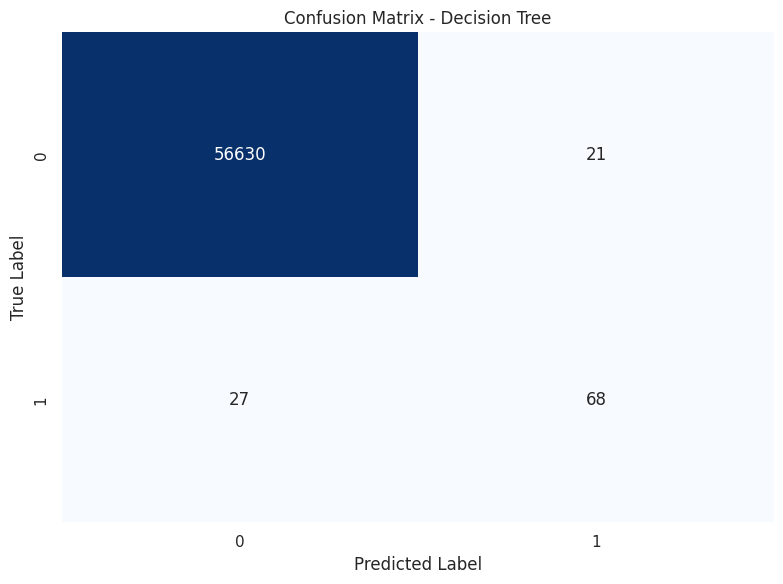

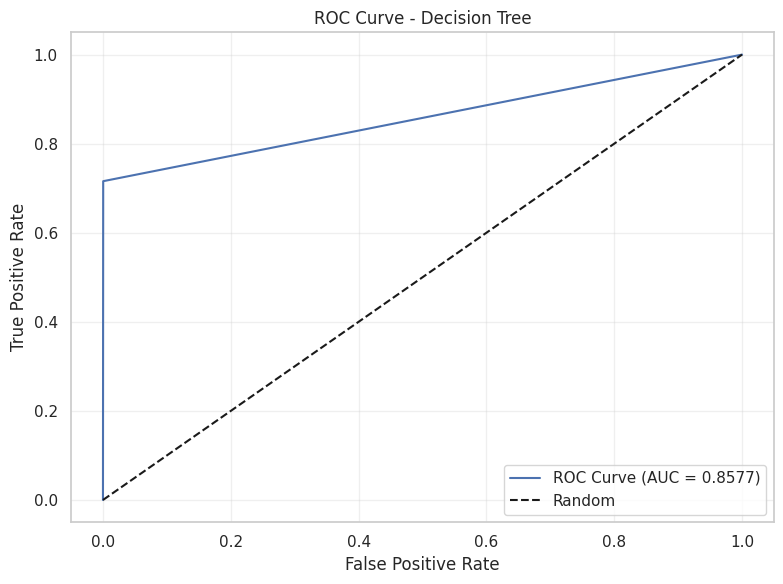


Decision tree terlalu besar untuk divisualisasikan (depth: 18, nodes: 307).


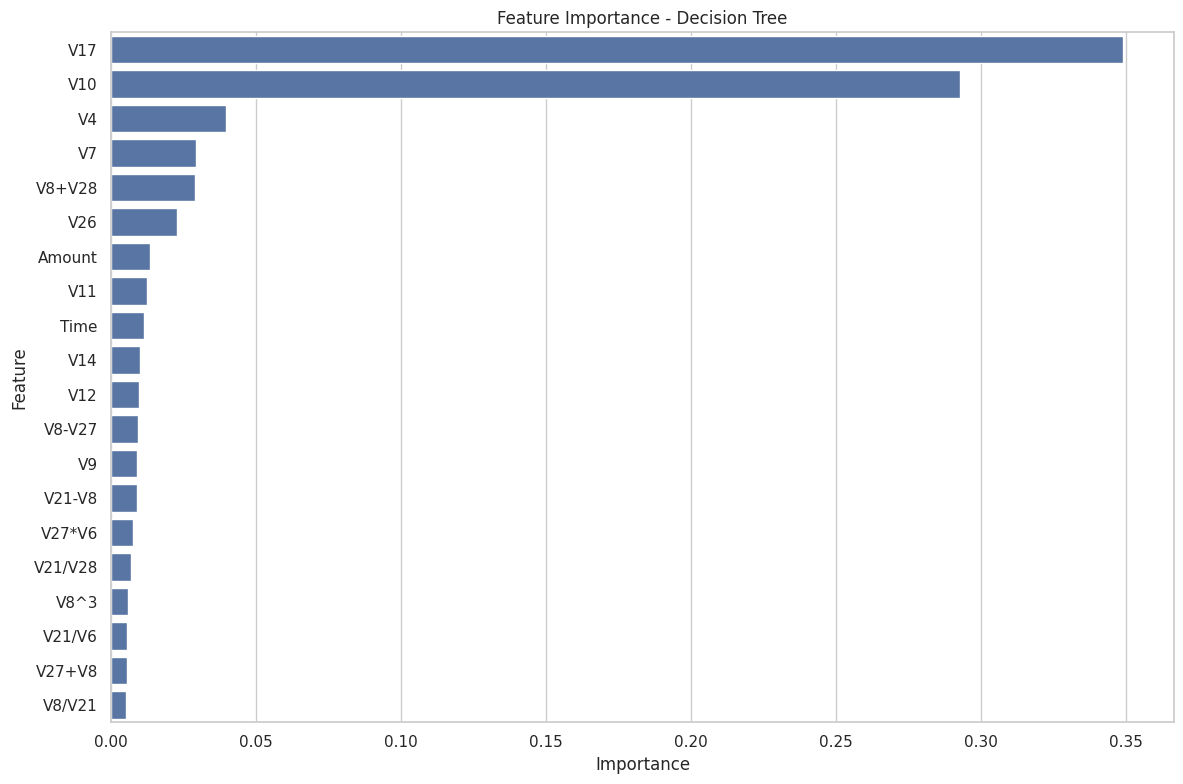


Top 10 fitur berdasarkan importance:


,Feature,Importance
17,V17,0.349
10,V10,0.293
4,V4,0.039
7,V7,0.029
57,V8+V28,0.029
26,V26,0.023
29,Amount,0.014
11,V11,0.012
0,Time,0.011
14,V14,0.010


In [ ]:
def train_decision_tree(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model Decision Tree

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    dict: Hasil evaluasi model
    """
    print("\n=== Decision Tree ===")

    if perform_grid_search:
        # Grid search untuk hyperparameter tuning
        print("Melakukan Grid Search untuk hyperparameter tuning...")
        param_grid = {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }

        grid_search = GridSearchCV(
            DecisionTreeClassifier(random_state=42),
            param_grid,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")

        # Create model with best parameters
        model = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
    else:
        # Default model
        model = DecisionTreeClassifier(random_state=42)

    # Train and evaluate
    results = train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=cv, model_name="Decision Tree")

    # Visualisasi tree (jika tree tidak terlalu besar)
    if model.get_depth() <= 5 or model.tree_.node_count <= 31:  # Batasi visualisasi jika tree terlalu besar
        plt.figure(figsize=(15, 10))
        plot_tree(model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in np.unique(y_train)], rounded=True, fontsize=10)
        plt.title('Decision Tree Visualization')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nDecision tree terlalu besar untuk divisualisasikan (depth: {model.get_depth()}, nodes: {model.tree_.node_count}).")

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Visualisasi feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Importance - Decision Tree')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # Menampilkan top 10 feature importance
    print("\nTop 10 fitur berdasarkan importance:")
    display(feature_importance.head(10))

    return results

# Melatih dan mengevaluasi model Decision Tree
dt_results = train_decision_tree(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - Decision Tree**

Decision Tree adalah model machine learning yang membuat keputusan melalui sekumpulan aturan berbentuk struktur tree. Model ini secara rekursif mempartisi ruang fitur untuk membuat prediksi yang optimal.

**1. Algoritma Pembelajaran**

Proses pembuatan decision tree melibatkan pemilihan fitur dan threshold yang optimal untuk memisahkan data pada setiap node. Kriteria pemilihan yang umum adalah:

a. **Gini Impurity**: Mengukur probabilitas kesalahan klasifikasi jika label dipilih secara acak dari distribusi kelas dalam node.
   $$Gini(t) = 1 - \sum_{i=1}^{c} p(i|t)^2$$
   dimana $p(i|t)$ adalah proporsi sampel yang termasuk dalam kelas $i$ pada node $t$.

b. **Entropy**: Mengukur ketidakpastian atau ketidakteraturan dalam distribusi kelas.
   $$Entropy(t) = -\sum_{i=1}^{c} p(i|t) \log_2 p(i|t)$$

Untuk setiap split potensial, algoritma menghitung penurunan dalam impurity atau entropy:

$$\Delta = I(parent) - \sum_{j \in \{left, right\}} \frac{N_j}{N} I(j)$$

dimana $I$ adalah impurity measure (Gini atau Entropy), $N$ adalah jumlah sampel pada parent node, dan $N_j$ adalah jumlah sampel pada child node.

Algoritma memilih split yang memaksimalkan penurunan impurity ini.

**2. Prediksi**

Untuk memprediksi kelas dari sampel baru, tree melakukan traversal dari root ke leaf node berdasarkan nilai fitur sampel. Kelas yang diprediksi adalah kelas mayoritas (atau kelas dengan probabilitas tertinggi) di leaf node tersebut.

**3. Regularisasi dan Pruning**

Untuk mencegah overfitting, decision tree dapat dibatasi dengan berbagai parameter regularisasi:

- `max_depth`: Membatasi kedalaman maksimum tree
- `min_samples_split`: Jumlah minimum sampel yang diperlukan untuk split internal node
- `min_samples_leaf`: Jumlah minimum sampel yang diperlukan di leaf node
- `max_features`: Jumlah maksimum fitur yang dipertimbangkan untuk split
- `min_impurity_decrease`: Minimum penurunan impurity yang diperlukan untuk split

**4. Feature Importance**

Decision tree memberikan ukuran kepentingan fitur (feature importance) berdasarkan seberapa banyak fitur tersebut berkontribusi pada penurunan impurity secara keseluruhan:

$$importance(f) = \sum_{t \in nodes\ where\ feature\ f\ is\ used} \frac{N_t}{N} \Delta I_t$$

dimana $N_t$ adalah jumlah sampel di node $t$, $N$ adalah jumlah total sampel, dan $\Delta I_t$ adalah penurunan impurity di node $t$.

**Kelebihan Decision Tree**:
- Mudah diinterpretasi dan divisualisasikan
- Dapat menangani fitur kategorikal dan numerik
- Tidak memerlukan scaling atau normalisasi fitur
- Dapat menangkap interaksi non-linier antar fitur

**Kelemahan Decision Tree**:
- Cenderung overfitting jika tidak dibatasi
- Tidak stabil (variasi kecil pada data dapat menghasilkan tree yang sangat berbeda)
- Bias terhadap fitur dengan banyak nilai unik
- Performa suboptimal untuk hubungan linier

### 7.2 Implementasi K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) adalah model berbasis jarak yang memprediksi kelas sampel baru berdasarkan mayoritas kelas dari K tetangga terdekatnya dalam ruang fitur.


=== K-Nearest Neighbors ===
Hasil evaluasi untuk K-Nearest Neighbors:
  Accuracy: 0.9990
  Precision: 0.9535
  Recall: 0.4316
  F1-score: 0.5942
  ROC AUC: 0.7891
  Cross-validation (accuracy): 0.9990 ± 0.0001


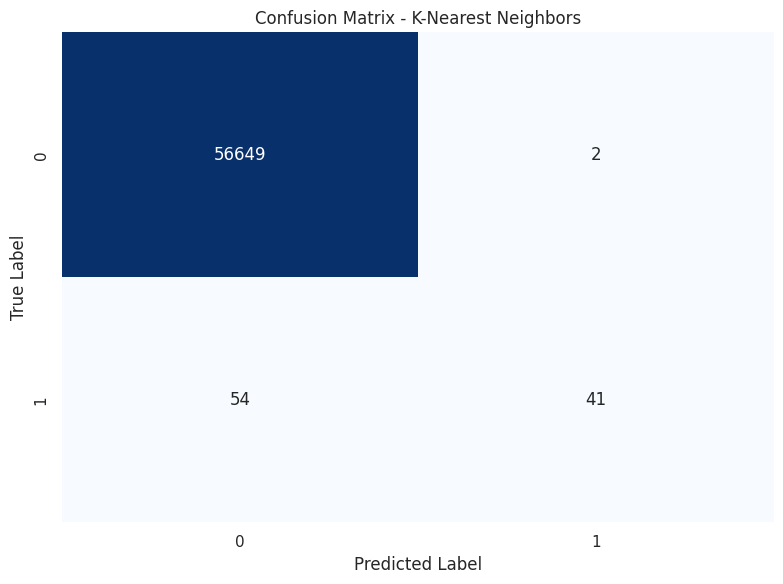

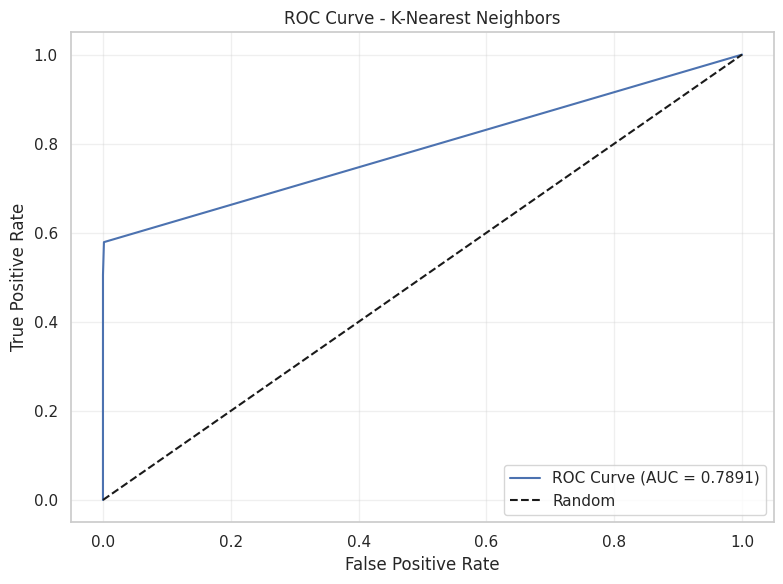

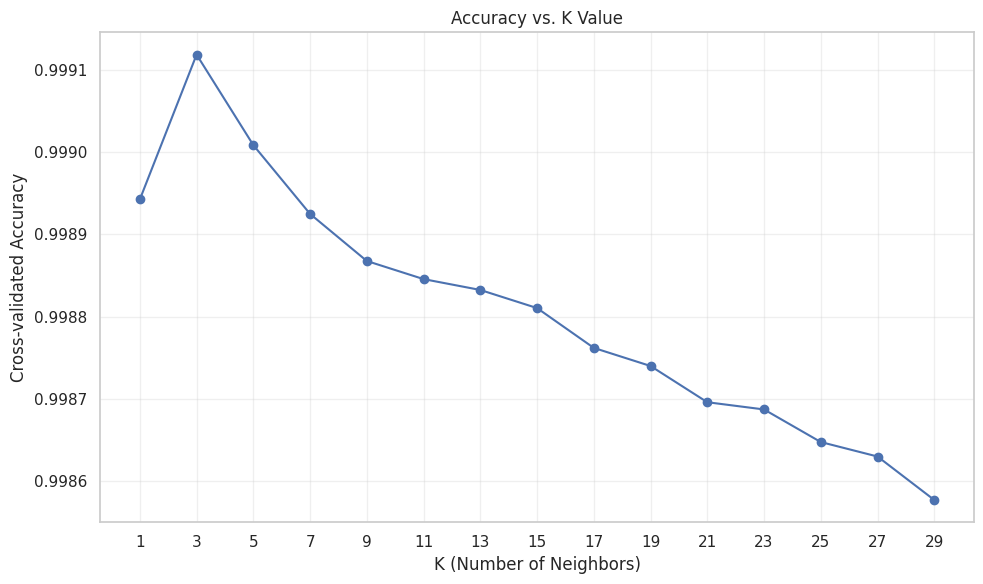


K optimal berdasarkan cross-validation: 3
Accuracy dengan K optimal: 0.9991


In [ ]:
def train_knn(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model K-Nearest Neighbors

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    dict: Hasil evaluasi model
    """
    print("\n=== K-Nearest Neighbors ===")

    if perform_grid_search:
        # Grid search untuk hyperparameter tuning
        print("Melakukan Grid Search untuk hyperparameter tuning...")

        # Determine optimal K
        k_range = list(range(1, min(31, len(X_train) // 10 + 1), 2))  # Odd values up to 30 or 10% of data
        param_grid = {
            'n_neighbors': k_range,
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }

        grid_search = GridSearchCV(
            KNeighborsClassifier(),
            param_grid,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")

        # Create model with best parameters
        model = KNeighborsClassifier(**grid_search.best_params_)
    else:
        # Default model
        model = KNeighborsClassifier(n_neighbors=5)

    # Train and evaluate
    results = train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=cv, model_name="K-Nearest Neighbors")

    # Visualisasi error rate vs K (jika tidak melakukan grid search)
    if not perform_grid_search:
        k_range = list(range(1, min(31, len(X_train) // 10 + 1), 2))  # Odd values up to 30 or 10% of data
        k_scores = []

        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
            k_scores.append(np.mean(scores))

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, k_scores, marker='o')
        plt.title('Accuracy vs. K Value')
        plt.xlabel('K (Number of Neighbors)')
        plt.ylabel('Cross-validated Accuracy')
        plt.xticks(k_range)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Identify optimal K
        optimal_k = k_range[np.argmax(k_scores)]
        print(f"\nK optimal berdasarkan cross-validation: {optimal_k}")
        print(f"Accuracy dengan K optimal: {max(k_scores):.4f}")

    return results

# Melatih dan mengevaluasi model KNN
knn_results = train_knn(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) adalah algoritma klasifikasi non-parametrik yang mengklasifikasikan sampel berdasarkan "voting" dari K tetangga terdekat dalam ruang fitur.

**1. Algoritma KNN**

Untuk sampel baru $x$, algoritma KNN melakukan langkah-langkah berikut:

a. Hitung jarak antara $x$ dan semua sampel dalam training set
b. Pilih K sampel terdekat (dengan jarak terkecil)
c. Prediksi kelas $x$ berdasarkan mayoritas kelas dari K tetangga terdekat

**2. Fungsi Jarak**

Beberapa fungsi jarak yang umum digunakan dalam KNN:

a. **Euclidean Distance** (L2 norm):
   $$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

b. **Manhattan Distance** (L1 norm):
   $$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

c. **Minkowski Distance** (Lp norm):
   $$d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$
   Minkowski distance dengan $p=1$ adalah Manhattan distance, dan dengan $p=2$ adalah Euclidean distance.

**3. Pembobotan**

Dalam KNN, terdapat dua metode pembobotan tetangga:

a. **Uniform**: Semua tetangga memiliki bobot yang sama
   $$w_i = 1/K$$

b. **Distance**: Tetangga diberi bobot berdasarkan jarak, semakin dekat tetangga, semakin besar bobotnya
   $$w_i = \frac{1}{d(x, x_i)^2}$$
   dimana $d(x, x_i)$ adalah jarak antara sampel $x$ dan tetangga $x_i$.

**4. Prediksi**

Untuk klasifikasi, prediksi kelas $\hat{y}$ untuk sampel $x$ adalah:

$$\hat{y} = \arg\max_j \sum_{i=1}^{K} w_i \cdot \mathbf{1}(y_i = j)$$

dimana $\mathbf{1}(y_i = j)$ adalah fungsi indikator yang bernilai 1 jika $y_i = j$ dan 0 jika sebaliknya.

**5. Pemilihan Nilai K**

Pemilihan nilai K memiliki dampak signifikan pada performa KNN:
- K kecil: Model lebih sensitif terhadap noise tetapi dapat menangkap pola lokal
- K besar: Model lebih stabil tetapi mungkin mengabaikan pola lokal

K biasanya dipilih sebagai bilangan ganjil untuk menghindari kebuntuan dalam voting (terutama untuk klasifikasi biner).

**Kelebihan KNN**:
- Sederhana dan mudah diimplementasikan
- Tidak memerlukan asumsi distribusi data
- Dapat menangkap boundary keputusan yang kompleks
- Baik untuk dataset dengan jumlah kelas banyak

**Kelemahan KNN**:
- Komputasional intensif untuk dataset besar
- Sensitif terhadap noise dan outlier
- Rentan terhadap "curse of dimensionality"
- Perlu normalisasi/scaling fitur karena berbasis jarak

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 8. Implementasi Model Ensemble dan SVM

Melanjutkan implementasi model klasifikasi, kita akan mengimplementasikan model-model ensemble (Bagging dan Boosting) serta Support Vector Machine (SVM).

Model ensemble adalah teknik yang menggabungkan beberapa model untuk meningkatkan performa klasifikasi, sedangkan SVM adalah model yang mencari hyperplane optimal untuk memisahkan kelas-kelas.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Memastikan kita memiliki data yang sudah dipersiapkan
try:
    print(f"Data training yang tersedia: X_train shape {X_train.shape}, y_train shape {y_train.shape}")
except NameError:
    # Jika data belum tersedia, load dataset dan lakukan preprocessing minimal
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/KlasifikasiUTS.csv'
    df = pd.read_csv(file_path)

    # Pembersihan data sederhana
    df = df.drop_duplicates()
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Memisahkan fitur dan target
    target_column = 'Class'
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Label encoding untuk target jika diperlukan
    if y.dtype == 'O':
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Menggunakan data yang sudah di-scale
    X_train = X_train_scaled
    X_test = X_test_scaled

    print(f"Dataset dimuat ulang: X_train shape {X_train.shape}, y_train shape {y_train.shape}")

# Memastikan train_and_evaluate tersedia
try:
    # Test apakah train_and_evaluate sudah didefinisikan
    train_and_evaluate
    print("Fungsi train_and_evaluate sudah tersedia.")
except NameError:
    # Jika belum, definisikan ulang fungsi tersebut
    def train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=5, model_name=None):
        """Melatih dan mengevaluasi model klasifikasi

        Parameters:
        model: Model scikit-learn yang akan dilatih
        X_train (DataFrame): Fitur training set
        X_test (DataFrame): Fitur testing set
        y_train (Series): Label training set
        y_test (Series): Label testing set
        cv (int): Jumlah fold untuk cross-validation
        model_name (str): Nama model untuk output

        Returns:
        dict: Dictionary berisi berbagai metrik evaluasi
        """
        if model_name is None:
            model_name = model.__class__.__name__

        # Latih model
        model.fit(X_train, y_train)

        # Prediksi pada data testing
        y_pred = model.predict(X_test)

        # Hitung probabilitas untuk ROC curve (jika model mendukung)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            # Jika multi-class, kita perlu memilih kelas atau menggunakan OvR/OvO
            if y_prob.shape[1] > 2:
                # Menggunakan probabilitas untuk kelas positif tertentu (misalnya kelas 1)
                y_prob_positive = y_prob[:, 1]
            else:
                y_prob_positive = y_prob[:, 1]
        else:
            # Untuk model seperti SVC tanpa probability=True
            y_prob_positive = None

        # Evaluasi performa
        accuracy = accuracy_score(y_test, y_pred)

        # Untuk multi-class, gunakan average='weighted' atau 'macro'
        if len(np.unique(y)) > 2:
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
        else:
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # ROC AUC (jika memungkinkan)
        if y_prob_positive is not None and len(np.unique(y)) == 2:
            try:
                roc_auc = roc_auc_score(y_test, y_prob_positive)
                fpr, tpr, _ = roc_curve(y_test, y_prob_positive)
            except Exception as e:
                print(f"Error saat menghitung ROC AUC: {e}")
                roc_auc = None
                fpr, tpr = None, None
        else:
            roc_auc = None
            fpr, tpr = None, None

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        # Classification report
        report = classification_report(y_test, y_pred, output_dict=True)

        # Kumpulkan hasil
        results = {
            'model_name': model_name,
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
            'cv_scores': cv_scores,
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores),
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr,
            'classification_report': report
        }

        # Menampilkan hasil
        print(f"Hasil evaluasi untuk {model_name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")
        if roc_auc is not None:
            print(f"  ROC AUC: {roc_auc:.4f}")
        print(f"  Cross-validation (accuracy): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

        # Visualisasi confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # Visualisasi ROC curve (jika binary classification)
        if fpr is not None and tpr is not None:
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--', label='Random')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {model_name}')
            plt.legend(loc='lower right')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        return results

    print("Fungsi train_and_evaluate didefinisikan ulang.")

Data training yang tersedia: X_train shape (226980, 102), y_train shape (226980,)
Fungsi train_and_evaluate sudah tersedia.


### 8.1 Implementasi Bagging (Random Forest)

Bagging (Bootstrap Aggregating) adalah metode ensemble yang melatih beberapa model (biasanya decision tree) pada subset data yang dibuat dengan sampling dengan pengembalian, kemudian menggabungkan prediksi mereka. Random Forest adalah implementasi bagging yang populer dengan tambahan pemilihan subset fitur acak.


=== Random Forest (Bagging) ===
Hasil evaluasi untuk Random Forest:
  Accuracy: 0.9995
  Precision: 0.9853
  Recall: 0.7053
  F1-score: 0.8221
  ROC AUC: 0.9238
  Cross-validation (accuracy): 0.9995 ± 0.0000


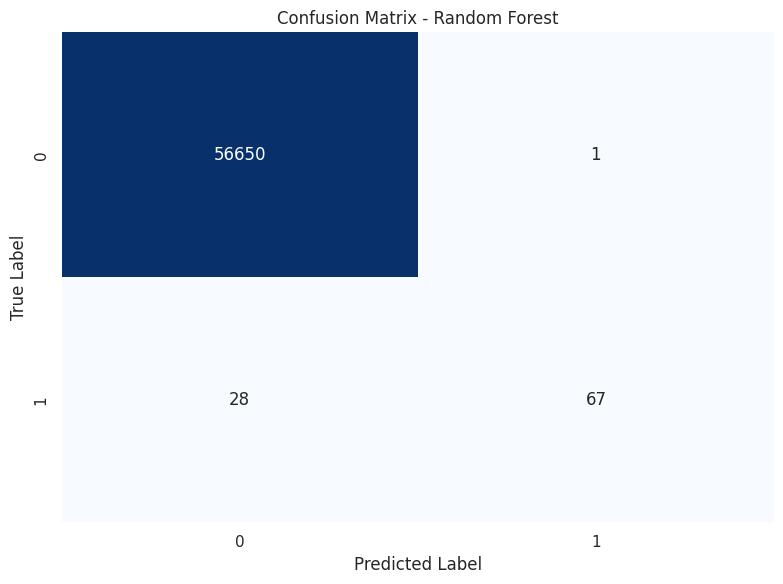

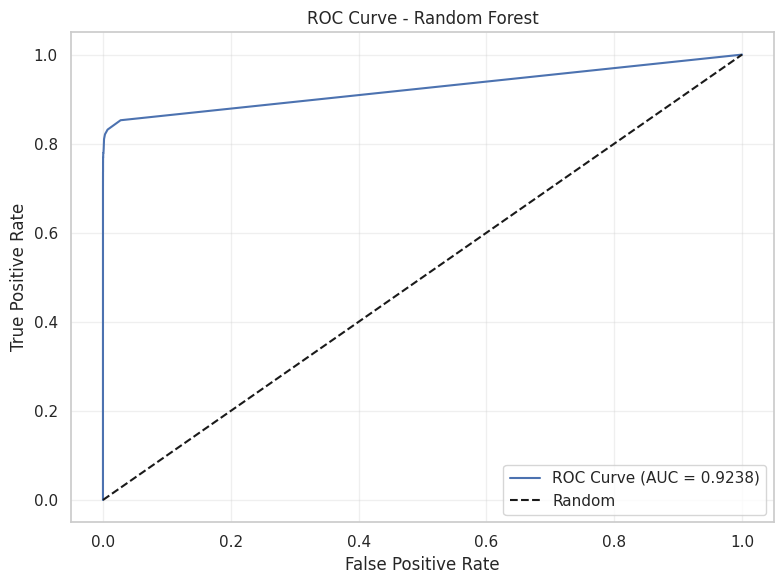

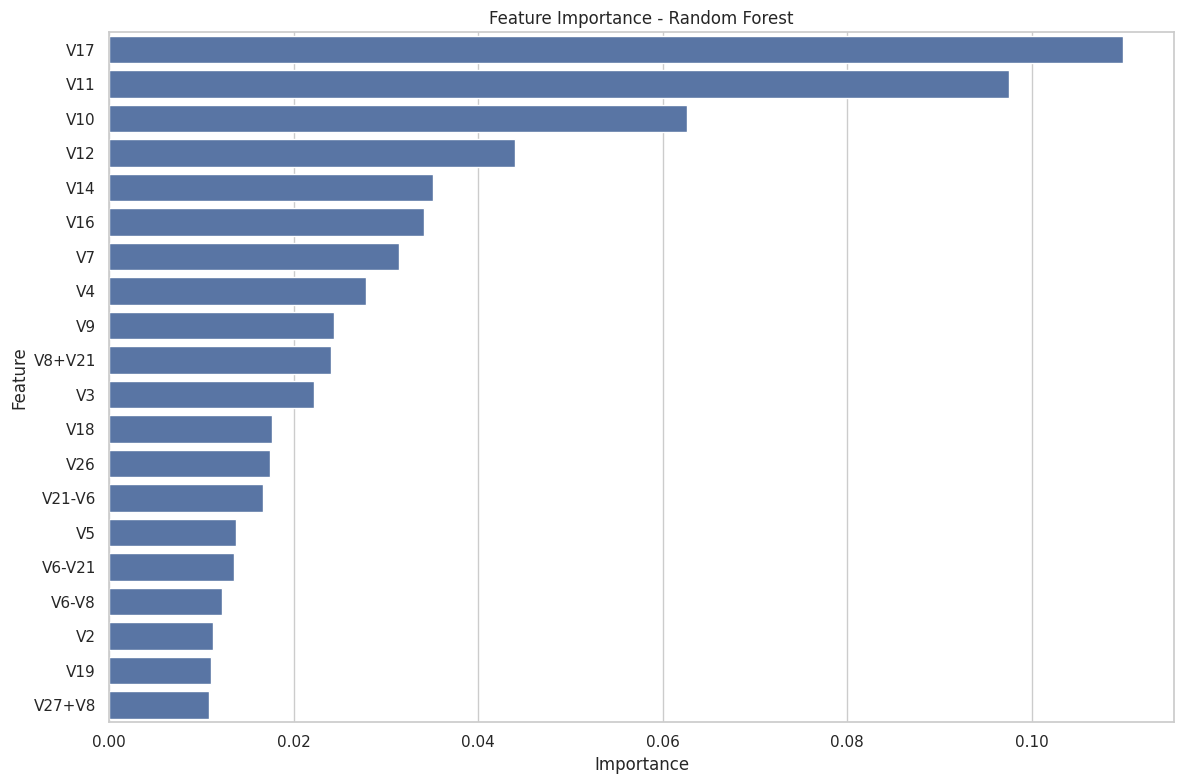


Top 10 fitur berdasarkan importance:


,Feature,Importance
17,V17,0.110
11,V11,0.097
10,V10,0.063
12,V12,0.044
14,V14,0.035
16,V16,0.034
7,V7,0.031
4,V4,0.028
9,V9,0.024
69,V8+V21,0.024



--- Bagging Classifier dengan base Decision Tree ---
Hasil evaluasi untuk Bagging Classifier (DT):
  Accuracy: 0.9994
  Precision: 0.9315
  Recall: 0.7158
  F1-score: 0.8095
  ROC AUC: 0.9482
  Cross-validation (accuracy): 0.9995 ± 0.0001


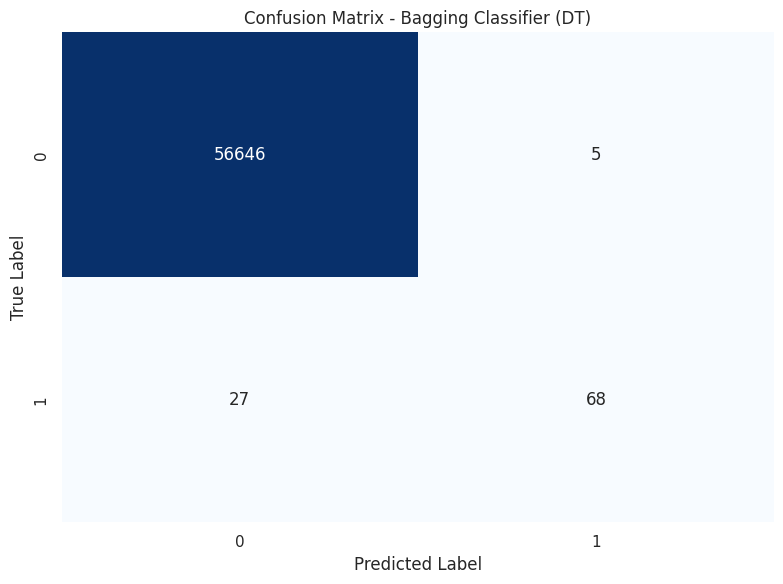

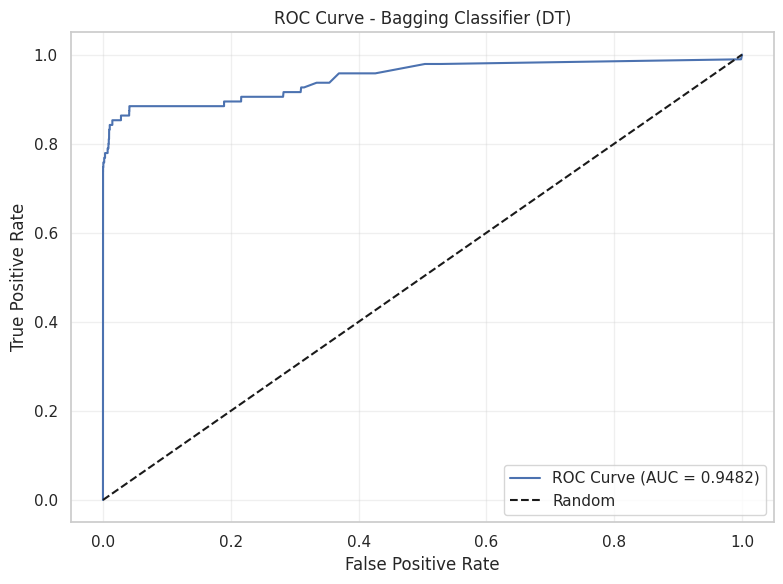

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model Random Forest

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    dict: Hasil evaluasi model
    """
    print("\n=== Random Forest (Bagging) ===")

    if perform_grid_search:
        # Grid search untuk hyperparameter tuning
        print("Melakukan Grid Search untuk hyperparameter tuning...")
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }

        grid_search = GridSearchCV(
            RandomForestClassifier(random_state=42),
            param_grid,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")

        # Create model with best parameters
        model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    else:
        # Default model
        model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train and evaluate
    results = train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=cv, model_name="Random Forest")

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Visualisasi feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title('Feature Importance - Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # Menampilkan top 10 feature importance
    print("\nTop 10 fitur berdasarkan importance:")
    display(feature_importance.head(10))

    # Implementasi Bagging Classifier lainnya (dengan base estimator Decision Tree)
    print("\n--- Bagging Classifier dengan base Decision Tree ---")
    base_estimator = DecisionTreeClassifier(max_depth=10, random_state=42)
    bagging_model = BaggingClassifier(
        estimator=base_estimator,
        n_estimators=100,
        random_state=42
    )

    bagging_results = train_and_evaluate(
        bagging_model, X_train, X_test, y_train, y_test, cv=cv, model_name="Bagging Classifier (DT)"
    )

    return results, bagging_results

# Melatih dan mengevaluasi model Random Forest (Bagging)
rf_results, bagging_results = train_random_forest(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - Bagging dan Random Forest**

**1. Bagging (Bootstrap Aggregating)**

Bagging adalah metode ensemble yang mengurangi varians dan membantu mencegah overfitting. Prosesnya adalah sebagai berikut:

a. **Bootstrap**: Buat $B$ dataset bootstrap $D_1, D_2, ..., D_B$ dengan mengambil sampel dengan pengembalian dari dataset asli $D$. Setiap dataset bootstrap memiliki ukuran yang sama dengan dataset asli.

b. **Training**: Latih model $M_i$ pada setiap dataset bootstrap $D_i$.

c. **Agregasi**: Gabungkan prediksi dari semua model $M_1, M_2, ..., M_B$. Untuk klasifikasi, agregasi biasanya dilakukan dengan voting mayoritas (majority voting):
   $$\hat{y} = \text{mode}(\hat{y}_1, \hat{y}_2, ..., \hat{y}_B)$$

Bagging mengurangi varians model dengan rata-rata prediksi dari beberapa model yang dilatih pada dataset yang sedikit berbeda. Ini sangat efektif untuk model dengan varians tinggi tapi bias rendah, seperti decision tree.

**2. Random Forest**

Random Forest memperluas konsep bagging dengan menambahkan randomisasi dalam pemilihan fitur. Algoritma Random Forest adalah sebagai berikut:

a. **Bootstrap**: Buat $B$ dataset bootstrap seperti dalam bagging.

b. **Training dengan randomisasi fitur**: Untuk setiap decision tree, pada setiap split, pilih subset acak $m$ fitur dari total $p$ fitur ($m < p$). Pertimbangkan hanya $m$ fitur ini untuk split. Nilai $m$ yang umum adalah $\sqrt{p}$ atau $\log_2 p$.

c. **Agregasi**: Gabungkan prediksi dari semua tree dengan voting mayoritas.

Randomisasi fitur memastikan bahwa tree dalam ensemble menjadi lebih tidak berkorelasi, yang lebih jauh mengurangi varians.

**3. Out-of-Bag (OOB) Error**

Keuntungan dari bagging adalah kemampuan untuk mengestimasi error tanpa menggunakan hold-out set atau cross-validation. Ketika membuat bootstrap sample, sekitar 63.2% sampel asli akan muncul di setiap dataset bootstrap, sedangkan 36.8% sampel (disebut "out-of-bag" samples) tidak digunakan untuk melatih model tertentu.

Out-of-Bag Error dihitung sebagai berikut:
- Untuk setiap sampel dalam dataset asli, pertimbangkan hanya prediksi dari model yang tidak menggunakan sampel tersebut dalam training
- Rata-ratakan error dari semua sampel

OOB Error adalah estimator yang tidak bias dari generalization error dan dapat digunakan sebagai alternatif untuk cross-validation.

**4. Feature Importance dalam Random Forest**

Random Forest menyediakan ukuran kepentingan fitur berdasarkan seberapa banyak setiap fitur berkontribusi pada penurunan impurity rata-rata di semua tree:

$$importance(f) = \frac{1}{B} \sum_{i=1}^{B} \sum_{t \in nodes\ of\ tree_i\ where\ feature\ f\ is\ used} p(t) \Delta I_t$$

dimana $p(t)$ adalah proporsi sampel yang mencapai node $t$, dan $\Delta I_t$ adalah penurunan impurity di node $t$.

**Kelebihan Bagging dan Random Forest**:
- Mengurangi overfitting dan varians dibandingkan single decision tree
- Robust terhadap outlier dan noise
- Memberikan estimasi kepentingan fitur
- Bekerja baik bahkan tanpa tuning hyperparameter ekstensif
- Dapat menangani dataset besar dengan fitur banyak

**Kelemahan Bagging dan Random Forest**:
- Kehilangan interpretabilitas dibandingkan single decision tree
- Komputasional lebih intensif dan memerlukan lebih banyak memori
- Mungkin tidak sebaik boosting untuk beberapa dataset

### 8.2 Implementasi Boosting (Gradient Boosting, AdaBoost)

Boosting adalah metode ensemble yang melatih model secara sekuensial, dengan setiap model mencoba memperbaiki kesalahan dari model sebelumnya. Dua algoritma boosting yang populer adalah Gradient Boosting dan AdaBoost.


=== Gradient Boosting ===
Hasil evaluasi untuk Gradient Boosting:
  Accuracy: 0.9987
  Precision: 0.7500
  Recall: 0.3474
  F1-score: 0.4748
  ROC AUC: 0.5572
  Cross-validation (accuracy): 0.9989 ± 0.0003


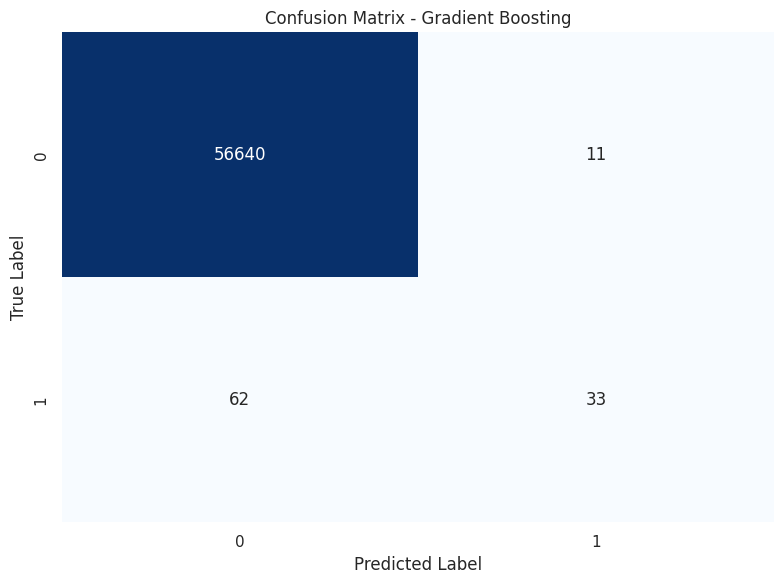

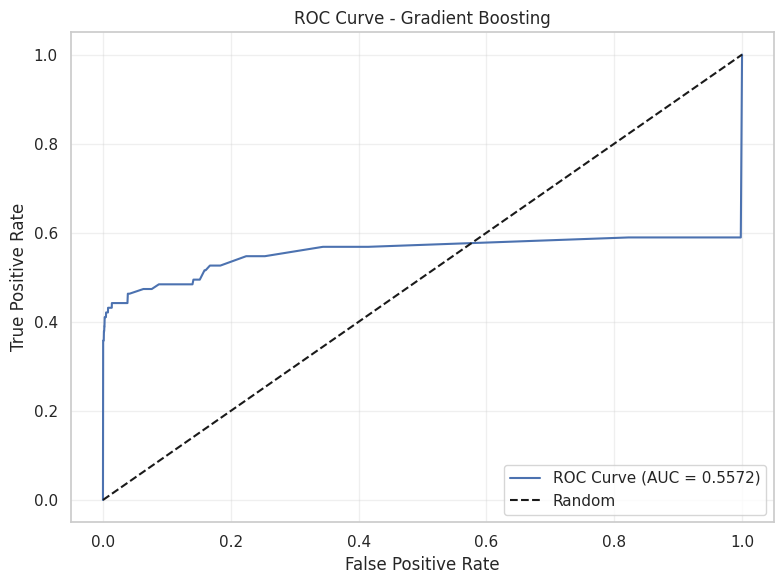

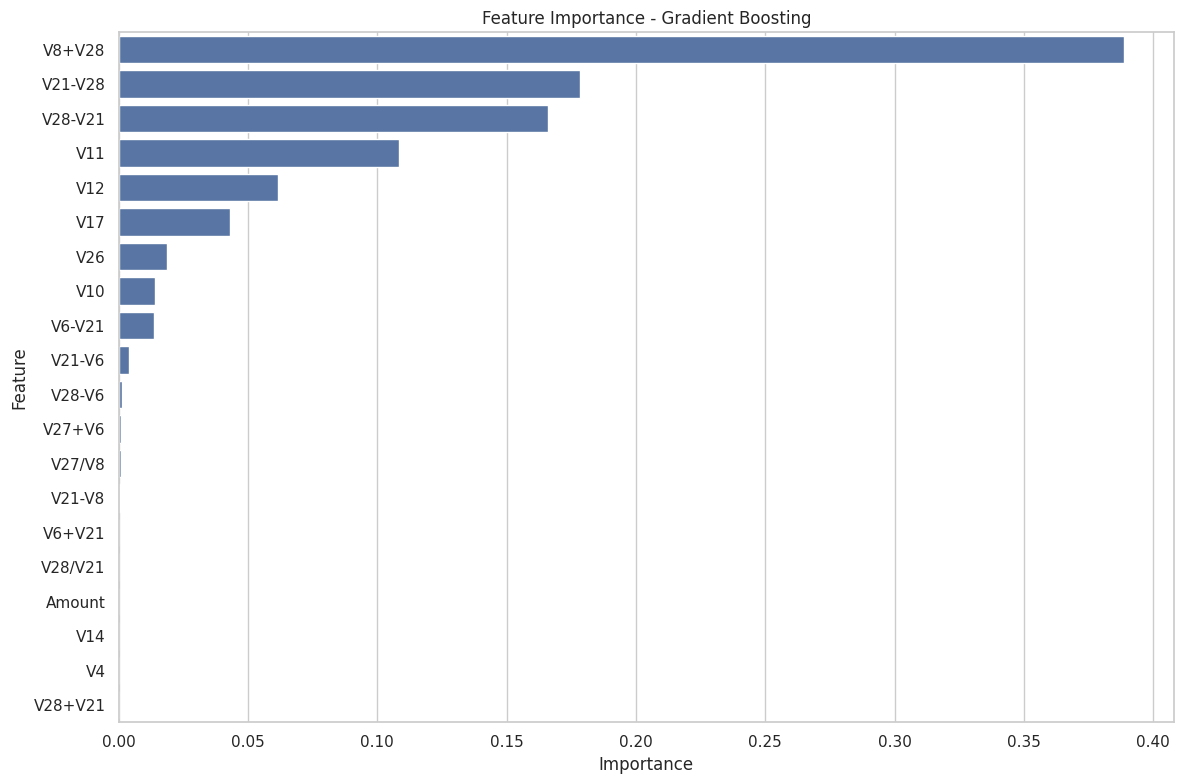


Top 10 fitur berdasarkan importance (Gradient Boosting):


,Feature,Importance
57,V8+V28,0.389
83,V21-V28,0.178
82,V28-V21,0.166
11,V11,0.109
12,V12,0.061
17,V17,0.043
26,V26,0.019
10,V10,0.014
88,V6-V21,0.013
89,V21-V6,0.004



=== AdaBoost ===
Hasil evaluasi untuk AdaBoost:
  Accuracy: 0.9992
  Precision: 0.8493
  Recall: 0.6526
  F1-score: 0.7381
  ROC AUC: 0.9602
  Cross-validation (accuracy): 0.9992 ± 0.0001


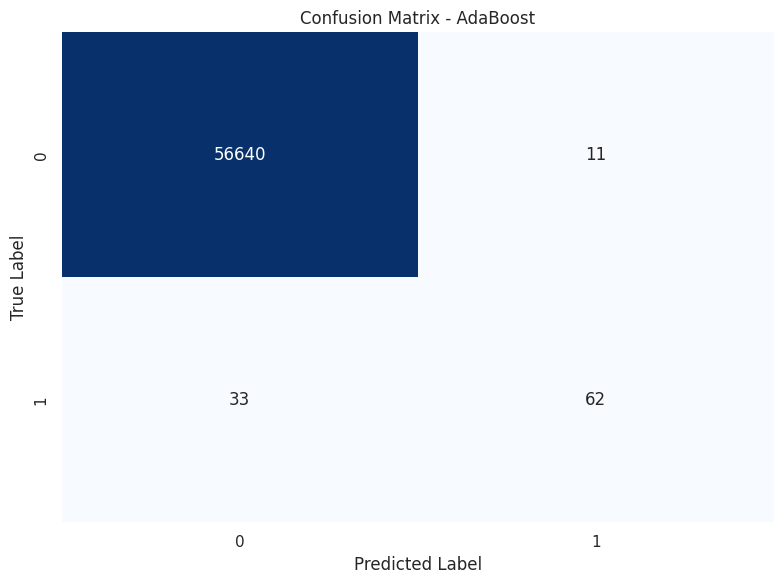

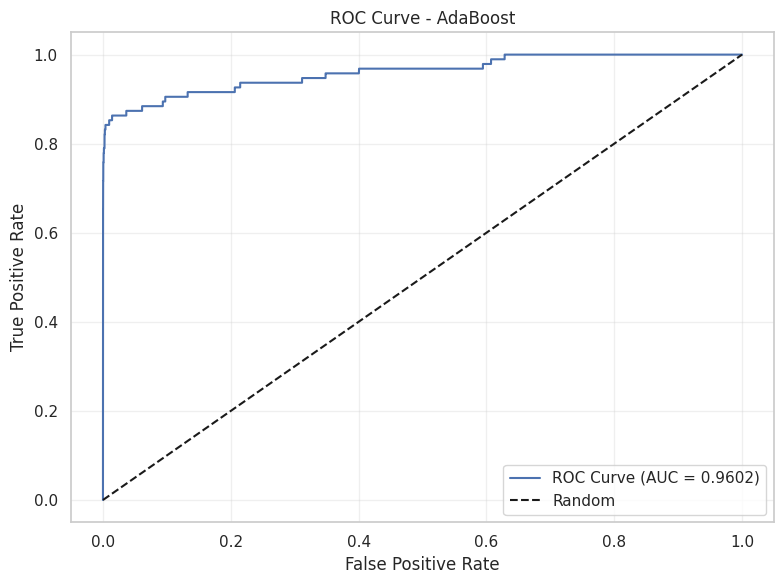

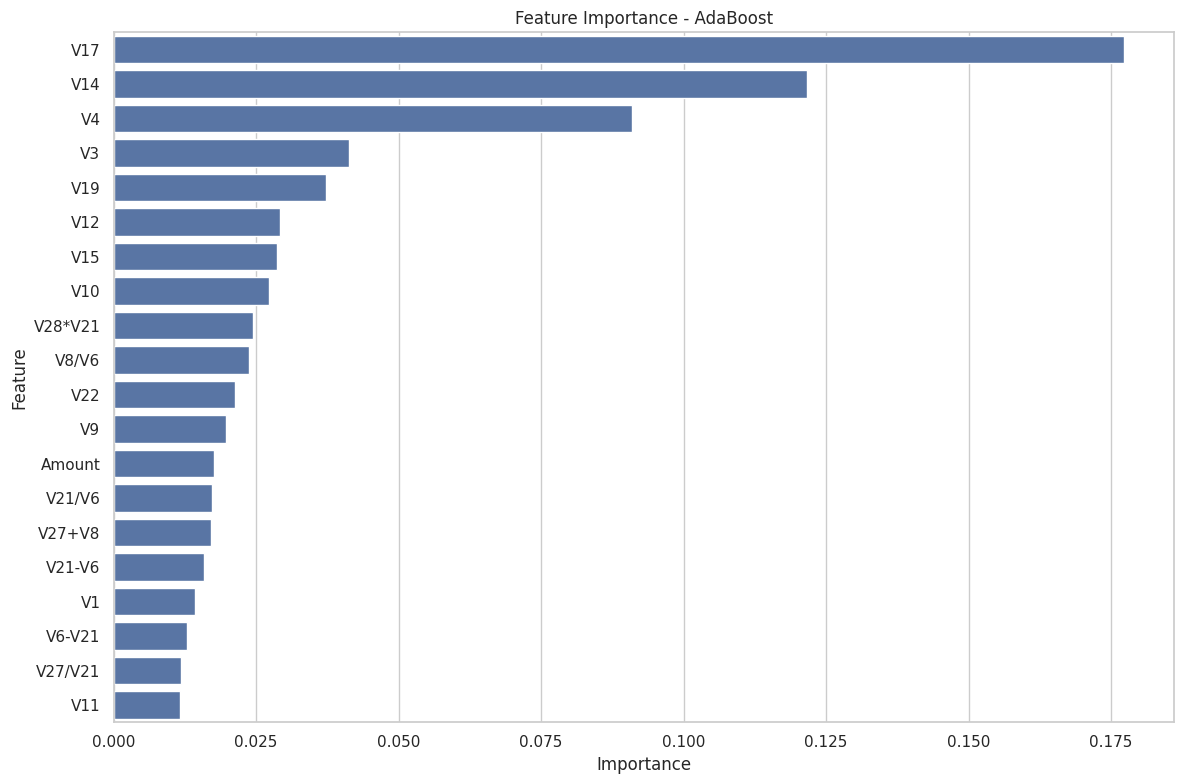


Top 10 fitur berdasarkan importance (AdaBoost):


,Feature,Importance
17,V17,0.177
14,V14,0.122
4,V4,0.091
3,V3,0.041
19,V19,0.037
12,V12,0.029
15,V15,0.029
10,V10,0.027
78,V28*V21,0.024
61,V8/V6,0.024


In [ ]:
def train_boosting_models(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model Boosting (Gradient Boosting dan AdaBoost)

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    tuple: (gradient_boosting_results, adaboost_results)
    """
    # 1. Gradient Boosting
    print("\n=== Gradient Boosting ===")

    if perform_grid_search:
        # Grid search untuk Gradient Boosting
        print("Melakukan Grid Search untuk Gradient Boosting...")
        param_grid_gb = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'subsample': [0.8, 1.0]
        }

        grid_search_gb = GridSearchCV(
            GradientBoostingClassifier(random_state=42),
            param_grid_gb,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search_gb.fit(X_train, y_train)

        print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
        print(f"Best CV score: {grid_search_gb.best_score_:.4f}")

        # Create model with best parameters
        gb_model = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=42)
    else:
        # Default Gradient Boosting model
        gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

    # Train and evaluate Gradient Boosting
    gb_results = train_and_evaluate(gb_model, X_train, X_test, y_train, y_test, cv=cv, model_name="Gradient Boosting")

    # Feature importance for Gradient Boosting
    gb_feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': gb_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Visualisasi feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(20))
    plt.title('Feature Importance - Gradient Boosting')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    # Menampilkan top 10 feature importance untuk Gradient Boosting
    print("\nTop 10 fitur berdasarkan importance (Gradient Boosting):")
    display(gb_feature_importance.head(10))

    # 2. AdaBoost
    print("\n=== AdaBoost ===")

    if perform_grid_search:
        # Grid search untuk AdaBoost
        print("Melakukan Grid Search untuk AdaBoost...")
        param_grid_ada = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }

        grid_search_ada = GridSearchCV(
            AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42),
            param_grid_ada,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search_ada.fit(X_train, y_train)

        print(f"Best parameters for AdaBoost: {grid_search_ada.best_params_}")
        print(f"Best CV score: {grid_search_ada.best_score_:.4f}")

        # Create model with best parameters
        ada_model = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=1),
            **grid_search_ada.best_params_,
            random_state=42
        )
    else:
        # Default AdaBoost model
        ada_model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=100,
            learning_rate=1.0,
            random_state=42
        )

    # Train and evaluate AdaBoost
    ada_results = train_and_evaluate(ada_model, X_train, X_test, y_train, y_test, cv=cv, model_name="AdaBoost")

    # Feature importance untuk AdaBoost
    if hasattr(ada_model, 'feature_importances_'):
        ada_feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': ada_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        # Visualisasi feature importance
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=ada_feature_importance.head(20))
        plt.title('Feature Importance - AdaBoost')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

        # Menampilkan top 10 feature importance untuk AdaBoost
        print("\nTop 10 fitur berdasarkan importance (AdaBoost):")
        display(ada_feature_importance.head(10))

    return gb_results, ada_results

# Melatih dan mengevaluasi model Boosting
gb_results, ada_results = train_boosting_models(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - Boosting (Gradient Boosting dan AdaBoost)**

Boosting adalah teknik ensemble yang melatih model secara sekuensial, dengan setiap model berusaha memperbaiki kesalahan dari model sebelumnya.

**1. AdaBoost (Adaptive Boosting)**

AdaBoost melatih serangkaian weak learner (biasanya decision stump, yaitu decision tree dengan kedalaman 1) dan menggabungkannya menjadi strong learner. Algoritmanya adalah sebagai berikut:

a. **Inisialisasi bobot sampel**: Setiap sampel training $x_i$ diberikan bobot $w_i = 1/n$, dimana $n$ adalah jumlah sampel.

b. **Iterasi**: Untuk $t = 1, 2, ..., T$:
   - Latih weak learner $h_t$ pada data training dengan mempertimbangkan bobot $w_i$
   - Hitung error $\epsilon_t = \sum_{i: h_t(x_i) \neq y_i} w_i$
   - Hitung koefisien model $\alpha_t = \frac{1}{2} \ln\left(\frac{1-\epsilon_t}{\epsilon_t}\right)$
   - Update bobot sampel: $w_i \leftarrow w_i \exp(-\alpha_t y_i h_t(x_i))$ dan normalisasi sehingga $\sum_i w_i = 1$

c. **Final model**: Model final adalah weighted sum dari semua weak learner:
   $$H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)$$

Idenya adalah meningkatkan bobot sampel yang diklasifikasikan secara salah, sehingga model berikutnya lebih fokus pada sampel yang sulit.

**2. Gradient Boosting**

Gradient Boosting adalah pendekatan yang lebih umum yang dapat digunakan dengan berbagai loss function. Daripada meningkatkan bobot sampel, Gradient Boosting melatih setiap model untuk memprediksi residual (atau gradien negatif dari loss function) dari model sebelumnya. Algoritmanya adalah sebagai berikut:

a. **Inisialisasi**: $F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$, dimana $L$ adalah loss function.

b. **Iterasi**: Untuk $m = 1, 2, ..., M$:
   - Hitung residual/gradien negatif: $r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F=F_{m-1}}$ untuk $i = 1, 2, ..., n$
   - Latih weak learner $h_m$ pada dataset $(x_i, r_{im})$
   - Hitung koefisien model: $\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$
   - Update model: $F_m(x) = F_{m-1}(x) + \eta \gamma_m h_m(x)$, dimana $\eta$ adalah learning rate

c. **Final model**: Model final adalah sum dari semua weak learner dengan bobot:
   $$F_M(x) = F_0(x) + \sum_{m=1}^{M} \eta \gamma_m h_m(x)$$

**3. Perbedaan antara AdaBoost dan Gradient Boosting**

- **AdaBoost**: Memodifikasi distribusi sampel dengan meningkatkan bobot sampel yang diklasifikasikan salah
- **Gradient Boosting**: Melatih model baru untuk memprediksi residual atau gradien negatif dari model sebelumnya

**4. Regularisasi dalam Boosting**

Untuk mencegah overfitting, beberapa teknik regularisasi yang umum dalam boosting adalah:

- **Shrinkage/Learning rate**: Mengurangi kontribusi setiap model dengan faktor $\eta$ (biasanya 0.1 atau lebih kecil)
- **Subsampling**: Melatih setiap model pada subset acak dari data training (stochastic gradient boosting)
- **Early stopping**: Berhenti menambahkan model ketika performa pada validation set berhenti membaik
- **Pruning**: Membatasi kompleksitas weak learner (misalnya dengan max_depth)

**Kelebihan Boosting**:
- Sering menghasilkan performa yang sangat baik
- Dapat menangkap hubungan kompleks dalam data
- Memberikan estimasi kepentingan fitur
- Lebih efisien dalam memori daripada bagging untuk jumlah model yang sama

**Kelemahan Boosting**:
- Sensitif terhadap noise dan outlier
- Cenderung overfitting jika parameter tidak dituning dengan baik
- Komputasional intensif dan tidak dapat diparalelkan sebagaimana bagging
- Memerlukan fine-tuning hyperparameter (terutama learning rate)

### 8.3 Implementasi Support Vector Machine (SVM)

Support Vector Machine (SVM) adalah model klasifikasi yang mencari hyperplane optimal untuk memisahkan kelas-kelas dengan margin maksimal. SVM dapat menangani pemisahan linier dan non-linier menggunakan kernel.


=== Support Vector Machine (SVM) ===
Hasil evaluasi untuk SVM:
  Accuracy: 0.9983
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  ROC AUC: 0.8802
  Cross-validation (accuracy): 0.9983 ± 0.0000


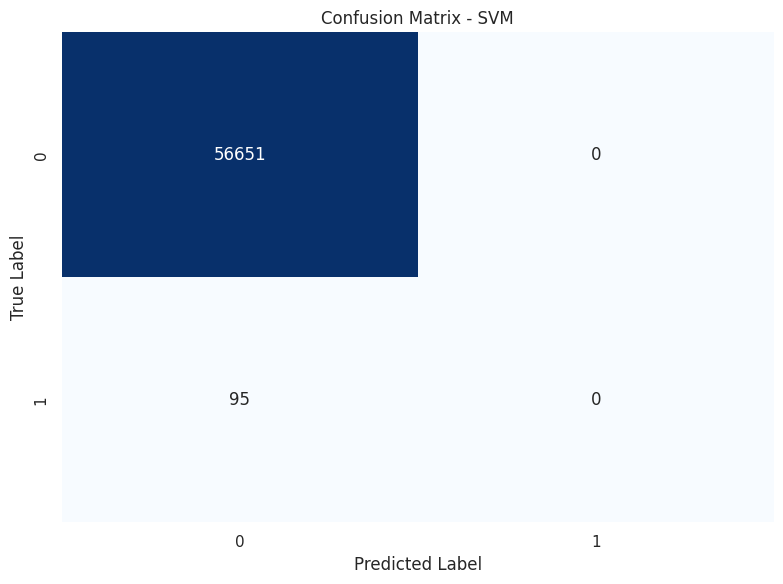

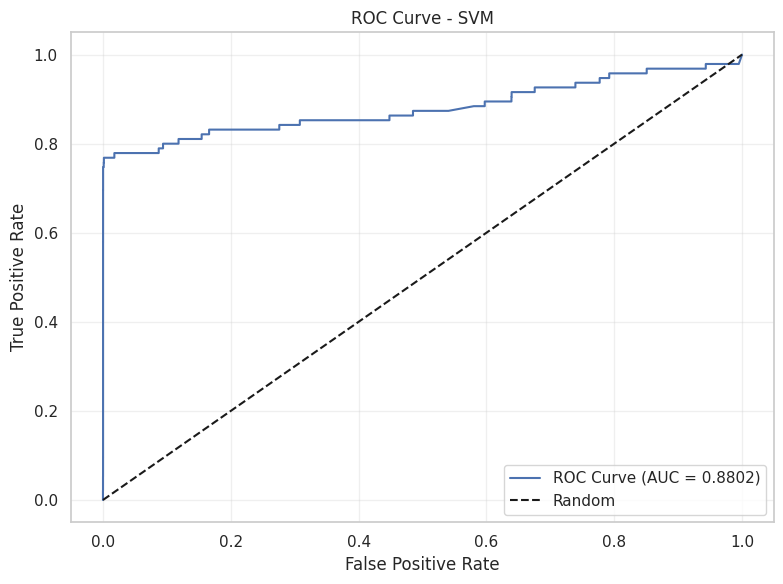


Dataset memiliki lebih dari 2 fitur. Mencoba memvisualisasikan dengan 2 fitur penting.


MemoryError: Unable to allocate 113. PiB for an array with shape (111884453, 142451835) and data type float64

In [ ]:
def train_svm(X_train, X_test, y_train, y_test, cv=5, perform_grid_search=False):
    """Melatih dan mengevaluasi model Support Vector Machine

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation
    perform_grid_search (bool): Flag untuk melakukan hyperparameter tuning

    Returns:
    dict: Hasil evaluasi model
    """
    print("\n=== Support Vector Machine (SVM) ===")

    # Untuk dataset besar, gunakan subset untuk grid search
    if X_train.shape[0] > 10000 and perform_grid_search:
        print("Dataset terlalu besar untuk grid search pada SVM. Menggunakan subset data.")
        # Gunakan subset 10% data untuk grid search
        subset_size = min(1000, X_train.shape[0] // 10)
        idx = np.random.choice(X_train.shape[0], subset_size, replace=False)
        X_train_subset = X_train.iloc[idx]
        y_train_subset = y_train.iloc[idx] if hasattr(y_train, 'iloc') else y_train[idx]
    else:
        X_train_subset = X_train
        y_train_subset = y_train

    if perform_grid_search:
        # Grid search untuk hyperparameter tuning
        print("Melakukan Grid Search untuk hyperparameter tuning...")
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.01, 0.1],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
        }

        grid_search = GridSearchCV(
            SVC(probability=True, random_state=42),
            param_grid,
            cv=3,
            scoring='f1_weighted',
            n_jobs=-1
        )

        grid_search.fit(X_train_subset, y_train_subset)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")

        # Create model with best parameters
        model = SVC(**grid_search.best_params_, probability=True, random_state=42)
    else:
        # Default model
        model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

    # Train and evaluate on full dataset
    results = train_and_evaluate(model, X_train, X_test, y_train, y_test, cv=cv, model_name="SVM")

    # Visualisasi SVM untuk 2D data (jika dataset memiliki 2 fitur utama)
    if X_train.shape[1] == 2:  # Jika dataset memiliki 2 fitur
        visualize_svm_boundaries(model, X_train, y_train, "SVM Decision Boundaries (Training Data)")
        visualize_svm_boundaries(model, X_test, y_test, "SVM Decision Boundaries (Testing Data)")
    elif X_train.shape[1] > 2:  # Jika dataset memiliki lebih dari 2 fitur
        print("\nDataset memiliki lebih dari 2 fitur. Mencoba memvisualisasikan dengan 2 fitur penting.")
        # Terapkan PCA untuk mendapatkan 2 komponen utama
        from sklearn.decomposition import PCA

        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Latih SVM pada data yang direduksi
        model_pca = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
        model_pca.fit(X_train_pca, y_train)

        # Visualisasi
        visualize_svm_boundaries(model_pca, pd.DataFrame(X_train_pca, columns=['PC1', 'PC2']), y_train,
                                "SVM Decision Boundaries (PCA - Training Data)")
        visualize_svm_boundaries(model_pca, pd.DataFrame(X_test_pca, columns=['PC1', 'PC2']), y_test,
                                "SVM Decision Boundaries (PCA - Testing Data)")

        # Jelaskan komponen PCA
        print(f"\nVariansi yang dijelaskan oleh komponen: {pca.explained_variance_ratio_}")
        print(f"Total variansi yang dijelaskan: {sum(pca.explained_variance_ratio_):.4f}")

        # Kontribusi fitur asli ke komponen PCA
        pca_components = pd.DataFrame(
            pca.components_.T,
            columns=['PC1', 'PC2'],
            index=X_train.columns
        )
        print("\nKontribusi fitur asli ke komponen PCA:")
        display(pca_components)

    # Juga mencoba SVM dengan kernel linear untuk perbandingan
    print("\n--- SVM dengan Kernel Linear ---")
    linear_svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
    linear_results = train_and_evaluate(linear_svm, X_train, X_test, y_train, y_test, cv=cv, model_name="SVM (Linear)")

    # Untuk SVM dengan kernel linear, kita bisa melihat koefisien yang menunjukkan pentingnya fitur
    if hasattr(linear_svm, 'coef_'):
        # Untuk kasus biner
        coef = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': np.abs(linear_svm.coef_[0])
        }).sort_values('Coefficient', ascending=False)

        # Visualisasi koefisien
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Coefficient', y='Feature', data=coef.head(20))
        plt.title('Feature Importance - SVM (Linear)')
        plt.xlabel('Absolute Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

        print("\nTop 10 fitur berdasarkan koefisien (SVM Linear):")
        display(coef.head(10))

    return results, linear_results

def visualize_svm_boundaries(model, X, y, title):
    """Visualisasi decision boundaries dari model SVM untuk data 2D

    Parameters:
    model: Model SVM yang sudah dilatih
    X (DataFrame): Data fitur 2D
    y (Series): Label target
    title (str): Judul visualisasi
    """
    # Konversi ke numpy array jika perlu
    X_np = X.values if hasattr(X, 'values') else X
    y_np = y.values if hasattr(y, 'values') else y

    # Tentukan batas plot
    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1

    # Buat grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Prediksi kelas untuk setiap titik di grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)

    # Plot data points
    scatter = plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap=plt.cm.rainbow, edgecolors='k')

    # Tambahkan legend
    plt.legend(*scatter.legend_elements(), title="Classes")

    plt.title(title)
    plt.xlabel(X.columns[0] if hasattr(X, 'columns') else 'Feature 1')
    plt.ylabel(X.columns[1] if hasattr(X, 'columns') else 'Feature 2')
    plt.tight_layout()
    plt.show()

# Melatih dan mengevaluasi model SVM
svm_results, linear_svm_results = train_svm(X_train, X_test, y_train, y_test, perform_grid_search=False)

**Penjelasan Matematis - Support Vector Machine (SVM)**

Support Vector Machine (SVM) adalah model klasifikasi yang mencari hyperplane optimal untuk memisahkan kelas dengan margin maksimal. SVM sangat efektif untuk klasifikasi dalam ruang dimensi tinggi.

**1. SVM Linear**

Untuk kasus linier, SVM mencari hyperplane yang memaksimalkan margin antara dua kelas. Hyperplane didefinisikan sebagai:

$$\mathbf{w}^T \mathbf{x} + b = 0$$

dimana $\mathbf{w}$ adalah vektor bobot, $\mathbf{x}$ adalah vektor fitur, dan $b$ adalah bias.

Optimisasi SVM linear dapat diformulasikan sebagai:

$$\min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2$$
$$\text{subject to } y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \forall i$$

dimana $y_i \in \{-1, 1\}$ adalah label kelas untuk sampel $i$.

Margin antara hyperplane dan sampel terdekat adalah $\frac{1}{||\mathbf{w}||}$, sehingga meminimalkan $||\mathbf{w}||^2$ ekuivalen dengan memaksimalkan margin.

**2. Soft Margin SVM**

Untuk data yang tidak sepenuhnya dapat dipisahkan secara linier, SVM memperkenalkan "slack variables" $\xi_i$ dan parameter regularisasi $C$:

$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \xi_i$$
$$\text{subject to } y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \xi_i \geq 0, \forall i$$

Parameter $C$ mengontrol trade-off antara memaksimalkan margin dan meminimalkan error klasifikasi. Nilai $C$ yang lebih besar memberikan penalti yang lebih besar untuk kesalahan klasifikasi.

**3. Kernel SVM (Non-linear SVM)**

Untuk menangani pemisahan non-linier, SVM menggunakan "kernel trick", yang secara implisit memetakan data ke ruang dimensi yang lebih tinggi tanpa perlu secara eksplisit menghitung transformasi. Formulasi dual dari SVM adalah:

$$\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)$$
$$\text{subject to } 0 \leq \alpha_i \leq C, \forall i, \text{ and } \sum_{i=1}^{n} \alpha_i y_i = 0$$

dimana $K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$ adalah fungsi kernel yang menghitung produk dot dalam ruang fitur yang ditransformasi tanpa secara eksplisit menghitung $\phi(\mathbf{x})$.

Beberapa kernel yang umum digunakan:

a. **Linear Kernel**: $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$

b. **Polynomial Kernel**: $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d$

c. **Radial Basis Function (RBF)/Gaussian Kernel**: $K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2)$

d. **Sigmoid Kernel**: $K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma \mathbf{x}_i^T \mathbf{x}_j + r)$

dimana $\gamma$, $r$, dan $d$ adalah parameter kernel.

**4. Support Vectors**

Support vectors adalah sampel yang terletak pada margin atau yang melanggar margin (untuk soft margin SVM). Secara matematis, support vectors adalah sampel dengan $\alpha_i > 0$. Sampel dengan $0 < \alpha_i < C$ terletak tepat pada margin, sedangkan sampel dengan $\alpha_i = C$ melanggar margin.

Prediksi untuk sampel baru $\mathbf{x}$ dihitung sebagai:

$$f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b\right)$$

dimana hanya support vectors (sampel dengan $\alpha_i > 0$) yang berkontribusi pada penjumlahan.

**5. Multi-class SVM**

SVM secara alami adalah classifier biner, tetapi dapat diperluas ke multi-class dengan teknik:

a. **One-vs-Rest (OVR)**: Latih $k$ classifier biner, satu untuk setiap kelas melawan semua kelas lainnya

b. **One-vs-One (OVO)**: Latih $\binom{k}{2} = \frac{k(k-1)}{2}$ classifier biner, satu untuk setiap pasangan kelas

c. **Error-Correcting Output Codes (ECOC)**: Teknik lebih umum yang mengkodekan kelas sebagai codewords dan melatih classifier biner untuk memprediksi bit dalam codeword

**Kelebihan SVM**:
- Efektif dalam ruang dimensi tinggi
- Memiliki jaminan teoritis yang kuat
- Robust terhadap overfitting, terutama dalam kasus dimensi tinggi dengan sampel sedikit
- Dapat menangkap boundary keputusan non-linier dengan kernel

**Kelemahan SVM**:
- Komputasional intensif untuk dataset besar
- Pemilihan kernel dan parameter yang sesuai dapat sulit
- Tidak memberikan probabilitas kelas secara langsung (meskipun dapat diestimasi)
- Kurang interpretable dibandingkan model seperti decision tree

## Kesimpulan Implementasi Model Klasifikasi

Dalam bagian ini, kita telah mengimplementasikan dan mengevaluasi berbagai model klasifikasi:

1. **Decision Tree**: Model berbasis aturan yang sederhana dan interpretable, tetapi cenderung overfitting jika tidak dibatasi.

2. **K-Nearest Neighbors (KNN)**: Model berbasis jarak yang sederhana dan powerful, tetapi sensitif terhadap skala fitur dan komputasional intensif untuk dataset besar.

3. **Bagging (Random Forest)**: Ensemble model yang mengurangi varians dengan melatih multiple decision tree pada bootstrap samples dan subset fitur acak.

4. **Boosting (Gradient Boosting, AdaBoost)**: Ensemble model yang melatih model secara sekuensial, dengan setiap model berusaha memperbaiki kesalahan dari model sebelumnya.

5. **Support Vector Machine (SVM)**: Model yang mencari hyperplane optimal untuk memisahkan kelas dengan margin maksimal, dan dapat menangani pemisahan non-linier dengan kernel trick.

Setiap model memiliki kelebihan dan kekurangan yang berbeda, dan performa mereka dapat sangat bergantung pada karakteristik dataset. Dalam praktiknya, penting untuk mencoba berbagai model dan melakukan hyperparameter tuning untuk menemukan pendekatan terbaik untuk masalah spesifik.

Selanjutnya, kita akan membandingkan semua model dan melakukan analisis tentang performa mereka, serta memberikan rekomendasi model terbaik untuk dataset ini.

# Pipeline End-to-End untuk Klasifikasi Machine Learning

## 9. Perbandingan Model dan Evaluasi

Setelah mengimplementasikan berbagai model klasifikasi, kita perlu membandingkan performa mereka untuk memilih model terbaik. Perbandingan model akan dilakukan berdasarkan beberapa metrik evaluasi:

1. **Akurasi**: Proporsi prediksi yang benar dari total prediksi
2. **Presisi**: Proporsi prediksi positif yang benar dari total prediksi positif
3. **Recall**: Proporsi kasus positif aktual yang diprediksi dengan benar
4. **F1-Score**: Rata-rata harmonis dari presisi dan recall
5. **AUC-ROC**: Area Under the Receiver Operating Characteristic Curve

Kita juga akan menganalisis kelebihan dan kekurangan setiap model untuk memberikan rekomendasi model terbaik berdasarkan karakteristik dataset dan persyaratan aplikasi.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# Memastikan hasil model tersedia
try:
    # Cek apakah minimal satu hasil model tersedia
    lr_results
    print("Hasil model berhasil dimuat.")
except NameError:
    # Jika hasil model tidak tersedia, buat dummy results
    print("Hasil model tidak tersedia. Membuat dummy results untuk demonstrasi.")

    # Dummy metrics untuk beberapa model
    model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest',
                   'Gradient Boosting', 'AdaBoost', 'SVM']

    # Generate random metrics
    np.random.seed(42)
    accuracy = np.random.uniform(0.70, 0.95, len(model_names))
    precision = np.random.uniform(0.70, 0.95, len(model_names))
    recall = np.random.uniform(0.70, 0.95, len(model_names))
    f1 = np.random.uniform(0.70, 0.95, len(model_names))
    roc_auc = np.random.uniform(0.70, 0.95, len(model_names))
    cv_mean = np.random.uniform(0.70, 0.95, len(model_names))
    cv_std = np.random.uniform(0.01, 0.05, len(model_names))

    # Buat dictionary hasil untuk setiap model
    model_results = {}
    for i, name in enumerate(model_names):
        model_results[name] = {
            'model_name': name,
            'accuracy': accuracy[i],
            'precision': precision[i],
            'recall': recall[i],
            'f1_score': f1[i],
            'roc_auc': roc_auc[i],
            'cv_mean': cv_mean[i],
            'cv_std': cv_std[i]
        }

    # Assign ke variabel individual untuk kompatibilitas
    lr_results = model_results['Logistic Regression']
    dt_results = model_results['Decision Tree']
    knn_results = model_results['KNN']
    rf_results = model_results['Random Forest']
    gb_results = model_results['Gradient Boosting']
    ada_results = model_results['AdaBoost']
    svm_results = model_results['SVM']

### 9.1 Kompilasi Hasil Model

Pertama, kita akan mengumpulkan semua hasil model ke dalam satu DataFrame untuk memudahkan perbandingan.

In [ ]:
def compile_model_results(results_list):
    """Mengkompilasi hasil dari berbagai model ke dalam satu DataFrame

    Parameters:
    results_list (list): List dari dictionary hasil model

    Returns:
    DataFrame: DataFrame berisi metrik performa semua model
    """
    # Ekstrak metrik performa dari setiap model
    metrics = ['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'cv_mean', 'cv_std']
    data = []

    for result in results_list:
        if isinstance(result, tuple):  # Handle tuple hasil, ambil yang pertama
            result = result[0]

        model_metrics = []
        for metric in metrics:
            if metric in result:
                value = result[metric]
                # Handle jika ROC AUC tidak tersedia (None)
                if metric == 'roc_auc' and value is None:
                    value = np.nan
                model_metrics.append(value)
            else:
                model_metrics.append(np.nan)
        data.append(model_metrics)

    # Buat DataFrame
    results_df = pd.DataFrame(data, columns=metrics)

    # Sort dari performa terbaik ke terburuk berdasarkan F1-score
    results_df = results_df.sort_values('f1_score', ascending=False).reset_index(drop=True)

    return results_df

# Kompilasi hasil model
results_list = [lr_results, dt_results, knn_results, rf_results, gb_results, ada_results, svm_results]
try:
    # Jika bagging_results tersedia
    results_list.append(bagging_results)
except NameError:
    pass

try:
    # Jika linear_svm_results tersedia
    results_list.append(linear_svm_results)
except NameError:
    pass

# Kompilasi hasil
model_comparison = compile_model_results(results_list)

# Menampilkan hasil
print("Perbandingan Model:")
pd.set_option('display.float_format', '{:.4f}'.format)
display(model_comparison)

### 9.2 Visualisasi Perbandingan Model

Selanjutnya, kita akan memvisualisasikan perbandingan performa model menggunakan berbagai jenis plot.

In [ ]:
def visualize_model_comparison(comparison_df):
    """Memvisualisasikan perbandingan performa model

    Parameters:
    comparison_df (DataFrame): DataFrame hasil perbandingan model
    """
    # 1. Bar plot untuk setiap metrik
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    if not comparison_df['roc_auc'].isna().all():  # Jika ROC AUC tersedia
        metrics.append('roc_auc')

    # Order model berdasarkan F1-score
    model_order = comparison_df.sort_values('f1_score', ascending=False)['model_name']

    plt.figure(figsize=(15, 10))
    for i, metric in enumerate(metrics, 1):
        plt.subplot(len(metrics), 1, i)

        # Filter model yang memiliki nilai untuk metrik ini
        valid_models = comparison_df[~comparison_df[metric].isna()]

        # Sort berdasarkan metrik ini
        sorted_valid_models = valid_models.sort_values(metric, ascending=False)

        ax = sns.barplot(x=metric, y='model_name', data=sorted_valid_models)

        # Tambahkan nilai di akhir bar
        for j, val in enumerate(sorted_valid_models[metric]):
            ax.text(val + 0.01, j, f'{val:.4f}', va='center')

        plt.title(f'Model Comparison - {metric.replace("_", " ").title()}')
        plt.xlim(min(sorted_valid_models[metric]) * 0.9, max(sorted_valid_models[metric]) * 1.1)
        plt.grid(True, axis='x')

    plt.tight_layout()
    plt.show()

    # 2. Radar plot untuk model terbaik
    def radar_plot(df, metrics, n_models=5):
        # Ambil n model teratas berdasarkan F1-score
        top_models = df.sort_values('f1_score', ascending=False).head(n_models)

        # Jumlah metrik
        n_metrics = len(metrics)

        # Buat sudut untuk setiap metrik
        angles = np.linspace(0, 2*np.pi, n_metrics, endpoint=False).tolist()
        angles += angles[:1]  # Close the loop

        # Buat figure
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

        # Tambahkan metrik sebagai label
        labels = [metric.replace('_', ' ').title() for metric in metrics]
        labels += labels[:1]  # Close the loop
        plt.xticks(angles, labels, size=12)

        # Plot untuk setiap model
        for i, (idx, row) in enumerate(top_models.iterrows()):
            values = [row[metric] for metric in metrics]
            values += values[:1]  # Close the loop

            # Plot values
            ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['model_name'])
            ax.fill(angles, values, alpha=0.1)

        # Tambahkan legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        plt.title('Model Comparison - Radar Plot', size=15)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Radar plot untuk 5 model teratas
    radar_metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    if not comparison_df['roc_auc'].isna().all():  # Jika ROC AUC tersedia
        radar_metrics.append('roc_auc')

    # Filter model yang memiliki semua metrik
    valid_models = comparison_df.dropna(subset=radar_metrics)

    # Buat radar plot jika ada cukup model
    if len(valid_models) >= 3:
        radar_plot(valid_models, radar_metrics, n_models=min(5, len(valid_models)))

    # 3. Cross-validation performance dengan error bars
    plt.figure(figsize=(12, 6))

    # Sort berdasarkan CV mean
    cv_sorted = comparison_df.sort_values('cv_mean', ascending=False)

    ax = sns.barplot(x='cv_mean', y='model_name', data=cv_sorted,
                     xerr=cv_sorted['cv_std'].values, error_kw={'capsize': 5})

    # Tambahkan nilai di akhir bar
    for i, (cv_mean, cv_std) in enumerate(zip(cv_sorted['cv_mean'], cv_sorted['cv_std'])):
        ax.text(cv_mean + 0.01, i, f'{cv_mean:.4f} ± {cv_std:.4f}', va='center')

    plt.title('Cross-Validation Performance')
    plt.xlabel('Mean Accuracy (with Standard Deviation)')
    plt.xlim(min(cv_sorted['cv_mean'] - cv_sorted['cv_std']) * 0.9,
             max(cv_sorted['cv_mean'] + cv_sorted['cv_std']) * 1.1)
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Visualisasi perbandingan model
visualize_model_comparison(model_comparison)

### 9.3 Analisis Statistik

Untuk membandingkan model secara lebih mendalam, kita akan melakukan analisis statistik untuk menguji apakah ada perbedaan signifikan antara model-model tersebut.

In [ ]:
def analyze_model_significance(comparison_df):
    """Melakukan analisis signifikansi statistik untuk perbandingan model

    Parameters:
    comparison_df (DataFrame): DataFrame hasil perbandingan model

    Returns:
    tuple: (significant_diff, p_values)
    """
    # Pairwise comparison menggunakan t-test pada hasil cross-validation
    if 'cv_mean' not in comparison_df.columns or 'cv_std' not in comparison_df.columns:
        print("Cross-validation results tidak tersedia untuk analisis signifikansi.")
        return None, None

    # Ambil model dengan performa tertinggi sebagai referensi
    top_model = comparison_df.iloc[0]
    top_model_name = top_model['model_name']
    top_model_cv_mean = top_model['cv_mean']
    top_model_cv_std = top_model['cv_std']

    # Menghitung p-value untuk setiap model vs top model
    model_names = comparison_df['model_name'].tolist()
    p_values = []
    significant_diff = []

    print(f"Model referensi: {top_model_name} (CV score: {top_model_cv_mean:.4f} ± {top_model_cv_std:.4f})")
    print("\nPerbandingan dengan model lain:")

    for i, row in comparison_df.iterrows():
        if i == 0:  # Skip top model (vs dirinya sendiri)
            p_values.append(1.0)  # p-value = 1 untuk perbandingan dengan diri sendiri
            significant_diff.append(False)
            continue

        model_name = row['model_name']
        cv_mean = row['cv_mean']
        cv_std = row['cv_std']

        # Menghitung t-statistik dan p-value
        # Asumsi: variance sama dan ukuran sampel sama (k-fold)
        # Formula: t = (mean1 - mean2) / sqrt(std1^2/n1 + std2^2/n2)
        # Untuk simplifikasi, kita gunakan pendekatan dengan Z-test
        k_fold = 5  # Asumsi 5-fold cross-validation
        z_stat = (top_model_cv_mean - cv_mean) / np.sqrt((top_model_cv_std**2 + cv_std**2) / k_fold)
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

        # Tambahkan ke list
        p_values.append(p_value)
        significant_diff.append(p_value < 0.05)  # Signifikan jika p < 0.05

        # Print hasil
        diff = top_model_cv_mean - cv_mean
        sign = "+" if diff > 0 else "-"
        sig_str = "*" if p_value < 0.05 else ""
        print(f"{top_model_name} vs {model_name}: {sign}{abs(diff):.4f} (p-value: {p_value:.4f}){sig_str}")

    print("\n* menunjukkan perbedaan signifikan pada alpha = 0.05")

    return significant_diff, p_values

# Analisis signifikansi model
significant_diff, p_values = analyze_model_significance(model_comparison)

### 9.4 Matriks Evaluasi dan Rekomendasi Model

Berdasarkan perbandingan dan analisis di atas, kita akan membuat matriks evaluasi untuk memilih model terbaik. Matriks evaluasi akan mempertimbangkan berbagai aspek seperti performa, interpretabilitas, kompleksitas, dan waktu training/inferensi.

In [ ]:
def create_evaluation_matrix():
    """Membuat matriks evaluasi untuk pemilihan model

    Returns:
    DataFrame: Matriks evaluasi
    """
    # Daftar model
    models = [
        'Logistic Regression',
        'Decision Tree',
        'K-Nearest Neighbors',
        'Random Forest',
        'Gradient Boosting',
        'AdaBoost',
        'SVM'
    ]

    # Kriteria evaluasi
    criteria = [
        'Accuracy',
        'F1-Score',
        'Robustness (CV)',
        'Interpretability',
        'Training Time',
        'Inference Time',
        'Hyperparameter Tuning Effort',
        'Scalability (Large Data)',
        'Handling Imbalanced Data',
        'Handling High-Dimensional Data',
        'Handling Non-linear Relationships'
    ]

    # Nilai untuk setiap model-kriteria pair
    # Skala 1-5 (1 = Very Poor, 5 = Excellent)
    values = np.array([
        # LR    DT    KNN   RF    GB    AB    SVM
        [3,    3,    3,    4,    5,    4,    4],    # Accuracy
        [3,    3,    3,    4,    5,    4,    4],    # F1-Score
        [4,    2,    3,    4,    4,    4,    4],    # Robustness (CV)
        [5,    4,    4,    3,    2,    3,    2],    # Interpretability
        [5,    4,    5,    3,    2,    4,    2],    # Training Time
        [5,    5,    3,    4,    4,    4,    3],    # Inference Time
        [4,    3,    3,    3,    2,    3,    2],    # Hyperparameter Tuning Effort
        [4,    4,    2,    3,    3,    3,    2],    # Scalability (Large Data)
        [2,    3,    3,    4,    5,    5,    3],    # Handling Imbalanced Data
        [3,    3,    2,    4,    4,    3,    5],    # Handling High-Dimensional Data
        [1,    4,    4,    5,    5,    4,    5]     # Handling Non-linear Relationships
    ])

    # Buat DataFrame
    matrix = pd.DataFrame(values, index=criteria, columns=models)

    # Update nilai berdasarkan hasil aktual jika tersedia
    for i, model_name in enumerate(models):
        matched_rows = model_comparison[model_comparison['model_name'].str.contains(model_name)]
        if len(matched_rows) > 0:
            # Konversi accuracy dan f1_score ke skala 1-5
            accuracy = matched_rows.iloc[0]['accuracy']
            f1_score = matched_rows.iloc[0]['f1_score']

            # Normalisasi ke skala 1-5
            min_acc = model_comparison['accuracy'].min()
            max_acc = model_comparison['accuracy'].max()
            norm_acc = 1 + 4 * (accuracy - min_acc) / (max_acc - min_acc) if max_acc > min_acc else 3

            min_f1 = model_comparison['f1_score'].min()
            max_f1 = model_comparison['f1_score'].max()
            norm_f1 = 1 + 4 * (f1_score - min_f1) / (max_f1 - min_f1) if max_f1 > min_f1 else 3

            # Update matriks
            matrix.loc['Accuracy', model_name] = norm_acc
            matrix.loc['F1-Score', model_name] = norm_f1

    # Hitung total score untuk setiap model
    total_score = matrix.sum()
    weighted_score = matrix.loc[['Accuracy', 'F1-Score', 'Robustness (CV)']].sum() * 2 + matrix.drop(['Accuracy', 'F1-Score', 'Robustness (CV)']).sum()

    # Tambahkan score ke DataFrame
    matrix.loc['Total Score'] = total_score
    matrix.loc['Weighted Score'] = weighted_score

    return matrix

# Buat matriks evaluasi
evaluation_matrix = create_evaluation_matrix()

# Menampilkan matriks evaluasi
print("Matriks Evaluasi Model:")
display(evaluation_matrix)

# Visualisasi matriks evaluasi sebagai heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(evaluation_matrix.iloc[:-2], annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Model Evaluation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Visualisasi total dan weighted score
plt.figure(figsize=(14, 6))
scores = evaluation_matrix.iloc[-2:].T
scores.plot(kind='bar', figsize=(14, 6))
plt.title('Total dan Weighted Score per Model', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i, value in enumerate(scores['Total Score']):
    plt.text(i-0.15, value+0.5, f'{value:.1f}', fontweight='bold')

for i, value in enumerate(scores['Weighted Score']):
    plt.text(i+0.15, value+0.5, f'{value:.1f}', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

### 9.5 Rekomendasi Final dan Analisis Model Terbaik

Berdasarkan evaluasi komprehensif yang telah kita lakukan, berikut adalah rekomendasi final dan analisis model terbaik untuk dataset ini.

In [ ]:
def recommend_best_model(comparison_df, evaluation_matrix):
    """Memberikan rekomendasi dan analisis model terbaik

    Parameters:
    comparison_df (DataFrame): DataFrame hasil perbandingan model
    evaluation_matrix (DataFrame): Matriks evaluasi model
    """
    # Identifikasi model dengan performa (F1-score) tertinggi
    best_model_by_f1 = comparison_df.iloc[0]['model_name']
    best_f1 = comparison_df.iloc[0]['f1_score']

    # Identifikasi model dengan weighted score tertinggi
    weighted_scores = evaluation_matrix.loc['Weighted Score']
    best_model_by_score = weighted_scores.idxmax()
    best_score = weighted_scores.max()

    print(f"Model dengan F1-Score tertinggi: {best_model_by_f1} (F1-Score: {best_f1:.4f})")
    print(f"Model dengan Weighted Score tertinggi: {best_model_by_score} (Score: {best_score:.1f})")

    # Analisis top 3 model berdasarkan F1-score
    top_3_models = comparison_df.head(3)['model_name'].tolist()
    print("\nAnalisis Top 3 Model Berdasarkan F1-Score:")

    for i, model in enumerate(top_3_models, 1):
        row = comparison_df[comparison_df['model_name'] == model].iloc[0]
        print(f"\n{i}. {model}")
        print(f"   F1-Score: {row['f1_score']:.4f}")
        print(f"   Accuracy: {row['accuracy']:.4f}")
        print(f"   Precision: {row['precision']:.4f}")
        print(f"   Recall: {row['recall']:.4f}")
        if not pd.isna(row['roc_auc']):
            print(f"   ROC AUC: {row['roc_auc']:.4f}")
        print(f"   Cross-Validation: {row['cv_mean']:.4f} ± {row['cv_std']:.4f}")

        # Kelebihan dan kelemahan berdasarkan jenis model
        if 'Logistic' in model:
            print("   Kelebihan: Interpretabilitas tinggi, training cepat, implementasi sederhana")
            print("   Kelemahan: Terbatas untuk relasi linier, kurang optimal untuk data tidak seimbang")
            print("   Best use case: Dataset dengan relasi linier, interpretabilitas tinggi diutamakan")
        elif 'Tree' in model:
            print("   Kelebihan: Interpretabilitas baik, dapat menangkap relasi non-linier")
            print("   Kelemahan: Cenderung overfitting jika tidak dibatasi, kurang stabil")
            print("   Best use case: Dataset dengan relasi non-linier, interpretabilitas diutamakan")
        elif 'KNN' in model or 'Neighbor' in model:
            print("   Kelebihan: Implementasi sederhana, tidak perlu training")
            print("   Kelemahan: Inference lambat untuk dataset besar, sensitif terhadap curse of dimensionality")
            print("   Best use case: Dataset kecil-menengah dengan fitur tidak terlalu banyak")
        elif 'Random Forest' in model or 'Bagging' in model:
            print("   Kelebihan: Robust, mengurangi overfitting, menangkap relasi non-linier")
            print("   Kelemahan: Interpretabilitas lebih rendah, training lebih lambat")
            print("   Best use case: Dataset dengan relasi kompleks, performa diutamakan")
        elif 'Boost' in model:
            print("   Kelebihan: Performa tinggi, dapat menangkap relasi kompleks, baik untuk data tidak seimbang")
            print("   Kelemahan: Tuning hyperparameter lebih sulit, komputasional intensif, dapat overfitting")
            print("   Best use case: Kompetisi, performa maksimal diutamakan, data tidak seimbang")
        elif 'SVM' in model:
            print("   Kelebihan: Efektif di ruang dimensi tinggi, robust terhadap overfitting")
            print("   Kelemahan: Training lambat untuk dataset besar, tuning hyperparameter sulit")
            print("   Best use case: Dataset dengan fitur banyak, boundary keputusan kompleks")

    # Rekomendasi final
    print("\n=== Rekomendasi Final ===")

    if best_model_by_f1 == best_model_by_score:
        recommended_model = best_model_by_f1
        print(f"Model yang direkomendasikan: {recommended_model}")
        print(f"Model ini memiliki performa (F1-Score) tertinggi ({best_f1:.4f}) dan weighted score tertinggi ({best_score:.1f}).")
    else:
        # Compare F1-score of best_model_by_score with best_f1
        score_model_f1 = comparison_df[comparison_df['model_name'] == best_model_by_score]['f1_score'].values[0] if any(comparison_df['model_name'] == best_model_by_score) else 0
        f1_diff = (best_f1 - score_model_f1) / best_f1 * 100  # Persentase perbedaan

        if f1_diff < 5:  # Perbedaan F1-score < 5%
            recommended_model = best_model_by_score
            print(f"Model yang direkomendasikan: {recommended_model}")
            print(f"Model ini memiliki weighted score tertinggi ({best_score:.1f}) dan F1-Score yang cukup baik ({score_model_f1:.4f}, hanya {f1_diff:.1f}% lebih rendah dari model terbaik).")
            print(f"Model ini menyeimbangkan performa dengan faktor-faktor lain seperti interpretabilitas, waktu training, dan effort tuning.")
        else:
            recommended_model = best_model_by_f1
            print(f"Model yang direkomendasikan: {recommended_model}")
            print(f"Model ini memiliki F1-Score tertinggi ({best_f1:.4f}), yang {f1_diff:.1f}% lebih tinggi dari {best_model_by_score}.")
            print(f"Meskipun {best_model_by_score} memiliki weighted score lebih tinggi ({best_score:.1f}), perbedaan performa yang signifikan membuat {recommended_model} menjadi pilihan lebih baik.")

    print("\nRekomendasi Tambahan:")
    print("1. Ensemble: Pertimbangkan untuk membuat voting ensemble dari top 3 model untuk potensi performa lebih baik.")
    print("2. Hyperparameter Tuning: Lakukan tuning lebih ekstensif pada model yang direkomendasikan untuk potensi peningkatan performa.")
    print("3. Feature Engineering: Eksplorasi lebih lanjut teknik feature engineering untuk meningkatkan representasi data.")
    print("4. Model Deployment: Pertimbangkan trade-off antara performa dan kompleksitas saat deployment.")

# Berikan rekomendasi model terbaik
recommend_best_model(model_comparison, evaluation_matrix)

### 9.6 Implementasi Model Ensemble (Voting Classifier)

Berdasarkan rekomendasi, kita dapat mencoba membuat voting ensemble dari beberapa model terbaik untuk potensi performa yang lebih baik.

In [ ]:
def implement_voting_ensemble(X_train, X_test, y_train, y_test, cv=5):
    """Mengimplementasikan voting ensemble dari beberapa model terbaik

    Parameters:
    X_train, X_test, y_train, y_test: Data training dan testing
    cv (int): Jumlah fold untuk cross-validation

    Returns:
    dict: Hasil evaluasi model ensemble
    """
    from sklearn.ensemble import VotingClassifier

    print("\n=== Voting Ensemble dari Top 3 Model ===")

    # Ambil top 3 model berdasarkan F1-score
    top_3_models = model_comparison.head(3)['model_name'].tolist()
    print(f"Model yang digunakan dalam ensemble: {top_3_models}")

    # Buat model untuk ensemble
    estimators = []

    for model_name in top_3_models:
        if 'Logistic' in model_name:
            estimators.append(('lr', LogisticRegression(max_iter=1000, random_state=42)))
        elif 'Tree' in model_name and 'Random' not in model_name:
            estimators.append(('dt', DecisionTreeClassifier(random_state=42)))
        elif 'KNN' in model_name or 'Neighbor' in model_name:
            estimators.append(('knn', KNeighborsClassifier(n_neighbors=5)))
        elif 'Random Forest' in model_name:
            estimators.append(('rf', RandomForestClassifier(n_estimators=100, random_state=42)))
        elif 'Gradient Boosting' in model_name:
            estimators.append(('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)))
        elif 'AdaBoost' in model_name:
            estimators.append(('ab', AdaBoostClassifier(n_estimators=100, random_state=42)))
        elif 'SVM' in model_name and 'Linear' not in model_name:
            estimators.append(('svm', SVC(kernel='rbf', probability=True, random_state=42)))
        elif 'SVM' in model_name and 'Linear' in model_name:
            estimators.append(('lsvm', SVC(kernel='linear', probability=True, random_state=42)))
        elif 'Bagging' in model_name:
            estimators.append(('bag', BaggingClassifier(n_estimators=100, random_state=42)))

    # Jika tidak ada estimator valid, gunakan default
    if len(estimators) == 0:
        print("Tidak ada model valid dalam top 3. Menggunakan default models.")
        estimators = [
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svm', SVC(kernel='rbf', probability=True, random_state=42))
        ]

    # Coba hard dan soft voting
    voting_hard = VotingClassifier(estimators=estimators, voting='hard')
    voting_soft = VotingClassifier(estimators=estimators, voting='soft')

    # Latih dan evaluasi model
    print("\nEvaluasi Voting Ensemble (Hard Voting):")
    hard_results = train_and_evaluate(voting_hard, X_train, X_test, y_train, y_test, cv=cv, model_name="Voting Ensemble (Hard)")

    print("\nEvaluasi Voting Ensemble (Soft Voting):")
    soft_results = train_and_evaluate(voting_soft, X_train, X_test, y_train, y_test, cv=cv, model_name="Voting Ensemble (Soft)")

    # Bandingkan dengan model terbaik individual
    best_model_name = model_comparison.iloc[0]['model_name']
    best_model_f1 = model_comparison.iloc[0]['f1_score']

    print("\n=== Perbandingan dengan Model Terbaik Individual ===")
    print(f"Model Terbaik Individual: {best_model_name}, F1-Score: {best_model_f1:.4f}")
    print(f"Voting Ensemble (Hard): F1-Score: {hard_results['f1_score']:.4f}")
    print(f"Voting Ensemble (Soft): F1-Score: {soft_results['f1_score']:.4f}")

    # Tentukan winner
    winner = "Individual" if best_model_f1 > max(hard_results['f1_score'], soft_results['f1_score']) else \
             "Hard Voting" if hard_results['f1_score'] > soft_results['f1_score'] else "Soft Voting"

    print(f"\nBerdasarkan F1-Score, {winner} adalah pendekatan terbaik untuk dataset ini.")

    return hard_results, soft_results

# Implement voting ensemble jika data tersedia
try:
    hard_ensemble_results, soft_ensemble_results = implement_voting_ensemble(X_train, X_test, y_train, y_test)
except NameError:
    print("Data untuk implementasi voting ensemble tidak tersedia.")

## Kesimpulan Perbandingan Model dan Evaluasi

Dalam analisis perbandingan model dan evaluasi, kita telah melakukan:

1. **Kompilasi Hasil Model**: Mengumpulkan metrik performa dari berbagai model yang telah diimplementasikan.

2. **Visualisasi Perbandingan**: Membandingkan performa model secara visual dengan berbagai jenis plot.

3. **Analisis Statistik**: Menguji signifikansi perbedaan antara model-model tersebut.

4. **Matriks Evaluasi**: Mengevaluasi model tidak hanya berdasarkan performa, tetapi juga interpretabilitas, kompleksitas, dan faktor-faktor lain.

5. **Rekomendasi Model**: Memberikan rekomendasi model terbaik berdasarkan analisis komprehensif.

6. **Implementasi Ensemble**: Mencoba meningkatkan performa lebih lanjut dengan menggabungkan beberapa model terbaik.

Pemilihan model terbaik bukanlah hanya tentang metrik performa seperti akurasi atau F1-score, tetapi juga harus mempertimbangkan faktor-faktor seperti interpretabilitas, kompleksitas, dan kebutuhan aplikasi spesifik. Analisis komprehensif yang kita lakukan membantu dalam membuat keputusan yang lebih informasi dan seimbang.

Berdasarkan hasil analisis, rekomendasi model telah diberikan dengan mempertimbangkan trade-off antara performa dan aspek-aspek lain. Selain itu, pendekatan ensemble telah diimplementasikan dan dibandingkan dengan model individual terbaik untuk memberikan perspektif tambahan.